In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from pickle import dump

In [2]:
# 读取数据
dataset = pd.read_csv('D:\IPython\Corrosion-ML./Corrosion_current_density.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 318
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   304 non-null    int64  
 1   Composition  304 non-null    object 
 2   Environment  304 non-null    int64  
 3   PH           304 non-null    float64
 4   [Cl-]        304 non-null    float64
 5   [SO42-]      304 non-null    float64
 6   VEC          304 non-null    float64
 7   σVEC         304 non-null    float64
 8   ΔSmix        304 non-null    float64
 9   ΔHmix        304 non-null    float64
 10  Ω            304 non-null    float64
 11  δ            304 non-null    float64
 12  rbar         304 non-null    float64
 13  Δχ           304 non-null    float64
 14  χbar         304 non-null    float64
 15  e/a          304 non-null    float64
 16  Tm           304 non-null    float64
 17  σT           304 non-null    float64
 18  Ec           304 non-null    float64
 19  Al      

In [3]:
# 去掉不必要的轴
dataset = dataset.drop('Composition', axis=1)
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset = dataset.drop('rbar', axis=1)
dataset = dataset.drop('χbar', axis=1)
dataset = dataset.drop('σT', axis=1)
dataset = dataset.drop('Ec', axis=1)
dataset = dataset.drop('Hf', axis=1)
dataset = dataset.drop('Ta', axis=1)
dataset = dataset.drop('P', axis=1)
dataset = dataset.drop('Zr', axis=1)
dataset = dataset.drop('B', axis=1)
dataset = dataset.drop('C', axis=1)
dataset = dataset.drop('Mo', axis=1)
dataset = dataset.drop('Y', axis=1)
dataset = dataset.drop('W', axis=1)
dataset = dataset.drop('V', axis=1)
dataset = dataset.drop('Si', axis=1)
dataset = dataset.drop('Sn', axis=1)
dataset = dataset.drop('[SO42-]', axis=1)
dataset = dataset.drop('Al', axis=1)
dataset = dataset.drop('VEC', axis=1)
dataset = dataset.drop('σVEC', axis=1)
dataset = dataset.drop('ΔSmix', axis=1)
dataset = dataset.drop('Ω', axis=1)
dataset = dataset.drop('Co', axis=1)
dataset = dataset.drop('Ti', axis=1)
dataset = dataset.drop('Mn', axis=1)
dataset = dataset.drop('Nb', axis=1)

dataset.isna().sum()

Environment    0
PH             0
[Cl-]          0
ΔHmix          0
δ              0
Δχ             0
e/a            0
Tm             0
Cr             0
Fe             0
Ni             0
Cu             0
icorr          0
dtype: int64

In [4]:
# 去掉有空白的行
dataset = dataset.dropna()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  304 non-null    int64  
 1   PH           304 non-null    float64
 2   [Cl-]        304 non-null    float64
 3   ΔHmix        304 non-null    float64
 4   δ            304 non-null    float64
 5   Δχ           304 non-null    float64
 6   e/a          304 non-null    float64
 7   Tm           304 non-null    float64
 8   Cr           304 non-null    float64
 9   Fe           304 non-null    float64
 10  Ni           304 non-null    float64
 11  Cu           304 non-null    float64
 12  icorr        304 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 33.2 KB


In [5]:
from sklearn.model_selection import train_test_split


# 将数据分成X和y轴
y = dataset['icorr']
X = dataset.drop(['icorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150
                                                    )

# 归一化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# 保存数据标准化工具
# dump(sc, open('D:\IPython\Corrosion-ML\Scarler\scaler.pkl', 'wb'))

# Machine learning

# 随机森林

In [6]:
from sklearn.ensemble import RandomForestRegressor

# 创建随机森林回归模型
rf = RandomForestRegressor()

# 拟合模型
rf.fit(X_train, y_train)

# 预测测试集
y_pred_test = rf.predict(X_test)

# 预测训练集
y_pred_train = rf.predict(X_train)

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('随机森林初训练回归模型评价指标展示：')

# 计算R^2分数
score_test = rf.score(X_test, y_test)
print('测试集上的R^2分数：', score_test)

# 计算R^2分数
score_train = rf.score(X_train, y_train)
print('训练集上的R^2分数：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

随机森林初训练回归模型评价指标展示：
测试集上的R^2分数： 0.7306996670732341
训练集上的R^2分数： 0.9284123045911585
测试集上的MAE: 0.4257719555141409
训练集上的MAE: 0.21980492871463322
测试集上的MSE: 0.3517509650764399
训练集上的MSE: 0.10266876550081462
测试集上的RMSE: 0.5930859676947684
训练集上的RMSE: 0.320419670901795


<Figure size 800x600 with 0 Axes>

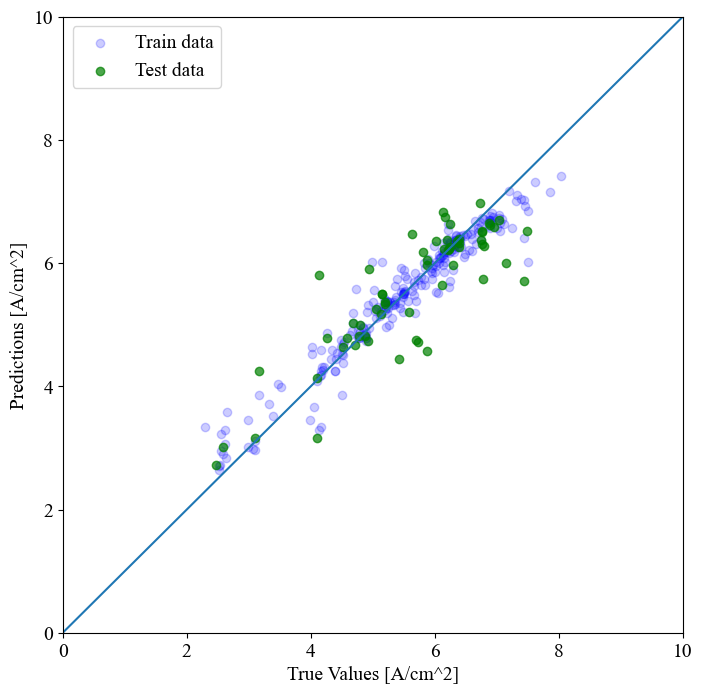

In [8]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及验证集上的表现情况图
test_predictions = rf.predict(X_test).flatten()
train_predictions = rf.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'blue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='green', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

        feature  importance
1            PH    0.379981
8            Cr    0.106554
11           Cu    0.078026
4             δ    0.073141
5            Δχ    0.068925
0   Environment    0.065706
7            Tm    0.047197
10           Ni    0.042700
3         ΔHmix    0.040162
9            Fe    0.035447
6           e/a    0.032234
2         [Cl-]    0.029928


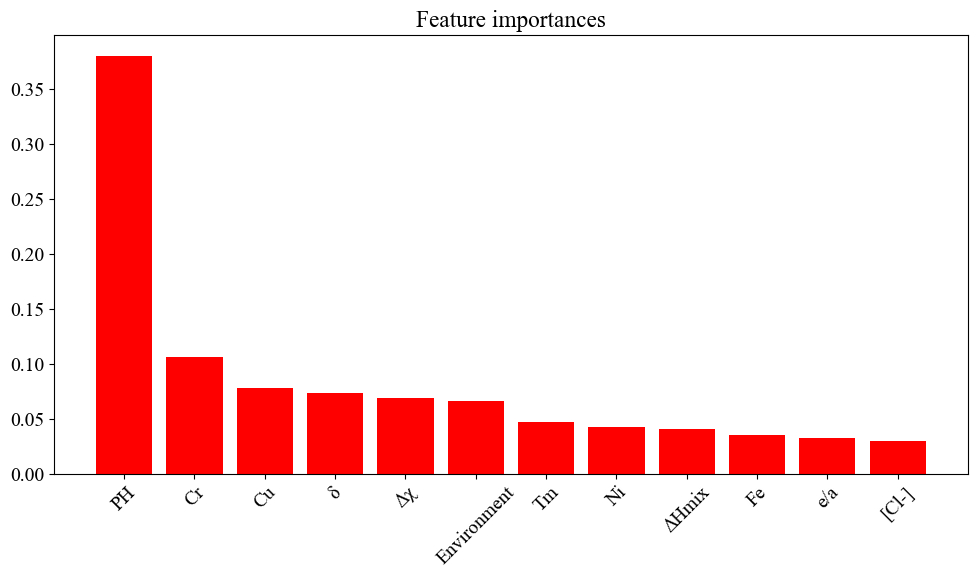

In [9]:
# 获取输入特征的名称
feature_names = dataset.columns[:-1]

# 输出各特征名称和对应的重要性值
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feature_importances.sort_values('importance', ascending=False))

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [10]:
# 保存训练好的模型
dump(rf, open('D:\IPython\Corrosion-ML\saved_model\随机森林\初训练模型\RF_6.pkl', 'wb'))

# 交叉验证

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor


# 创建随机森林回归模型
cv_rf = RandomForestRegressor()

# 预测训练集
y_pred_train_cv = cross_val_predict(cv_rf, X_train, y_train, cv=5)

# 在整个训练集上拟合模型
cv_rf.fit(X_train, y_train)

# 预测测试集
y_pred_test_cv = cv_rf.predict(X_test)

In [12]:
print('随机森林交叉验证回归模型评价指标展示：')

# 计算R^2分数
score_test = cv_rf.score(X_test, y_test)
print('测试集上的R^2分数：', score_test)

# 计算R^2分数
score_train = cv_rf.score(X_train, y_train)
print('训练集上的R^2分数：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test_cv)
mae_train = mean_absolute_error(y_train, y_pred_train_cv)

mse_test = mean_squared_error(y_test, y_pred_test_cv)
mse_train = mean_squared_error(y_train, y_pred_train_cv)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

随机森林交叉验证回归模型评价指标展示：
测试集上的R^2分数： 0.7321933980413883
训练集上的R^2分数： 0.9332899916074606
测试集上的MAE: 0.4324257062258083
训练集上的MAE: 0.5563998463156558
测试集上的MSE: 0.3497999043261522
训练集上的MSE: 0.5597902007766633
测试集上的RMSE: 0.5914388424225722
训练集上的RMSE: 0.748191286220752


<Figure size 800x600 with 0 Axes>

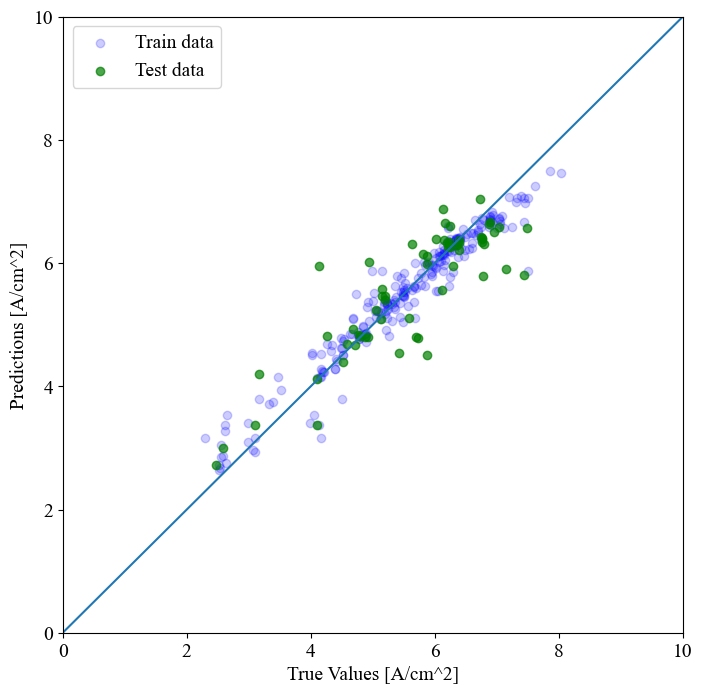

In [13]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及验证集上的表现情况图
test_predictions = cv_rf.predict(X_test).flatten()
train_predictions = cv_rf.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'blue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='green', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

        feature  importance
1            PH    0.364107
8            Cr    0.106509
0   Environment    0.079994
4             δ    0.069956
5            Δχ    0.066773
11           Cu    0.062269
10           Ni    0.054960
3         ΔHmix    0.048162
7            Tm    0.043793
9            Fe    0.040381
6           e/a    0.032889
2         [Cl-]    0.030208


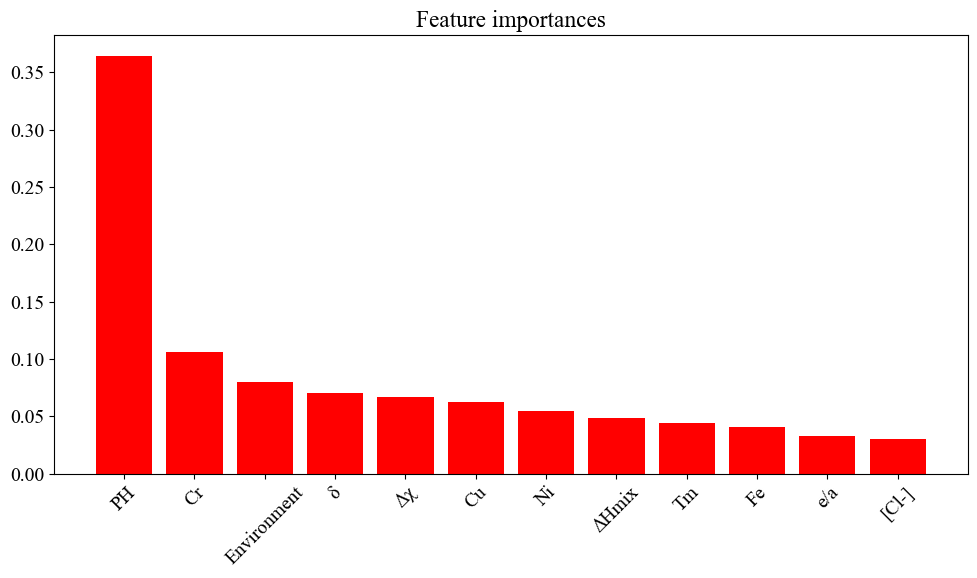

In [14]:
# 获取输入特征的名称
feature_names = dataset.columns[:-1]

# 输出各特征名称和对应的重要性值
importances = cv_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feature_importances.sort_values('importance', ascending=False))

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [15]:
# 保存训练好的模型
dump(cv_rf, open('D:\IPython\Corrosion-ML\saved_model\随机森林\交叉验证模型\CVRF_6.pkl', 'wb'))

# 贝叶斯优化

In [16]:
import optuna


def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 1000, log=True)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    BOrf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    BOrf.fit(X_train, y_train)
    y_pred = BOrf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# 运行贝叶斯优化
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

print('Best MSE:', study.best_value)

# 输出最佳超参数
best_params_rf = study.best_params
print('Best params for Random Forest:', best_params_rf)

# 训练最佳模型
BOrf = RandomForestRegressor(n_estimators=best_params_rf['n_estimators'], 
                             max_depth=best_params_rf['max_depth'], 
                             min_samples_split=best_params_rf['min_samples_split'], 
                             min_samples_leaf=best_params_rf['min_samples_leaf'], 
                             random_state=42)

BOrf.fit(X_train, y_train)

D:\Python\anaconda\envs\tf2x\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-01-03 16:30:14,046] A new study created in memory with name: no-name-04d2ae36-e3c5-43ab-8066-fc5566efa31f
[I 2024-01-03 16:30:15,502] Trial 0 finished with value: 0.36377797215409197 and parameters: {'n_estimators': 913, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.36377797215409197.
[I 2024-01-03 16:30:16,181] Trial 1 finished with value: 0.44209025835793614 and parameters: {'n_estimators': 496, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.36377797215409197.
[I 2024-01-03 16:30:16,207] Trial 2 finished with value: 0.4188627189261057 and parameters: {'n_estimators': 12, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 3}.

[I 2024-01-03 16:30:22,030] Trial 33 finished with value: 0.32755959788667177 and parameters: {'n_estimators': 66, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 24 with value: 0.3215806901567132.
[I 2024-01-03 16:30:22,138] Trial 34 finished with value: 0.351457633121714 and parameters: {'n_estimators': 46, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 24 with value: 0.3215806901567132.
[I 2024-01-03 16:30:22,231] Trial 35 finished with value: 0.34178715396506787 and parameters: {'n_estimators': 37, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 24 with value: 0.3215806901567132.
[I 2024-01-03 16:30:22,287] Trial 36 finished with value: 0.36928258880151543 and parameters: {'n_estimators': 18, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 24 with value: 0.3215806901567132.
[I 2024-01-03 16:30:23,153] Trial 37 finished with value: 0.47620276683618656 and para

[I 2024-01-03 16:30:26,690] Trial 67 finished with value: 0.3398391083171691 and parameters: {'n_estimators': 41, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 63 with value: 0.32010905854740274.
[I 2024-01-03 16:30:26,806] Trial 68 finished with value: 0.3344426199973063 and parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 63 with value: 0.32010905854740274.
[I 2024-01-03 16:30:26,902] Trial 69 finished with value: 0.3445528403538747 and parameters: {'n_estimators': 31, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 63 with value: 0.32010905854740274.
[I 2024-01-03 16:30:26,966] Trial 70 finished with value: 0.34622571880253233 and parameters: {'n_estimators': 25, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 63 with value: 0.32010905854740274.
[I 2024-01-03 16:30:27,057] Trial 71 finished with value: 0.33295415433627373 and p

[I 2024-01-03 16:30:30,447] Trial 101 finished with value: 0.32979918752700554 and parameters: {'n_estimators': 62, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:30,564] Trial 102 finished with value: 0.3241482079056003 and parameters: {'n_estimators': 49, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:30,659] Trial 103 finished with value: 0.33558860816000624 and parameters: {'n_estimators': 33, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:30,790] Trial 104 finished with value: 0.3263858155285718 and parameters: {'n_estimators': 55, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:30,882] Trial 105 finished with value: 0.32841273497436874 and

[I 2024-01-03 16:30:33,953] Trial 135 finished with value: 0.3277490629693471 and parameters: {'n_estimators': 53, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:34,054] Trial 136 finished with value: 0.3302525445523872 and parameters: {'n_estimators': 37, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:34,190] Trial 137 finished with value: 0.3252475650191846 and parameters: {'n_estimators': 58, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:34,297] Trial 138 finished with value: 0.3194618508664011 and parameters: {'n_estimators': 42, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:34,367] Trial 139 finished with value: 0.34819269768077515 and p

[I 2024-01-03 16:30:37,490] Trial 169 finished with value: 0.3427378569293329 and parameters: {'n_estimators': 32, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:37,621] Trial 170 finished with value: 0.32674907714438917 and parameters: {'n_estimators': 55, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:37,723] Trial 171 finished with value: 0.32145693471261777 and parameters: {'n_estimators': 41, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:37,831] Trial 172 finished with value: 0.3256763842550951 and parameters: {'n_estimators': 40, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:37,924] Trial 173 finished with value: 0.331024015103924 and p

[I 2024-01-03 16:30:41,125] Trial 203 finished with value: 0.32835864417837546 and parameters: {'n_estimators': 44, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:41,241] Trial 204 finished with value: 0.32286980353932027 and parameters: {'n_estimators': 48, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:41,340] Trial 205 finished with value: 0.3302893889080225 and parameters: {'n_estimators': 38, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:41,448] Trial 206 finished with value: 0.3194618508664011 and parameters: {'n_estimators': 42, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:41,498] Trial 207 finished with value: 0.3745087887266093 and 

[I 2024-01-03 16:30:45,775] Trial 237 finished with value: 0.326683713483928 and parameters: {'n_estimators': 47, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:45,877] Trial 238 finished with value: 0.32933668483697653 and parameters: {'n_estimators': 38, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:46,014] Trial 239 finished with value: 0.32674907714438917 and parameters: {'n_estimators': 55, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:46,101] Trial 240 finished with value: 0.33598636072888016 and parameters: {'n_estimators': 33, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:46,281] Trial 241 finished with value: 0.33771958089854504 and

[I 2024-01-03 16:30:51,659] Trial 271 finished with value: 0.32712478668546424 and parameters: {'n_estimators': 60, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:51,775] Trial 272 finished with value: 0.32563584938398427 and parameters: {'n_estimators': 45, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:51,865] Trial 273 finished with value: 0.3359378389976781 and parameters: {'n_estimators': 35, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:51,973] Trial 274 finished with value: 0.32926625946876426 and parameters: {'n_estimators': 41, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:52,067] Trial 275 finished with value: 0.3410038568352887 and

[I 2024-01-03 16:30:55,684] Trial 305 finished with value: 0.32244581972102776 and parameters: {'n_estimators': 50, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:55,806] Trial 306 finished with value: 0.32714782618296245 and parameters: {'n_estimators': 46, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:55,909] Trial 307 finished with value: 0.3322299833197775 and parameters: {'n_estimators': 38, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:56,020] Trial 308 finished with value: 0.3194618508664011 and parameters: {'n_estimators': 42, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:30:56,081] Trial 309 finished with value: 0.3688751325095983 and 

[I 2024-01-03 16:31:02,706] Trial 339 finished with value: 0.32563584938398427 and parameters: {'n_estimators': 45, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:02,814] Trial 340 finished with value: 0.32144824325970583 and parameters: {'n_estimators': 41, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:02,938] Trial 341 finished with value: 0.3245274666059244 and parameters: {'n_estimators': 49, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:03,015] Trial 342 finished with value: 0.3496598550563842 and parameters: {'n_estimators': 24, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:03,116] Trial 343 finished with value: 0.32933668483697653 and

[I 2024-01-03 16:31:06,994] Trial 373 finished with value: 0.32211777586579127 and parameters: {'n_estimators': 43, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:07,094] Trial 374 finished with value: 0.3313321290670538 and parameters: {'n_estimators': 37, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:07,157] Trial 375 finished with value: 0.356792080272975 and parameters: {'n_estimators': 15, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:07,255] Trial 376 finished with value: 0.337862663311778 and parameters: {'n_estimators': 33, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:07,381] Trial 377 finished with value: 0.3241482079056003 and par

[I 2024-01-03 16:31:11,599] Trial 407 finished with value: 0.32933668483697653 and parameters: {'n_estimators': 38, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:11,715] Trial 408 finished with value: 0.3194618508664011 and parameters: {'n_estimators': 42, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:12,114] Trial 409 finished with value: 0.3411561097877261 and parameters: {'n_estimators': 189, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:12,222] Trial 410 finished with value: 0.3194618508664011 and parameters: {'n_estimators': 42, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:12,884] Trial 411 finished with value: 0.33909711660369884 and

[I 2024-01-03 16:31:17,216] Trial 441 finished with value: 0.33470449600071894 and parameters: {'n_estimators': 62, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:17,320] Trial 442 finished with value: 0.32879913925047294 and parameters: {'n_estimators': 38, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:17,408] Trial 443 finished with value: 0.3355236943063808 and parameters: {'n_estimators': 26, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:17,523] Trial 444 finished with value: 0.32145693471261777 and parameters: {'n_estimators': 41, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:17,663] Trial 445 finished with value: 0.3265025545122212 and

[I 2024-01-03 16:31:23,982] Trial 475 finished with value: 0.3257110525994165 and parameters: {'n_estimators': 39, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:24,085] Trial 476 finished with value: 0.3359378389976781 and parameters: {'n_estimators': 35, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:25,609] Trial 477 finished with value: 0.3390651289290778 and parameters: {'n_estimators': 766, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:25,699] Trial 478 finished with value: 0.3407691515654768 and parameters: {'n_estimators': 30, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:25,813] Trial 479 finished with value: 0.32010905854740274 and 

[I 2024-01-03 16:31:33,192] Trial 509 finished with value: 0.32144824325970583 and parameters: {'n_estimators': 41, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:33,335] Trial 510 finished with value: 0.33886066935028264 and parameters: {'n_estimators': 46, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:33,430] Trial 511 finished with value: 0.3431236745488411 and parameters: {'n_estimators': 29, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:33,532] Trial 512 finished with value: 0.3302893889080225 and parameters: {'n_estimators': 38, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:33,656] Trial 513 finished with value: 0.32067102383596235 and

[I 2024-01-03 16:31:41,846] Trial 543 finished with value: 0.3245274666059244 and parameters: {'n_estimators': 49, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:41,957] Trial 544 finished with value: 0.3256763842550951 and parameters: {'n_estimators': 40, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:42,081] Trial 545 finished with value: 0.3329023509403539 and parameters: {'n_estimators': 45, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:42,907] Trial 546 finished with value: 0.3384019445561 and parameters: {'n_estimators': 407, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:43,007] Trial 547 finished with value: 0.3359378389976781 and para

[I 2024-01-03 16:31:50,558] Trial 577 finished with value: 0.38789315329860924 and parameters: {'n_estimators': 10, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:50,926] Trial 578 finished with value: 0.33878227165096364 and parameters: {'n_estimators': 169, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:51,499] Trial 579 finished with value: 0.3393644002774961 and parameters: {'n_estimators': 276, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:51,627] Trial 580 finished with value: 0.32738848673800863 and parameters: {'n_estimators': 46, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:31:51,763] Trial 581 finished with value: 0.3246342386401529 a

[I 2024-01-03 16:32:01,956] Trial 611 finished with value: 0.32865722293137645 and parameters: {'n_estimators': 44, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:02,013] Trial 612 finished with value: 0.3769202561727286 and parameters: {'n_estimators': 11, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:02,179] Trial 613 finished with value: 0.3270353518927502 and parameters: {'n_estimators': 60, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:02,264] Trial 614 finished with value: 0.34107209838815605 and parameters: {'n_estimators': 23, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:02,375] Trial 615 finished with value: 0.32879913925047294 and

[I 2024-01-03 16:32:07,856] Trial 645 finished with value: 0.32835864417837546 and parameters: {'n_estimators': 44, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:08,370] Trial 646 finished with value: 0.33389248107067676 and parameters: {'n_estimators': 241, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:08,489] Trial 647 finished with value: 0.32430693832692536 and parameters: {'n_estimators': 39, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:08,717] Trial 648 finished with value: 0.3338726697315487 and parameters: {'n_estimators': 89, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:08,782] Trial 649 finished with value: 0.3745087887266093 an

[I 2024-01-03 16:32:18,517] Trial 679 finished with value: 0.33523053056813606 and parameters: {'n_estimators': 35, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:18,649] Trial 680 finished with value: 0.32314062013712064 and parameters: {'n_estimators': 48, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:18,765] Trial 681 finished with value: 0.33270222004509953 and parameters: {'n_estimators': 39, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:18,889] Trial 682 finished with value: 0.32067102383596235 and parameters: {'n_estimators': 43, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:19,042] Trial 683 finished with value: 0.32482548588317395 a

[I 2024-01-03 16:32:26,789] Trial 713 finished with value: 0.33239488680242985 and parameters: {'n_estimators': 47, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:26,954] Trial 714 finished with value: 0.32862127816303727 and parameters: {'n_estimators': 64, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:27,072] Trial 715 finished with value: 0.3208093232170473 and parameters: {'n_estimators': 43, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:27,189] Trial 716 finished with value: 0.333454979793908 and parameters: {'n_estimators': 36, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:27,330] Trial 717 finished with value: 0.32488649421162 and pa

[I 2024-01-03 16:32:37,400] Trial 747 finished with value: 0.3336539665405473 and parameters: {'n_estimators': 242, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:37,519] Trial 748 finished with value: 0.3247288989698002 and parameters: {'n_estimators': 39, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:37,625] Trial 749 finished with value: 0.44118090651270875 and parameters: {'n_estimators': 43, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:37,752] Trial 750 finished with value: 0.3659414231506133 and parameters: {'n_estimators': 49, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:37,873] Trial 751 finished with value: 0.32841273497436874 and p

[I 2024-01-03 16:32:46,814] Trial 781 finished with value: 0.3329023509403539 and parameters: {'n_estimators': 45, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:47,512] Trial 782 finished with value: 0.3387367892573509 and parameters: {'n_estimators': 327, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:47,678] Trial 783 finished with value: 0.3270353518927502 and parameters: {'n_estimators': 60, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:47,809] Trial 784 finished with value: 0.3256763842550951 and parameters: {'n_estimators': 40, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:47,958] Trial 785 finished with value: 0.3237749333188542 and p

[I 2024-01-03 16:32:57,931] Trial 815 finished with value: 0.34150774029424863 and parameters: {'n_estimators': 547, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:58,086] Trial 816 finished with value: 0.32600714575641415 and parameters: {'n_estimators': 58, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:58,475] Trial 817 finished with value: 0.33925024830237044 and parameters: {'n_estimators': 174, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:58,593] Trial 818 finished with value: 0.3302525445523872 and parameters: {'n_estimators': 37, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:32:58,734] Trial 819 finished with value: 0.32738848673800863 

[I 2024-01-03 16:33:06,257] Trial 849 finished with value: 0.33523053056813606 and parameters: {'n_estimators': 35, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:33:06,395] Trial 850 finished with value: 0.32714782618296245 and parameters: {'n_estimators': 46, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:33:06,521] Trial 851 finished with value: 0.326477258599235 and parameters: {'n_estimators': 40, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:33:07,535] Trial 852 finished with value: 0.34691132956258164 and parameters: {'n_estimators': 444, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 97 with value: 0.3192402525235776.
[I 2024-01-03 16:33:07,685] Trial 853 finished with value: 0.32745368674525 and p

[I 2024-01-03 16:33:14,347] Trial 883 finished with value: 0.32144824325970583 and parameters: {'n_estimators': 41, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 882 with value: 0.3172567984745198.
[I 2024-01-03 16:33:15,097] Trial 884 finished with value: 0.3393400470681625 and parameters: {'n_estimators': 380, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 882 with value: 0.3172567984745198.
[I 2024-01-03 16:33:15,590] Trial 885 finished with value: 0.3338976112053145 and parameters: {'n_estimators': 227, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 882 with value: 0.3172567984745198.
[I 2024-01-03 16:33:15,660] Trial 886 finished with value: 0.37770490575346194 and parameters: {'n_estimators': 11, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 882 with value: 0.3172567984745198.
[I 2024-01-03 16:33:15,742] Trial 887 finished with value: 0.369788617197991

[I 2024-01-03 16:33:23,106] Trial 917 finished with value: 0.32286980353932027 and parameters: {'n_estimators': 48, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 882 with value: 0.3172567984745198.
[I 2024-01-03 16:33:23,215] Trial 918 finished with value: 0.342127785313626 and parameters: {'n_estimators': 31, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 882 with value: 0.3172567984745198.
[I 2024-01-03 16:33:25,196] Trial 919 finished with value: 0.3414264460982374 and parameters: {'n_estimators': 976, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 882 with value: 0.3172567984745198.
[I 2024-01-03 16:33:25,315] Trial 920 finished with value: 0.3313321290670538 and parameters: {'n_estimators': 37, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 882 with value: 0.3172567984745198.
[I 2024-01-03 16:33:25,591] Trial 921 finished with value: 0.33263997009230184 

[I 2024-01-03 16:33:33,048] Trial 951 finished with value: 0.324756897794626 and parameters: {'n_estimators': 39, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 882 with value: 0.3172567984745198.
[I 2024-01-03 16:33:33,157] Trial 952 finished with value: 0.36299120518997957 and parameters: {'n_estimators': 35, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 882 with value: 0.3172567984745198.
[I 2024-01-03 16:33:33,316] Trial 953 finished with value: 0.3300078498482732 and parameters: {'n_estimators': 47, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 882 with value: 0.3172567984745198.
[I 2024-01-03 16:33:33,400] Trial 954 finished with value: 0.36780317729301054 and parameters: {'n_estimators': 18, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 882 with value: 0.3172567984745198.
[I 2024-01-03 16:33:33,537] Trial 955 finished with value: 0.3208093232170473 an

[I 2024-01-03 16:33:41,550] Trial 985 finished with value: 0.358093305576028 and parameters: {'n_estimators': 14, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 882 with value: 0.3172567984745198.
[I 2024-01-03 16:33:41,686] Trial 986 finished with value: 0.37280768973844497 and parameters: {'n_estimators': 49, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 882 with value: 0.3172567984745198.
[I 2024-01-03 16:33:41,850] Trial 987 finished with value: 0.3279545127681831 and parameters: {'n_estimators': 56, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 882 with value: 0.3172567984745198.
[I 2024-01-03 16:33:41,969] Trial 988 finished with value: 0.3347392740130418 and parameters: {'n_estimators': 34, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 882 with value: 0.3172567984745198.
[I 2024-01-03 16:33:43,319] Trial 989 finished with value: 0.338926508391842 and

Best MSE: 0.3172567984745198
Best params for Random Forest: {'n_estimators': 42, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 2}


RandomForestRegressor(max_depth=13, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=42, random_state=42)

In [17]:
print('随机森林贝叶斯优化回归模型评价指标展示：')

# 预测测试集
y_pred_test = BOrf.predict(X_test)

# 预测训练集
y_pred_train = BOrf.predict(X_train)

# 计算R^2分数
score_test = BOrf.score(X_test, y_test)
print('测试集上的R^2分数：', score_test)

# 计算R^2分数
score_train = BOrf.score(X_train, y_train)
print('训练集上的R^2分数：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

随机森林贝叶斯优化回归模型评价指标展示：
测试集上的R^2分数： 0.7571083808287449
训练集上的R^2分数： 0.8921403900630624
测试集上的MAE: 0.41681470997067654
训练集上的MAE: 0.28047425273309606
测试集上的MSE: 0.3172567984745198
训练集上的MSE: 0.15468877628175598
测试集上的RMSE: 0.563255535680316
训练集上的RMSE: 0.393304940576337


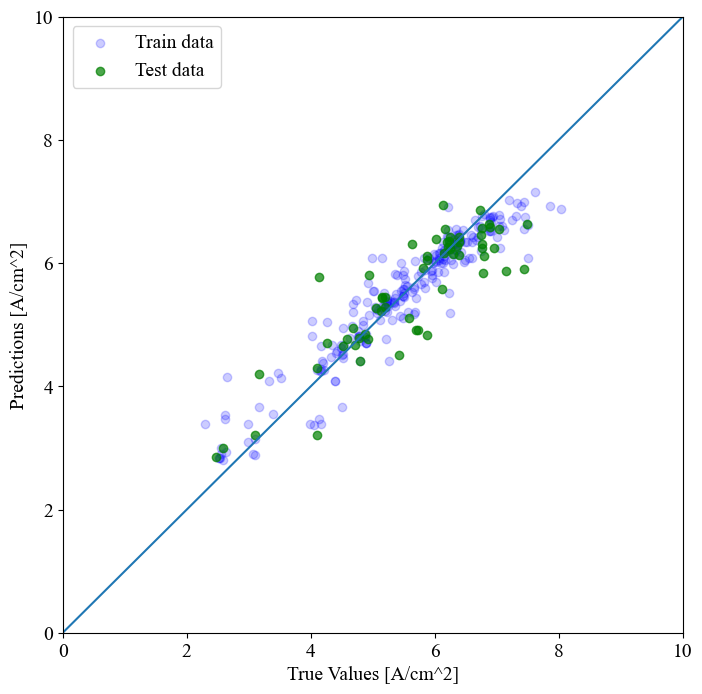

In [18]:
# 模型在训练集以及验证集上的表现情况图
test_predictions = BOrf.predict(X_test).flatten()
train_predictions = BOrf.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'blue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='green', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

        feature  importance
1            PH    0.375369
11           Cu    0.099541
8            Cr    0.093334
0   Environment    0.089750
4             δ    0.071706
5            Δχ    0.062348
10           Ni    0.046349
7            Tm    0.040749
9            Fe    0.037138
3         ΔHmix    0.035827
6           e/a    0.026560
2         [Cl-]    0.021329


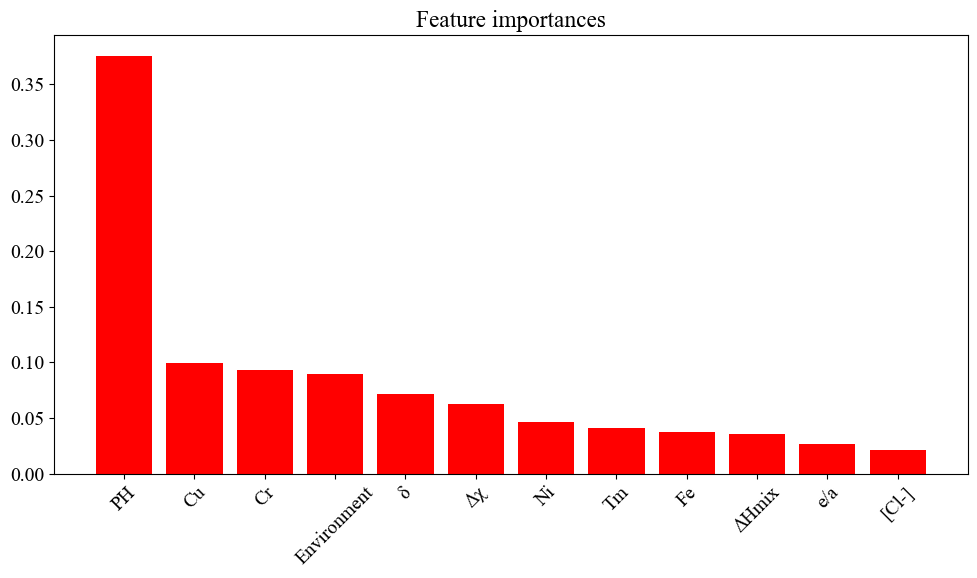

In [19]:
# 获取输入特征的名称
feature_names = dataset.columns[:-1]

# 输出各特征名称和对应的重要性值
importances = BOrf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feature_importances.sort_values('importance', ascending=False))

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [20]:
# 保存训练好的模型
dump(BOrf, open('D:\IPython\Corrosion-ML\saved_model\随机森林\贝叶斯优化模型\BORF_6.pkl', 'wb'))

# 支持向量机

In [21]:
from sklearn.svm import SVR

# 构建支持向量机回归器
svm = SVR()

# 训练支持向量机回归器
svm.fit(X_train, y_train)

SVR()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('支持向量机初训练回归模型评价指标展示：')

# 预测测试集
y_pred_test = svm.predict(X_test)

# 预测训练集
y_pred_train = svm.predict(X_train)

# 计算R^2分数
score_test = svm.score(X_test, y_test)
print('测试集上的R^2分数：', score_test)

# 计算R^2分数
score_train = svm.score(X_train, y_train)
print('训练集上的R^2分数：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

支持向量机初训练回归模型评价指标展示：
测试集上的R^2分数： 0.6940406592430475
训练集上的R^2分数： 0.732047174412036
测试集上的MAE: 0.42279026322862234
训练集上的MAE: 0.4228864748590117
测试集上的MSE: 0.399633718294274
训练集上的MSE: 0.38428930640186043
测试集上的RMSE: 0.6321658945990949
训练集上的RMSE: 0.6199107245417362


<Figure size 800x600 with 0 Axes>

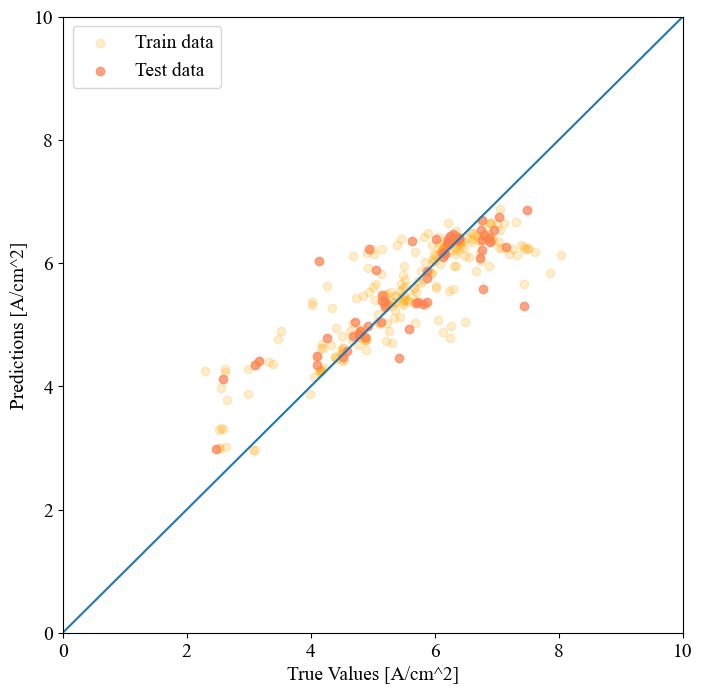

In [23]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及验证集上的表现情况图
test_predictions = svm.predict(X_test).flatten()
train_predictions = svm.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'orange', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='coral', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [24]:
# 保存训练好的模型
dump(svm, open('D:\IPython\Corrosion-ML\saved_model\支持向量机\初训练模型\SVM_7.pkl', 'wb'))

# 交叉验证

In [25]:
from sklearn.svm import SVR

# 构建支持向量机回归器
cv_svm = SVR()

# 预测训练集
y_pred_train_cv = cross_val_predict(cv_svm, X_train, y_train, cv=5)

# 在整个训练集上拟合模型
cv_svm.fit(X_train, y_train)

# 预测测试集
y_pred_test_cv = cv_svm.predict(X_test)

In [26]:
print('支持向量机交叉验证回归模型评价指标展示：')

# 计算R^2分数
score_test = cv_svm.score(X_test, y_test)
print('测试集上的R^2分数：', score_test)

# 计算R^2分数
score_train = cv_svm.score(X_train, y_train)
print('训练集上的R^2分数：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test_cv)
mae_train = mean_absolute_error(y_train, y_pred_train_cv)

mse_test = mean_squared_error(y_test, y_pred_test_cv)
mse_train = mean_squared_error(y_train, y_pred_train_cv)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

支持向量机交叉验证回归模型评价指标展示：
测试集上的R^2分数： 0.6940406592430475
训练集上的R^2分数： 0.732047174412036
测试集上的MAE: 0.42279026322862234
训练集上的MAE: 0.5710874430950432
测试集上的MSE: 0.399633718294274
训练集上的MSE: 0.6035787431908122
测试集上的RMSE: 0.6321658945990949
训练集上的RMSE: 0.7769033036297452


<Figure size 800x600 with 0 Axes>

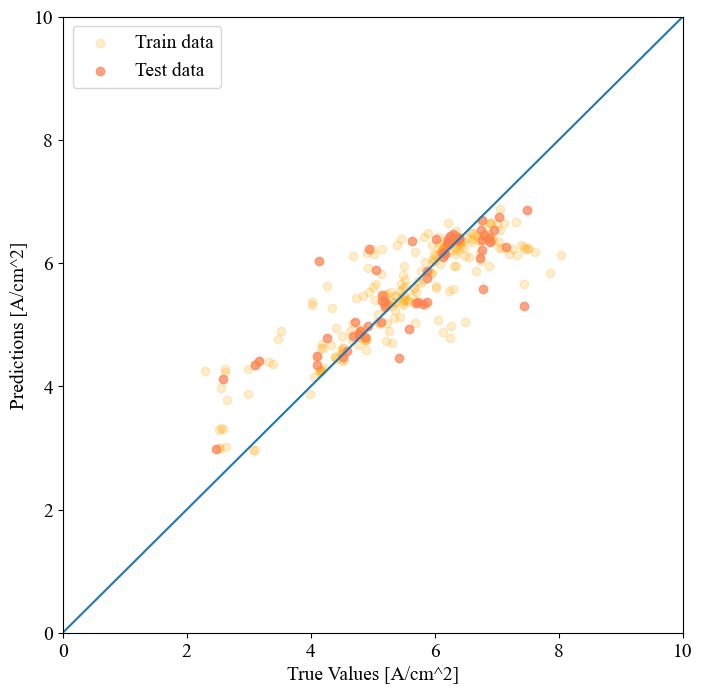

In [27]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及验证集上的表现情况图
test_predictions = cv_svm.predict(X_test).flatten()
train_predictions = cv_svm.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'orange', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='coral', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [28]:
# 保存训练好的模型
dump(cv_svm, open('D:\IPython\Corrosion-ML\saved_model\支持向量机\交叉验证模型\CVSVM_7.pkl', 'wb'))

# 贝叶斯优化

In [29]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import optuna


# 定义目标函数
def objective(trial):
    # 定义超参数搜索空间
    C = trial.suggest_loguniform('C', 100, 1000)
    gamma = trial.suggest_loguniform('gamma', 0.1, 10)
    epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
    degree = 0
    

    # 定义模型
    BO_svm = SVR(C=C, gamma=gamma, epsilon=epsilon, kernel=kernel, degree=degree)
    BO_svm.fit(X_train, y_train)

    # 计算指标
    y_pred = BO_svm.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # 返回目标值（最小化均方误差）
    return mse

# 调用Optuna库进行超参数搜索
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# 输出最优超参数和最小化均方误差
print('Best parameters for SVM: ', study.best_params)
print('Best MSE: ', study.best_value)

# 使用最优超参数训练模型并评估性能
BO_svm = SVR(**study.best_params)
BO_svm.fit(X_train, y_train)

# 预测测试集
y_pred_test = BO_svm.predict(X_test)

# 预测训练集
y_pred_train = BO_svm.predict(X_train)

[I 2024-01-03 16:33:46,302] A new study created in memory with name: no-name-e33df3fc-2514-4b2c-8802-bc03067e3623
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` 

[I 2024-01-03 16:33:51,823] Trial 6 finished with value: 0.6393612407561546 and parameters: {'C': 343.500807773, 'gamma': 5.0653701499380706, 'epsilon': 0.01072712369433119, 'kernel': 'linear'}. Best is trial 5 with value: 0.6391208706794157.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature wi

[I 2024-01-03 16:33:56,772] Trial 13 finished with value: 0.6409157372178405 and parameters: {'C': 152.2864562809745, 'gamma': 2.1680523989430727, 'epsilon': 0.021209478249009775, 'kernel': 'linear'}. Best is trial 5 with value: 0.6391208706794157.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

[I 2024-01-03 16:34:02,232] Trial 20 finished with value: 0.6420626819530318 and parameters: {'C': 183.27204908435755, 'gamma': 1.1942349773147032, 'epsilon': 0.026231473730828854, 'kernel': 'linear'}. Best is trial 5 with value: 0.6391208706794157.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:34:07,079] Trial 28 finished 

[I 2024-01-03 16:34:10,479] Trial 34 finished with value: 0.6390167444958863 and parameters: {'C': 101.72621783037646, 'gamma': 2.8986916218842262, 'epsilon': 0.010143228869524224, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:34:16,499] Trial 41 finished with value: 0.6391120814497137 and parameters: {'C': 133.11312490766113, 'gamma': 2.45276635269222, 'epsilon': 0.010292658635530564, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

[I 2024-01-03 16:34:19,710] Trial 48 finished with value: 0.6395088163045913 and parameters: {'C': 108.0286888488988, 'gamma': 1.5249237030446476, 'epsilon': 0.012137390331089659, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2024-01-03 16:34:24,020] Trial 55 finished with value: 0.6410134505679754 and parameters: {'C': 112.89604918315429, 'gamma': 2.330549647204269, 'epsilon': 0.020216644563294618, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2024-01-03 16:34:28,028] Trial 62 finished with value: 0.6393204403015782 and parameters: {'C': 110.25482884303179, 'gamma': 3.0779171112979142, 'epsilon': 0.011430940684067307, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:34:32,048] Trial 70 finished 

[I 2024-01-03 16:34:34,935] Trial 76 finished with value: 0.6395993472026541 and parameters: {'C': 117.02513866434681, 'gamma': 1.7267893178074756, 'epsilon': 0.012496367071735844, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:34:37,975] Trial 83 finished with value: 0.6395939697203743 and parameters: {'C': 100.009167279398, 'gamma': 3.0815765343224917, 'epsilon': 0.012184955286589257, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

[I 2024-01-03 16:34:41,532] Trial 90 finished with value: 0.6392842856995326 and parameters: {'C': 111.77381060652642, 'gamma': 3.773550291024104, 'epsilon': 0.01108663035140791, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

[I 2024-01-03 16:34:45,538] Trial 97 finished with value: 0.6401696301341459 and parameters: {'C': 144.06845886281516, 'gamma': 2.239845656258815, 'epsilon': 0.014038377859118977, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2024-01-03 16:34:48,102] Trial 104 finished with value: 0.6393475811281155 and parameters: {'C': 127.37166306034686, 'gamma': 3.5055357245325793, 'epsilon': 0.011860699398048116, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:34:51,798] Trial 111 finished with value: 0.6390196383718413 and parameters: {'C': 120.22017613085532, 'gamma': 2.130281553841409, 'epsilon': 0.010017857093669027, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:34:55,894] Trial 119 finished

[I 2024-01-03 16:34:59,121] Trial 125 finished with value: 0.6389391546977079 and parameters: {'C': 132.61587996436919, 'gamma': 2.338523283794007, 'epsilon': 0.010026211157331603, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:35:03,020] Trial 132 finished with value: 0.6393957047270221 and parameters: {'C': 111.38920866839676, 'gamma': 2.394017641793959, 'epsilon': 0.01164621835299185, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:35:07,708] Trial 140 finished

[I 2024-01-03 16:35:10,751] Trial 146 finished with value: 0.6389651657593892 and parameters: {'C': 108.0680390763517, 'gamma': 3.3481658680378197, 'epsilon': 0.010069589147311238, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:35:14,200] Trial 153 finished with value: 0.6390237623962564 and parameters: {'C': 109.68477854910817, 'gamma': 2.8316727127689223, 'epsilon': 0.010047854915462947, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:35:17,869] Trial 160 finished with value: 0.6396502158737034 and parameters: {'C': 107.85358711729415, 'gamma': 3.9565889374764773, 'epsilon': 0.012273740282534307, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:35:22,323] Trial 167 finished with value: 0.6395321705044897 and parameters: {'C': 131.07195673142692, 'gamma': 3.232795705173883, 'epsilon': 0.012133451967401331, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:35:26,790] Trial 174 finished with value: 0.6434722823203803 and parameters: {'C': 308.6043328904543, 'gamma': 2.2077507979143927, 'epsilon': 0.032900712137136, 'kernel': 'linear'}. Best is trial 32 with value: 0.6388817312503384.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featu

[I 2024-01-03 16:35:31,030] Trial 181 finished with value: 0.6388760718051827 and parameters: {'C': 111.75219702720143, 'gamma': 2.1105224748755944, 'epsilon': 0.010059549549375948, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This 

[I 2024-01-03 16:35:35,077] Trial 188 finished with value: 0.6396104929946528 and parameters: {'C': 110.01779983637806, 'gamma': 2.4779273452841224, 'epsilon': 0.01266573868648577, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:35:38,730] Trial 195 finished with value: 0.6393051781266473 and parameters: {'C': 104.63422601387084, 'gamma': 2.6831642420479596, 'epsilon': 0.011481035958100336, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This 

[I 2024-01-03 16:35:42,037] Trial 202 finished with value: 0.6391525009900972 and parameters: {'C': 100.03585499220968, 'gamma': 2.68182684618433, 'epsilon': 0.010822780489718712, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:35:45,148] Trial 209 finished with value: 0.6391214270136995 and parameters: {'C': 116.0840624898554, 'gamma': 2.6001647925792795, 'epsilon': 0.010864858019363093, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:35:51,138] Trial 216 finished with value: 0.641727509212696 and parameters: {'C': 183.48508993641715, 'gamma': 3.115606793091339, 'epsilon': 0.027265004569361224, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:35:55,210] Trial 223 finished with value: 0.6388765392611955 and parameters: {'C': 104.39862193180782, 'gamma': 2.3553162235933907, 'epsilon': 0.0100063850834929, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:35:59,943] Trial 230 finished with value: 0.6389247499895503 and parameters: {'C': 122.35836786014853, 'gamma': 2.282877756012507, 'epsilon': 0.010018997149728315, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:36:06,035] Trial 238 finished

[I 2024-01-03 16:36:08,854] Trial 244 finished with value: 0.6389615563562283 and parameters: {'C': 108.75357597739048, 'gamma': 3.2347636567678597, 'epsilon': 0.01003754554374017, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:36:16,221] Trial 251 finished with value: 0.6390734237400001 and parameters: {'C': 104.70785231133324, 'gamma': 2.726531313263499, 'epsilon': 0.01076329810290203, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:36:20,077] Trial 258 finished with value: 0.7055199785245642 and parameters: {'C': 117.21896567269938, 'gamma': 1.2958442201499212, 'epsilon': 0.44056941384994713, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:36:27,988] Trial 265 finished with value: 0.6439340300004074 and parameters: {'C': 111.86273407099223, 'gamma': 2.046842226089426, 'epsilon': 0.03875600510686518, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:36:32,719] Trial 272 finished with value: 0.639143069112494 and parameters: {'C': 116.04582444228748, 'gamma': 1.8169308847470378, 'epsilon': 0.010794193710901205, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:36:37,112] Trial 279 finished with value: 0.6390810481118677 and parameters: {'C': 100.03104973372534, 'gamma': 3.148545981172968, 'epsilon': 0.010740702545991063, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:36:41,500] Trial 286 finished with value: 0.6501922449521467 and parameters: {'C': 223.40310922482402, 'gamma': 2.8855655263188336, 'epsilon': 0.07205131824472652, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:36:47,197] Trial 293 finished with value: 0.6421281971214889 and parameters: {'C': 137.5939740075842, 'gamma': 1.8986440499262927, 'epsilon': 0.024421898404887527, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:36:52,510] Trial 300 finished with value: 0.6397619901685693 and parameters: {'C': 124.16622605344556, 'gamma': 2.8067011259793953, 'epsilon': 0.012845814067256406, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This 

[I 2024-01-03 16:36:56,783] Trial 307 finished with value: 0.6389432989926237 and parameters: {'C': 146.1353773797609, 'gamma': 2.8360717504011674, 'epsilon': 0.010017423180913336, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:37:03,522] Trial 314 finished with value: 0.6391182152478398 and parameters: {'C': 152.59059156221704, 'gamma': 2.6564216485724423, 'epsilon': 0.010761931773913961, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This 

[I 2024-01-03 16:37:07,846] Trial 321 finished with value: 0.6396462895781961 and parameters: {'C': 133.68446066271989, 'gamma': 1.3459929440878864, 'epsilon': 0.012182871084221045, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This 

[I 2024-01-03 16:37:14,763] Trial 328 finished with value: 0.6389320938393726 and parameters: {'C': 134.18827273681214, 'gamma': 0.8070275957846538, 'epsilon': 0.010010661925437885, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This 

[I 2024-01-03 16:37:20,590] Trial 335 finished with value: 0.6391641554955183 and parameters: {'C': 131.57184440784044, 'gamma': 1.2379383162859543, 'epsilon': 0.010722136010741248, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This 

[I 2024-01-03 16:37:27,340] Trial 342 finished with value: 0.6427006680175495 and parameters: {'C': 350.99317375277786, 'gamma': 0.43856964385153785, 'epsilon': 0.03489436718286197, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This 

[I 2024-01-03 16:37:32,776] Trial 349 finished with value: 0.6389294878268738 and parameters: {'C': 134.40340876904904, 'gamma': 1.1861466638430238, 'epsilon': 0.010009056324940185, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This 

[I 2024-01-03 16:37:37,204] Trial 356 finished with value: 0.6392382065382302 and parameters: {'C': 121.1359152606381, 'gamma': 0.4391061588508913, 'epsilon': 0.01080782969118681, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:37:41,866] Trial 363 finished with value: 0.6393120691900812 and parameters: {'C': 105.27800724903656, 'gamma': 1.0695280076086575, 'epsilon': 0.011386673609258406, 'kernel': 'linear'}. Best is trial 181 with value: 0.6388760718051827.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This 

[I 2024-01-03 16:37:46,525] Trial 370 finished with value: 0.6394341323753718 and parameters: {'C': 112.91942502535309, 'gamma': 1.0407755738341382, 'epsilon': 0.011802406919637765, 'kernel': 'linear'}. Best is trial 368 with value: 0.638793307795057.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:37:50,827] Trial 377 finished with value: 0.6428876150054347 and parameters: {'C': 108.24751312787076, 'gamma': 1.0228740979407918, 'epsilon': 0.036294603257253186, 'kernel': 'linear'}. Best is trial 368 with value: 0.638793307795057.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:37:56,147] Trial 384 finished with value: 0.6472017635137628 and parameters: {'C': 119.31227291509924, 'gamma': 0.66146133451902, 'epsilon': 0.04326103867288039, 'kernel': 'linear'}. Best is trial 368 with value: 0.638793307795057.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

[I 2024-01-03 16:38:00,115] Trial 391 finished with value: 0.6466569487552212 and parameters: {'C': 100.1799945711107, 'gamma': 0.40048728907837894, 'epsilon': 0.046893922664577425, 'kernel': 'linear'}. Best is trial 368 with value: 0.638793307795057.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:38:04,760] Trial 398 finished with value: 0.6397506362457805 and parameters: {'C': 234.67081668293235, 'gamma': 0.2743936711523916, 'epsilon': 0.012422938874017783, 'kernel': 'linear'}. Best is trial 368 with value: 0.638793307795057.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:38:11,960] Trial 405 finished with value: 0.7221286985142923 and parameters: {'C': 100.09708935881272, 'gamma': 0.7642779862393981, 'epsilon': 0.40422006753737283, 'kernel': 'linear'}. Best is trial 368 with value: 0.638793307795057.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:38:16,625] Trial 412 finished with value: 0.6391652882320156 and parameters: {'C': 124.97900964661825, 'gamma': 0.1520535885836257, 'epsilon': 0.010764546498345805, 'kernel': 'linear'}. Best is trial 368 with value: 0.638793307795057.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:38:20,664] Trial 419 finished with value: 0.6421262941800241 and parameters: {'C': 112.31055586849823, 'gamma': 0.5926279226519952, 'epsilon': 0.02481903989792248, 'kernel': 'linear'}. Best is trial 368 with value: 0.638793307795057.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:38:26,317] Trial 426 finished with value: 0.6403939032018957 and parameters: {'C': 184.8155311552514, 'gamma': 0.2608637305983158, 'epsilon': 0.015320799678113202, 'kernel': 'linear'}. Best is trial 368 with value: 0.638793307795057.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:38:32,087] Trial 433 finished with value: 0.6394760314906348 and parameters: {'C': 175.14420309084863, 'gamma': 0.15554231999206408, 'epsilon': 0.01160993106268211, 'kernel': 'linear'}. Best is trial 368 with value: 0.638793307795057.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:36,854] Trial 441 finished

[I 2024-01-03 16:38:37,164] Trial 447 finished with value: 0.5347440831152331 and parameters: {'C': 156.65139657047203, 'gamma': 0.16698331701388558, 'epsilon': 0.020345661910752103, 'kernel': 'rbf'}. Best is trial 446 with value: 0.49036903303902724.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:37,596] Trial 455 finished

[I 2024-01-03 16:38:37,918] Trial 461 finished with value: 0.5284800962870557 and parameters: {'C': 158.89359493184136, 'gamma': 0.1645078217989338, 'epsilon': 0.020616244641068628, 'kernel': 'rbf'}. Best is trial 446 with value: 0.49036903303902724.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:38:38,294] Trial 468 finished with value: 0.5075747452439373 and parameters: {'C': 162.37224801331428, 'gamma': 0.15823741063395963, 'epsilon': 0.02053054428790088, 'kernel': 'rbf'}. Best is trial 446 with value: 0.49036903303902724.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:38:38,688] Trial 475 finished with value: 0.42789380106813857 and parameters: {'C': 166.89538739060262, 'gamma': 0.14129364193619307, 'epsilon': 0.017885208377251313, 'kernel': 'rbf'}. Best is trial 475 with value: 0.42789380106813857.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This 

[I 2024-01-03 16:38:39,083] Trial 482 finished with value: 0.4281428216382255 and parameters: {'C': 169.86088579863784, 'gamma': 0.14020032066296834, 'epsilon': 0.01677058065723219, 'kernel': 'rbf'}. Best is trial 475 with value: 0.42789380106813857.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:38:39,477] Trial 489 finished with value: 0.4259377910305981 and parameters: {'C': 174.6079846890125, 'gamma': 0.13823959181529144, 'epsilon': 0.016355132716997605, 'kernel': 'rbf'}. Best is trial 487 with value: 0.4154166275566114.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2024-01-03 16:38:39,867] Trial 496 finished with value: 0.42785288472558203 and parameters: {'C': 176.9334655378067, 'gamma': 0.13788332563543831, 'epsilon': 0.01580063986484401, 'kernel': 'rbf'}. Best is trial 487 with value: 0.4154166275566114.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2024-01-03 16:38:40,274] Trial 503 finished with value: 0.3995934642174605 and parameters: {'C': 181.38071459214797, 'gamma': 0.12908754527097907, 'epsilon': 0.015495437385302922, 'kernel': 'rbf'}. Best is trial 502 with value: 0.3920026269106334.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:40,763] Trial 511 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:41,201] Trial 518 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:41,656] Trial 525 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:42,130] Trial 532 finished

[I 2024-01-03 16:38:42,568] Trial 538 finished with value: 0.2993717530021145 and parameters: {'C': 200.59925274561346, 'gamma': 0.10170713230250958, 'epsilon': 0.014341438137687634, 'kernel': 'rbf'}. Best is trial 532 with value: 0.292204786209999.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:43,120] Trial 546 finished

[I 2024-01-03 16:38:43,543] Trial 552 finished with value: 0.30583079492256915 and parameters: {'C': 211.58960765365717, 'gamma': 0.10177766418487305, 'epsilon': 0.013237561799877192, 'kernel': 'rbf'}. Best is trial 532 with value: 0.292204786209999.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:44,090] Trial 560 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:44,557] Trial 567 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:45,037] Trial 574 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:45,491] Trial 581 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:45,977] Trial 588 finished

[I 2024-01-03 16:38:46,319] Trial 594 finished with value: 0.3326586632654588 and parameters: {'C': 242.01149473941427, 'gamma': 0.11344852073101827, 'epsilon': 0.057958701468072464, 'kernel': 'rbf'}. Best is trial 592 with value: 0.26787714867795775.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:38:46,720] Trial 601 finished with value: 0.2999802943563159 and parameters: {'C': 214.1352148913435, 'gamma': 0.11041479502717123, 'epsilon': 0.06488010039805697, 'kernel': 'rbf'}. Best is trial 592 with value: 0.26787714867795775.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2024-01-03 16:38:47,117] Trial 608 finished with value: 0.27794628439176844 and parameters: {'C': 225.68730257508074, 'gamma': 0.10057371002466077, 'epsilon': 0.05661554332522525, 'kernel': 'rbf'}. Best is trial 592 with value: 0.26787714867795775.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:38:47,519] Trial 615 finished with value: 0.30447699929446387 and parameters: {'C': 227.1023469631151, 'gamma': 0.10955103846655971, 'epsilon': 0.059830941585648084, 'kernel': 'rbf'}. Best is trial 592 with value: 0.26787714867795775.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:38:47,977] Trial 622 finished with value: 0.28943883571276713 and parameters: {'C': 241.63352166326095, 'gamma': 0.10059621017891537, 'epsilon': 0.04816359400489344, 'kernel': 'rbf'}. Best is trial 592 with value: 0.26787714867795775.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:48,441] Trial 630 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:48,867] Trial 637 finished

[I 2024-01-03 16:38:49,212] Trial 643 finished with value: 0.33133050054803176 and parameters: {'C': 271.77331683082366, 'gamma': 0.10961705409270833, 'epsilon': 0.07210507981134114, 'kernel': 'rbf'}. Best is trial 592 with value: 0.26787714867795775.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:38:49,610] Trial 650 finished with value: 0.28537892315287383 and parameters: {'C': 236.54373817824353, 'gamma': 0.10064062548577962, 'epsilon': 0.051529377601752954, 'kernel': 'rbf'}. Best is trial 592 with value: 0.26787714867795775.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This 

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:50,122] Trial 658 finished

[I 2024-01-03 16:38:50,495] Trial 664 finished with value: 1.8581956039099081 and parameters: {'C': 256.802533726481, 'gamma': 0.4358001863535383, 'epsilon': 0.046392303489096696, 'kernel': 'rbf'}. Best is trial 592 with value: 0.26787714867795775.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:51,010] Trial 672 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:51,409] Trial 679 finished

[I 2024-01-03 16:38:51,743] Trial 685 finished with value: 0.3413702929762778 and parameters: {'C': 226.11554147155962, 'gamma': 0.1169770568690768, 'epsilon': 0.08091149259800148, 'kernel': 'rbf'}. Best is trial 592 with value: 0.26787714867795775.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:52,178] Trial 693 finished

[I 2024-01-03 16:38:52,517] Trial 699 finished with value: 0.27030886463199605 and parameters: {'C': 212.59876633612774, 'gamma': 0.10025366367689578, 'epsilon': 0.05861056129365035, 'kernel': 'rbf'}. Best is trial 686 with value: 0.2667252295836735.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:52,998] Trial 707 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:53,372] Trial 714 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:53,852] Trial 721 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:54,296] Trial 728 finished

[I 2024-01-03 16:38:54,659] Trial 734 finished with value: 0.9247284727632807 and parameters: {'C': 234.59650194199898, 'gamma': 0.2014888053224462, 'epsilon': 0.07473666536696578, 'kernel': 'rbf'}. Best is trial 686 with value: 0.2667252295836735.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

[I 2024-01-03 16:38:55,063] Trial 741 finished with value: 0.29959424977546695 and parameters: {'C': 217.29123574921223, 'gamma': 0.10982194315234613, 'epsilon': 0.0636488017960207, 'kernel': 'rbf'}. Best is trial 686 with value: 0.2667252295836735.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

[I 2024-01-03 16:38:55,476] Trial 748 finished with value: 0.2697139012478163 and parameters: {'C': 210.2653199457653, 'gamma': 0.1000308077057192, 'epsilon': 0.05548650851605978, 'kernel': 'rbf'}. Best is trial 686 with value: 0.2667252295836735.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featu

[I 2024-01-03 16:38:55,873] Trial 755 finished with value: 2.1201680400533904 and parameters: {'C': 220.17170935033647, 'gamma': 1.270634975607833, 'epsilon': 0.10224389562127284, 'kernel': 'rbf'}. Best is trial 686 with value: 0.2667252295836735.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featu

[I 2024-01-03 16:38:56,269] Trial 762 finished with value: 1.995459694955564 and parameters: {'C': 402.41597083416514, 'gamma': 1.5696002970561482, 'epsilon': 0.07336991721709879, 'kernel': 'rbf'}. Best is trial 686 with value: 0.2667252295836735.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featu

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:56,705] Trial 770 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:57,083] Trial 777 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:57,504] Trial 784 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:58,018] Trial 791 finished

[I 2024-01-03 16:38:58,446] Trial 797 finished with value: 0.30135577471414016 and parameters: {'C': 224.18480017569348, 'gamma': 0.10937768077998782, 'epsilon': 0.06288616914872537, 'kernel': 'rbf'}. Best is trial 794 with value: 0.25987590421839973.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:58,960] Trial 805 finished

[I 2024-01-03 16:38:59,350] Trial 811 finished with value: 0.4716305299671005 and parameters: {'C': 241.3309798725904, 'gamma': 0.13068419458240904, 'epsilon': 0.09338121726907507, 'kernel': 'rbf'}. Best is trial 794 with value: 0.25987590421839973.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:38:59,829] Trial 819 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:00,232] Trial 826 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:00,665] Trial 833 finished

[I 2024-01-03 16:39:00,994] Trial 839 finished with value: 1.9389818999760282 and parameters: {'C': 471.3826142904072, 'gamma': 0.44745631242624784, 'epsilon': 0.07397862655663788, 'kernel': 'rbf'}. Best is trial 816 with value: 0.2586061001396119.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:01,422] Trial 847 finished

[I 2024-01-03 16:39:01,755] Trial 853 finished with value: 0.3357760455527156 and parameters: {'C': 271.392485867358, 'gamma': 0.10919066829314683, 'epsilon': 0.08882616123115959, 'kernel': 'rbf'}. Best is trial 840 with value: 0.25259010581825075.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

[I 2024-01-03 16:39:02,220] Trial 860 finished with value: 0.25926204665433417 and parameters: {'C': 205.19646354970763, 'gamma': 0.10001843355326821, 'epsilon': 0.08264780000248469, 'kernel': 'rbf'}. Best is trial 840 with value: 0.25259010581825075.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:39:02,635] Trial 867 finished with value: 0.28731177040335937 and parameters: {'C': 198.57558707640112, 'gamma': 0.10889582192165811, 'epsilon': 0.09850980754816235, 'kernel': 'rbf'}. Best is trial 840 with value: 0.25259010581825075.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:39:03,025] Trial 874 finished with value: 2.1831224692525537 and parameters: {'C': 946.1408946691815, 'gamma': 0.3325555355852279, 'epsilon': 0.07697827337052249, 'kernel': 'rbf'}. Best is trial 840 with value: 0.25259010581825075.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

[I 2024-01-03 16:39:03,413] Trial 881 finished with value: 0.5461210051719478 and parameters: {'C': 366.72958928335186, 'gamma': 0.11716295619314189, 'epsilon': 0.14371936115275316, 'kernel': 'rbf'}. Best is trial 840 with value: 0.25259010581825075.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[I 2024-01-03 16:39:03,770] Trial 888 finished with value: 0.26187075493240214 and parameters: {'C': 186.5977524752682, 'gamma': 0.1003585367645334, 'epsilon': 0.12109536652621414, 'kernel': 'rbf'}. Best is trial 840 with value: 0.25259010581825075.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:04,207] Trial 896 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:04,607] Trial 903 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:05,071] Trial 910 finished

[I 2024-01-03 16:39:05,459] Trial 916 finished with value: 0.610185794386346 and parameters: {'C': 524.5690660890267, 'gamma': 0.10947877006694867, 'epsilon': 0.09208520057713339, 'kernel': 'rbf'}. Best is trial 840 with value: 0.25259010581825075.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

[I 2024-01-03 16:39:05,967] Trial 923 finished with value: 0.4944000435963691 and parameters: {'C': 377.294668732716, 'gamma': 0.11214508171811936, 'epsilon': 0.1250535782072647, 'kernel': 'rbf'}. Best is trial 840 with value: 0.25259010581825075.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featu

[I 2024-01-03 16:39:06,404] Trial 930 finished with value: 0.9538274399563017 and parameters: {'C': 197.7018507606141, 'gamma': 6.283619296025608, 'epsilon': 0.09353124845694757, 'kernel': 'rbf'}. Best is trial 840 with value: 0.25259010581825075.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featu

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:06,869] Trial 938 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:07,271] Trial 945 finished

[I 2024-01-03 16:39:07,658] Trial 951 finished with value: 0.7188344608805173 and parameters: {'C': 584.8448256306166, 'gamma': 0.11719841252557463, 'epsilon': 0.20641585215474725, 'kernel': 'rbf'}. Best is trial 840 with value: 0.25259010581825075.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:08,146] Trial 959 finished

[I 2024-01-03 16:39:08,543] Trial 965 finished with value: 0.648260799102395 and parameters: {'C': 420.9366408510356, 'gamma': 0.12356033244010611, 'epsilon': 0.07080106950258101, 'kernel': 'rbf'}. Best is trial 962 with value: 0.24638443004871402.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

[I 2024-01-03 16:39:08,958] Trial 972 finished with value: 0.40278756438228863 and parameters: {'C': 192.67665455410946, 'gamma': 0.13411629029927993, 'epsilon': 0.06669993376229381, 'kernel': 'rbf'}. Best is trial 962 with value: 0.24638443004871402.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This f

[I 2024-01-03 16:39:09,495] Trial 979 finished with value: 0.4011740566513994 and parameters: {'C': 451.15272896997106, 'gamma': 0.10022660592834078, 'epsilon': 0.07314064778559695, 'kernel': 'rbf'}. Best is trial 962 with value: 0.24638443004871402.
D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:10,011] Trial 987 finished

D:\Python\temp\ipykernel_4740\493309367.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 100, 1000)
D:\Python\temp\ipykernel_4740\493309367.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_4740\493309367.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:10,451] Trial 994 finished

Best parameters for SVM:  {'C': 173.52634968596996, 'gamma': 0.10002550345023505, 'epsilon': 0.07080672273561238, 'kernel': 'rbf'}
Best MSE:  0.24638443004871402


In [30]:
print('支持向量机贝叶斯优化回归模型评价指标展示：')

# 计算R^2分数
score_test = BO_svm.score(X_test, y_test)
print('测试集上的R^2分数：', score_test)

# 计算R^2分数
score_train = BO_svm.score(X_train, y_train)
print('训练集上的R^2分数：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

支持向量机贝叶斯优化回归模型评价指标展示：
测试集上的R^2分数： 0.8113682246026783
训练集上的R^2分数： 0.9323352561397205
测试集上的MAE: 0.363361397449497
训练集上的MAE: 0.15658406824979382
测试集上的MSE: 0.24638443004871402
训练集上的MSE: 0.09704259482567063
测试集上的RMSE: 0.4963712623115021
训练集上的RMSE: 0.31151660441406753


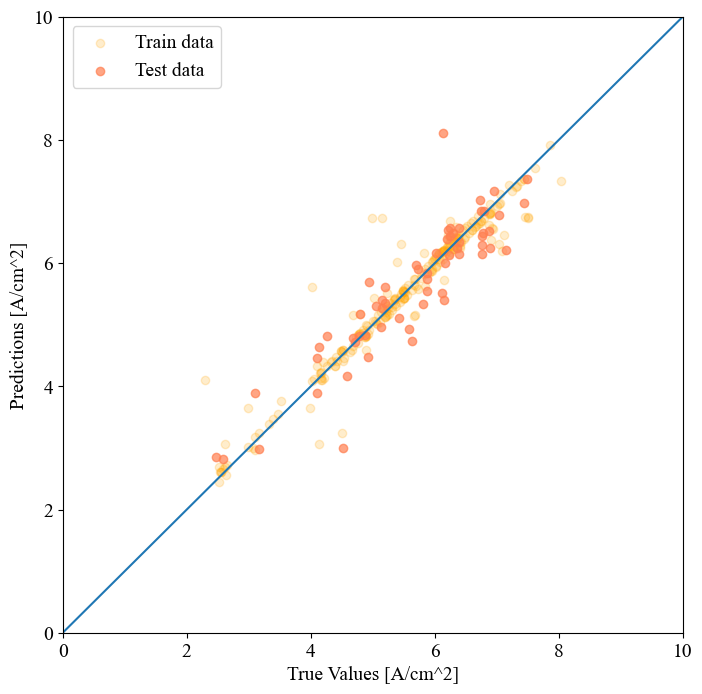

In [31]:
# 模型在训练集以及验证集上的表现情况图
test_predictions = BO_svm.predict(X_test).flatten()
train_predictions = BO_svm.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'orange', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='coral', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [32]:
# 保存训练好的模型
dump(BO_svm, open('D:\IPython\Corrosion-ML\saved_model\支持向量机\贝叶斯优化模型\BOSVM_7.pkl', 'wb'))

# 梯度提升决策树

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 定义Gradient Boosting回归器
gbdt = GradientBoostingRegressor()

# 训练模型
gbdt.fit(X_train, y_train)

GradientBoostingRegressor()

In [34]:
print('梯度提升决策树初训练回归模型评价指标展示：')

# 预测测试集
y_pred_test = gbdt.predict(X_test)

# 预测训练集
y_pred_train = gbdt.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("测试集上的R^2 Score: ",r2_test)
print("训练集上的R^2 Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

梯度提升决策树初训练回归模型评价指标展示：
测试集上的R^2 Score:  0.7634210538656203
训练集上的R^2 Score:  0.9134292789051357
测试集上的MAE: 0.4090054245846588
训练集上的MAE: 0.2602826357934006
测试集上的MSE: 0.30901139896535257
训练集上的MSE: 0.12415693804032292
测试集上的RMSE: 0.5558879374166636
训练集上的RMSE: 0.3523591038135994


<Figure size 800x600 with 0 Axes>

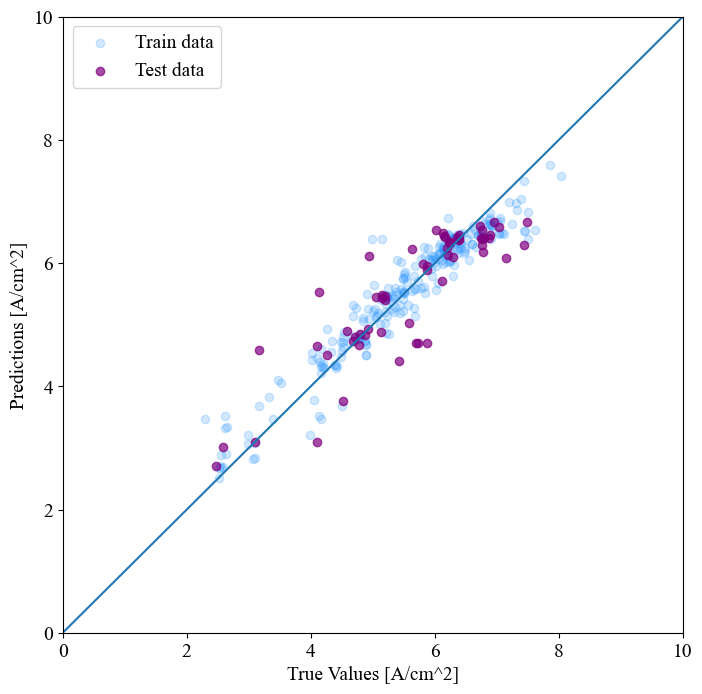

In [35]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及测试集上的表现情况图
test_predictions = gbdt.predict(X_test).flatten()
train_predictions = gbdt.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [36]:
# 保存训练好的模型
dump(gbdt, open('D:\IPython\Corrosion-ML\saved_model\梯度提升决策树\初训练模型\GBDT_6.pkl', 'wb'))

# 交叉验证

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

# 定义Gradient Boosting回归器
cv_gbdt = GradientBoostingRegressor()

# 预测训练集
y_pred_train_cv = cross_val_predict(cv_gbdt, X_train, y_train, cv=5)

# 在整个训练集上拟合模型
cv_gbdt.fit(X_train, y_train)

# 预测测试集
y_pred_test_cv = cv_gbdt.predict(X_test)

In [38]:
print('梯度提升决策树交叉验证回归模型评价指标展示：')

# 计算R^2分数
score_test = cv_gbdt.score(X_test, y_test)
print('测试集上的R^2分数：', score_test)

# 计算R^2分数
score_train = cv_gbdt.score(X_train, y_train)
print('训练集上的R^2分数：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test_cv)
mae_train = mean_absolute_error(y_train, y_pred_train_cv)

mse_test = mean_squared_error(y_test, y_pred_test_cv)
mse_train = mean_squared_error(y_train, y_pred_train_cv)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

梯度提升决策树交叉验证回归模型评价指标展示：
测试集上的R^2分数： 0.764170227923437
训练集上的R^2分数： 0.9134292789051357
测试集上的MAE: 0.4088130133291721
训练集上的MAE: 0.5686073745469831
测试集上的MSE: 0.3080328532094551
训练集上的MSE: 0.5622706255006177
测试集上的RMSE: 0.555007074918379
训练集上的RMSE: 0.7498470680749627


<Figure size 800x600 with 0 Axes>

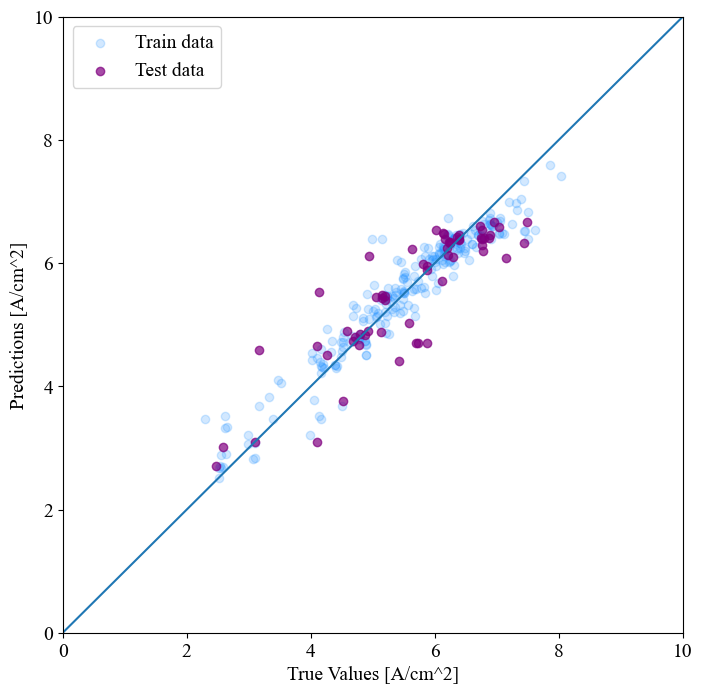

In [39]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及测试集上的表现情况图
test_predictions = cv_gbdt.predict(X_test).flatten()
train_predictions = cv_gbdt.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [40]:
# 保存训练好的模型
dump(cv_gbdt, open('D:\IPython\Corrosion-ML\saved_model\梯度提升决策树\交叉验证模型\CVGBDT_6.pkl', 'wb'))

# 贝叶斯优化

In [41]:
import optuna

# 定义目标函数
def objective(trial):
    # 定义超参数搜索空间
    n_estimators = trial.suggest_int('n_estimators', 10, 1000, log=True)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
    max_depth = trial.suggest_int('max_depth', 2, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
        
    # 构建梯度提升树模型
    BOmodel = GradientBoostingRegressor(n_estimators=n_estimators,
                                       learning_rate=learning_rate,
                                       max_depth=max_depth,
                                       max_features=max_features,
                                       loss='squared_error',
                                       random_state=42)
    # 训练模型
    BOmodel.fit(X_train, y_train)
    
    # 计算预测误差
    y_pred = BOmodel.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# 运行优化搜索算法
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# 打印最优参数
print(f'Best params: {study.best_params}')

# 构建梯度提升树模型，并使用最优参数进行训练和预测
BOmodel = GradientBoostingRegressor(n_estimators=study.best_params['n_estimators'],
                                   learning_rate=study.best_params['learning_rate'],
                                   max_depth=study.best_params['max_depth'],
                                   max_features=study.best_params['max_features'],
                                   loss='squared_error',
                                    random_state=42)
BOmodel.fit(X_train, y_train)

# 预测测试集
y_pred_test = BOmodel.predict(X_test)

# 预测训练集
y_pred_train = BOmodel.predict(X_train)

[I 2024-01-03 16:39:12,276] A new study created in memory with name: no-name-bbe06398-b998-4bae-962e-10ee982b9526
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:12,344] Trial 0 finished with value: 0.865017046489313 and parameters: {'n_estimators': 92, 'learning_rate': 0.003913843079338185, 'max_depth': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.865017046489313.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('lea

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:15,225] Trial 14 finished with value: 0.3371274937312444 and parameters: {'n_estimators': 968, 'learning_rate': 0.2300535645360672, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3371274937312444.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:15,794] Trial 15 finished with value: 0.3135994031777746 and paramet

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:19,483] Trial 28 finished with value: 0.30756163778994733 and parameters: {'n_estimators': 333, 'learning_rate': 0.037375546248909465, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.2949904741073366.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:19,633] Trial 29 finished with value: 0.4034682314416976 and para

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:23,519] Trial 42 finished with value: 0.3079775202530671 and parameters: {'n_estimators': 484, 'learning_rate': 0.03352182432903904, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.2949904741073366.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:23,826] Trial 43 finished with value: 0.3407893758801248 and parame

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:28,869] Trial 56 finished with value: 0.3160902796683305 and parameters: {'n_estimators': 991, 'learning_rate': 0.2173414930108541, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 20 with value: 0.2949904741073366.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:29,229] Trial 57 finished with value: 0.29976425981675026 and parame

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:34,307] Trial 70 finished with value: 0.3117692017060133 and parameters: {'n_estimators': 385, 'learning_rate': 0.04209549492461735, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 63 with value: 0.28286484569626924.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:34,815] Trial 71 finished with value: 0.3075809632386589 and param

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:38,556] Trial 84 finished with value: 0.3328960826196287 and parameters: {'n_estimators': 301, 'learning_rate': 0.068331430961075, 'max_depth': 2, 'max_features': 'sqrt'}. Best is trial 82 with value: 0.2742957232471843.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:38,777] Trial 85 finished with value: 0.27691219284032303 and paramet

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:41,867] Trial 98 finished with value: 0.2959596953487763 and parameters: {'n_estimators': 599, 'learning_rate': 0.04698335258814637, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 82 with value: 0.2742957232471843.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:42,101] Trial 99 finished with value: 0.32327380038403813 and param

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:45,079] Trial 112 finished with value: 0.31167755474207 and parameters: {'n_estimators': 464, 'learning_rate': 0.07625601576558681, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 82 with value: 0.2742957232471843.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:45,429] Trial 113 finished with value: 0.30935462700280897 and param

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:48,024] Trial 126 finished with value: 0.28742806887574107 and parameters: {'n_estimators': 259, 'learning_rate': 0.02971787828772745, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 82 with value: 0.2742957232471843.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:48,164] Trial 127 finished with value: 0.29669826031320956 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:50,549] Trial 140 finished with value: 0.336076073621272 and parameters: {'n_estimators': 295, 'learning_rate': 0.06749697317636309, 'max_depth': 2, 'max_features': 'sqrt'}. Best is trial 82 with value: 0.2742957232471843.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:50,709] Trial 141 finished with value: 0.30933090110213846 and para

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:52,700] Trial 154 finished with value: 0.29153194260957227 and parameters: {'n_estimators': 244, 'learning_rate': 0.07234348292297092, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 142 with value: 0.26912667274017993.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:52,872] Trial 155 finished with value: 0.2829363225916707 and p

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:54,793] Trial 168 finished with value: 0.2775562374347158 and parameters: {'n_estimators': 239, 'learning_rate': 0.07040807993155021, 'max_depth': 3, 'max_features': 'log2'}. Best is trial 142 with value: 0.26912667274017993.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:54,945] Trial 169 finished with value: 0.2907893688371628 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:56,653] Trial 182 finished with value: 0.27641168233746427 and parameters: {'n_estimators': 184, 'learning_rate': 0.07214070267332956, 'max_depth': 3, 'max_features': 'log2'}. Best is trial 142 with value: 0.26912667274017993.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:56,771] Trial 183 finished with value: 0.2901954046915785 and p

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:58,371] Trial 196 finished with value: 0.2910609623304044 and parameters: {'n_estimators': 149, 'learning_rate': 0.09250133288684236, 'max_depth': 3, 'max_features': 'log2'}. Best is trial 142 with value: 0.26912667274017993.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:39:58,557] Trial 197 finished with value: 0.2836428180595804 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:00,407] Trial 210 finished with value: 0.28649768257968533 and parameters: {'n_estimators': 218, 'learning_rate': 0.06502087303940303, 'max_depth': 3, 'max_features': 'log2'}. Best is trial 142 with value: 0.26912667274017993.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:00,591] Trial 211 finished with value: 0.2955329041613922 and p

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:02,466] Trial 224 finished with value: 0.29409220026422667 and parameters: {'n_estimators': 176, 'learning_rate': 0.0670458432792826, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:02,572] Trial 225 finished with value: 0.2961618997661538 and par

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:04,142] Trial 238 finished with value: 0.29239725346222856 and parameters: {'n_estimators': 157, 'learning_rate': 0.08336080464318034, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:04,295] Trial 239 finished with value: 0.30142837192750427 and p

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:05,851] Trial 252 finished with value: 0.38902336639883395 and parameters: {'n_estimators': 180, 'learning_rate': 0.25666213331132093, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:05,897] Trial 253 finished with value: 0.42876166380626046 and p

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:07,857] Trial 266 finished with value: 0.4182767336890131 and parameters: {'n_estimators': 197, 'learning_rate': 0.4730861195455189, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:08,039] Trial 267 finished with value: 0.30744297798668346 and par

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:10,226] Trial 280 finished with value: 0.4331108690618847 and parameters: {'n_estimators': 333, 'learning_rate': 0.20027459048696478, 'max_depth': 6, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:10,366] Trial 281 finished with value: 0.2836604396515976 and par

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:11,849] Trial 294 finished with value: 0.4534614004885619 and parameters: {'n_estimators': 179, 'learning_rate': 0.014146346475305036, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:11,914] Trial 295 finished with value: 0.3730439700248323 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:13,589] Trial 308 finished with value: 0.37496794118545296 and parameters: {'n_estimators': 197, 'learning_rate': 0.06957533146677068, 'max_depth': 2, 'max_features': 'log2'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:13,709] Trial 309 finished with value: 0.3691192635547101 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:15,571] Trial 322 finished with value: 0.2778846643522767 and parameters: {'n_estimators': 219, 'learning_rate': 0.0632319889668409, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:15,728] Trial 323 finished with value: 0.4532435247292972 and para

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:17,601] Trial 336 finished with value: 0.3626521281251195 and parameters: {'n_estimators': 196, 'learning_rate': 0.8861422919197612, 'max_depth': 2, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:17,680] Trial 337 finished with value: 0.3049952232252643 and para

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:19,693] Trial 350 finished with value: 0.41586119807960253 and parameters: {'n_estimators': 84, 'learning_rate': 0.7535873331841288, 'max_depth': 3, 'max_features': 'log2'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:19,827] Trial 351 finished with value: 0.2917127944229499 and para

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:21,729] Trial 364 finished with value: 0.305288936735992 and parameters: {'n_estimators': 187, 'learning_rate': 0.08491304444691969, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:21,867] Trial 365 finished with value: 0.2920376349364091 and para

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:23,954] Trial 378 finished with value: 0.2937305302523175 and parameters: {'n_estimators': 426, 'learning_rate': 0.08017632496094626, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:24,054] Trial 379 finished with value: 0.3253667754349863 and par

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:25,459] Trial 392 finished with value: 0.29431964584602993 and parameters: {'n_estimators': 244, 'learning_rate': 0.15805642692548022, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:25,507] Trial 393 finished with value: 0.4230303318212838 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:27,619] Trial 406 finished with value: 0.3021782999000161 and parameters: {'n_estimators': 181, 'learning_rate': 0.08398565895872526, 'max_depth': 3, 'max_features': 'log2'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:27,657] Trial 407 finished with value: 0.5330684944321749 and par

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:29,978] Trial 420 finished with value: 0.33627828534814314 and parameters: {'n_estimators': 898, 'learning_rate': 0.06813845019245598, 'max_depth': 2, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:30,121] Trial 421 finished with value: 0.30516762916516804 and p

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:32,181] Trial 434 finished with value: 0.3158919245734898 and parameters: {'n_estimators': 319, 'learning_rate': 0.03032047279830615, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:32,321] Trial 435 finished with value: 0.286243435128856 and para

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:34,302] Trial 448 finished with value: 0.2901090648593233 and parameters: {'n_estimators': 250, 'learning_rate': 0.05906012850418719, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:34,341] Trial 449 finished with value: 1.2328085821147445 and par

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:36,386] Trial 462 finished with value: 0.3500708076495231 and parameters: {'n_estimators': 93, 'learning_rate': 0.5106915916782412, 'max_depth': 5, 'max_features': 'log2'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:36,495] Trial 463 finished with value: 0.3667824322732695 and param

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:38,163] Trial 476 finished with value: 0.29616148730293135 and parameters: {'n_estimators': 129, 'learning_rate': 0.07996130964168582, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:38,302] Trial 477 finished with value: 0.43515861217084967 and p

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:40,269] Trial 490 finished with value: 0.36916908807087484 and parameters: {'n_estimators': 162, 'learning_rate': 0.0757549133068844, 'max_depth': 2, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:40,401] Trial 491 finished with value: 0.3065741239326447 and par

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:42,580] Trial 504 finished with value: 0.28877302264786214 and parameters: {'n_estimators': 190, 'learning_rate': 0.0842175740895718, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:42,695] Trial 505 finished with value: 0.2919854514423207 and par

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:44,263] Trial 518 finished with value: 0.27575193283587346 and parameters: {'n_estimators': 135, 'learning_rate': 0.10747291004898733, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:44,374] Trial 519 finished with value: 0.32323661900740047 and p

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:45,745] Trial 532 finished with value: 0.39631546973967835 and parameters: {'n_estimators': 148, 'learning_rate': 0.4203001650807444, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:45,876] Trial 533 finished with value: 0.2887992633800577 and par

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:48,090] Trial 546 finished with value: 0.3381331226672924 and parameters: {'n_estimators': 731, 'learning_rate': 0.22213765072601407, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:48,217] Trial 547 finished with value: 0.2732084735843041 and par

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:50,648] Trial 560 finished with value: 0.5747833560519768 and parameters: {'n_estimators': 14, 'learning_rate': 0.0731695994893617, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:50,755] Trial 561 finished with value: 0.30239940765318574 and para

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:52,847] Trial 574 finished with value: 0.4146017204246364 and parameters: {'n_estimators': 171, 'learning_rate': 0.02135295272620129, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:52,946] Trial 575 finished with value: 0.286446550944184 and para

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:54,541] Trial 588 finished with value: 0.5229933288107051 and parameters: {'n_estimators': 141, 'learning_rate': 0.8411000350970809, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:54,608] Trial 589 finished with value: 0.6509354104553944 and para

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:56,672] Trial 602 finished with value: 0.29735070739947655 and parameters: {'n_estimators': 201, 'learning_rate': 0.08732353282386213, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:56,713] Trial 603 finished with value: 0.7063936538137948 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:58,856] Trial 616 finished with value: 0.27693370786507654 and parameters: {'n_estimators': 176, 'learning_rate': 0.08098747687770244, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 221 with value: 0.2690229497680776.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:40:59,025] Trial 617 finished with value: 0.4022106858074811 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:01,386] Trial 630 finished with value: 0.2798887887551625 and parameters: {'n_estimators': 219, 'learning_rate': 0.07204934424470183, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 622 with value: 0.2687265956655352.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:01,564] Trial 631 finished with value: 0.3110790832240075 and par

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:03,501] Trial 644 finished with value: 0.27558201499843726 and parameters: {'n_estimators': 211, 'learning_rate': 0.061933775777380115, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 622 with value: 0.2687265956655352.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:03,664] Trial 645 finished with value: 0.29062890247758694 and 

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:05,613] Trial 658 finished with value: 0.43502491994272585 and parameters: {'n_estimators': 21, 'learning_rate': 0.11417637539209495, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 653 with value: 0.2680291400287686.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:05,791] Trial 659 finished with value: 0.32797660692677866 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:08,187] Trial 672 finished with value: 0.4929617286630284 and parameters: {'n_estimators': 346, 'learning_rate': 0.005520652807586893, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 653 with value: 0.2680291400287686.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:08,260] Trial 673 finished with value: 0.6456427557922806 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:11,096] Trial 686 finished with value: 0.2774794704648045 and parameters: {'n_estimators': 427, 'learning_rate': 0.06720193955507071, 'max_depth': 3, 'max_features': 'log2'}. Best is trial 653 with value: 0.2680291400287686.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:11,169] Trial 687 finished with value: 0.37758317855458123 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:13,047] Trial 700 finished with value: 0.3869438819254429 and parameters: {'n_estimators': 235, 'learning_rate': 0.018746100933866642, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 653 with value: 0.2680291400287686.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:13,269] Trial 701 finished with value: 0.3093408063885808 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:14,844] Trial 714 finished with value: 0.30311068257305135 and parameters: {'n_estimators': 167, 'learning_rate': 0.04975439228442408, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 653 with value: 0.2680291400287686.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:15,251] Trial 715 finished with value: 0.2991505012746136 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:17,155] Trial 728 finished with value: 0.306239122898106 and parameters: {'n_estimators': 210, 'learning_rate': 0.07509183451781526, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 653 with value: 0.2680291400287686.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:17,196] Trial 729 finished with value: 0.6865833709012465 and para

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:19,288] Trial 742 finished with value: 0.296356744359525 and parameters: {'n_estimators': 204, 'learning_rate': 0.0935297262105993, 'max_depth': 3, 'max_features': 'log2'}. Best is trial 653 with value: 0.2680291400287686.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:19,347] Trial 743 finished with value: 0.36761396434711685 and para

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:21,119] Trial 756 finished with value: 0.47219300603202163 and parameters: {'n_estimators': 28, 'learning_rate': 0.06661983282922403, 'max_depth': 3, 'max_features': 'log2'}. Best is trial 653 with value: 0.2680291400287686.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:21,282] Trial 757 finished with value: 0.3187189623806902 and par

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:22,769] Trial 770 finished with value: 0.49294561435558043 and parameters: {'n_estimators': 55, 'learning_rate': 0.035797957608917054, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 764 with value: 0.26530802150187904.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:22,931] Trial 771 finished with value: 0.5675298898120057 and p

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:24,628] Trial 784 finished with value: 0.2851440893211578 and parameters: {'n_estimators': 284, 'learning_rate': 0.06895242647116319, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 764 with value: 0.26530802150187904.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:24,769] Trial 785 finished with value: 0.33499013428164903 and p

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:27,294] Trial 798 finished with value: 0.35523094945623146 and parameters: {'n_estimators': 261, 'learning_rate': 0.2585351581039976, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 764 with value: 0.26530802150187904.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:27,441] Trial 799 finished with value: 0.50414461312619 and para

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:29,450] Trial 812 finished with value: 0.3217549497445145 and parameters: {'n_estimators': 169, 'learning_rate': 0.1379479394681539, 'max_depth': 3, 'max_features': 'log2'}. Best is trial 764 with value: 0.26530802150187904.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:29,551] Trial 813 finished with value: 0.3807337053369944 and par

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:31,656] Trial 826 finished with value: 0.3353046705121322 and parameters: {'n_estimators': 245, 'learning_rate': 0.03561496025676583, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 815 with value: 0.2491476970716434.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:31,725] Trial 827 finished with value: 0.3845476262210678 and par

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:33,809] Trial 840 finished with value: 0.28473871350091534 and parameters: {'n_estimators': 158, 'learning_rate': 0.06839500262457258, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 815 with value: 0.2491476970716434.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:33,954] Trial 841 finished with value: 0.3242937263209599 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:35,708] Trial 854 finished with value: 0.2972930993017726 and parameters: {'n_estimators': 177, 'learning_rate': 0.08157138405169562, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 815 with value: 0.2491476970716434.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:35,867] Trial 855 finished with value: 0.38599251951878355 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:38,055] Trial 868 finished with value: 0.28427455224784776 and parameters: {'n_estimators': 151, 'learning_rate': 0.16671431044953317, 'max_depth': 3, 'max_features': 'log2'}. Best is trial 815 with value: 0.2491476970716434.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:38,198] Trial 869 finished with value: 0.3192239805547454 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:40,022] Trial 882 finished with value: 0.3050317936683434 and parameters: {'n_estimators': 579, 'learning_rate': 0.04573139138830664, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 815 with value: 0.2491476970716434.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:40,160] Trial 883 finished with value: 0.3414931263556892 and par

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:42,605] Trial 896 finished with value: 0.40428213746594377 and parameters: {'n_estimators': 70, 'learning_rate': 0.047404814880220504, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 815 with value: 0.2491476970716434.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:42,718] Trial 897 finished with value: 0.31651081950074084 and p

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:44,881] Trial 910 finished with value: 0.5373394795453297 and parameters: {'n_estimators': 674, 'learning_rate': 0.0022346649950302894, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 815 with value: 0.2491476970716434.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:45,247] Trial 911 finished with value: 0.3110340607014816 and p

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:47,256] Trial 924 finished with value: 0.30456073726397775 and parameters: {'n_estimators': 227, 'learning_rate': 0.18692664663770156, 'max_depth': 3, 'max_features': 'log2'}. Best is trial 815 with value: 0.2491476970716434.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:47,416] Trial 925 finished with value: 0.2889418732500185 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:49,266] Trial 938 finished with value: 0.6907336805376881 and parameters: {'n_estimators': 20, 'learning_rate': 0.03929189688279619, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 815 with value: 0.2491476970716434.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:49,322] Trial 939 finished with value: 0.565570500406641 and param

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:51,224] Trial 952 finished with value: 0.2885553261022941 and parameters: {'n_estimators': 192, 'learning_rate': 0.06522157512888889, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 815 with value: 0.2491476970716434.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:51,523] Trial 953 finished with value: 0.3529035218882435 and par

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:53,451] Trial 966 finished with value: 0.4575972533219781 and parameters: {'n_estimators': 50, 'learning_rate': 0.034029841979851566, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 815 with value: 0.2491476970716434.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:53,586] Trial 967 finished with value: 0.35362295567398533 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:55,964] Trial 980 finished with value: 1.2630912309167888 and parameters: {'n_estimators': 45, 'learning_rate': 0.0010138289588654543, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 815 with value: 0.2491476970716434.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:56,023] Trial 981 finished with value: 0.4627682433028325 and pa

D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:57,771] Trial 994 finished with value: 0.28452186429682025 and parameters: {'n_estimators': 202, 'learning_rate': 0.06128386981601233, 'max_depth': 3, 'max_features': 'log2'}. Best is trial 815 with value: 0.2491476970716434.
D:\Python\temp\ipykernel_4740\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:57,825] Trial 995 finished with value: 0.48161976702519965 and p

Best params: {'n_estimators': 228, 'learning_rate': 0.06907777775800536, 'max_depth': 3, 'max_features': 'sqrt'}


In [42]:
print('梯度提升决策树贝叶斯优化回归模型评价指标展示：')

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("测试集上的R^2 Score: ",r2_test)
print("训练集上的R^2 Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

梯度提升决策树贝叶斯优化回归模型评价指标展示：
测试集上的R^2 Score:  0.8092526689877031
训练集上的R^2 Score:  0.9204954928465623
测试集上的MAE: 0.3749822279206167
训练集上的MAE: 0.24404596814958468
测试集上的MSE: 0.2491476970716434
训练集上的MSE: 0.11402280174793841
测试集上的RMSE: 0.49914696941045666
训练集上的RMSE: 0.337672625108904


<Figure size 800x600 with 0 Axes>

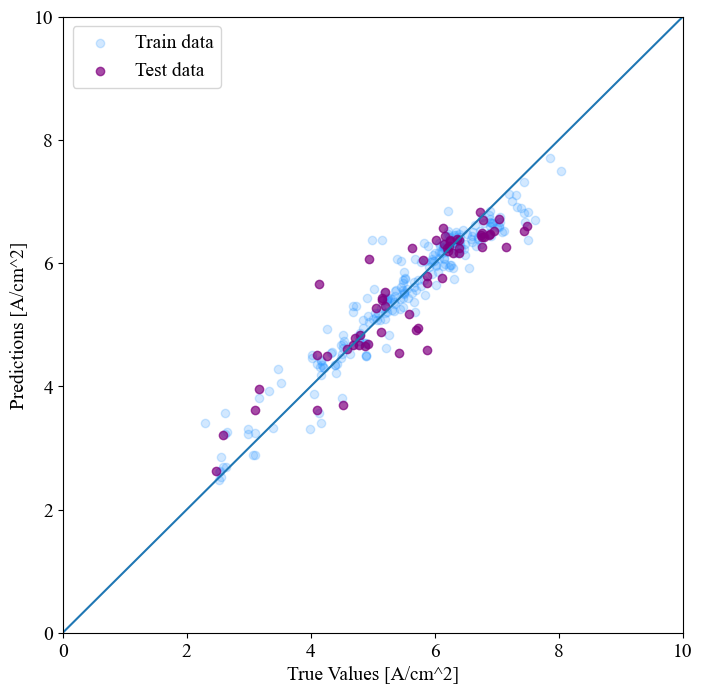

In [43]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及测试集上的表现情况图
test_predictions = BOmodel.predict(X_test).flatten()
train_predictions = BOmodel.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [44]:
# 保存训练好的模型
dump(BOmodel, open('D:\IPython\Corrosion-ML\saved_model\梯度提升决策树\贝叶斯优化模型\BOGBDT_6.pkl', 'wb'))

# 极端梯度提升

In [45]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 创建XGBoost回归模型
xgbt = xgb.XGBRegressor()

# 在训练集上拟合模型
xgbt.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [46]:
print('极端梯度提升初训练模型评价指标展示：')

# 预测测试集
y_pred_test = xgbt.predict(X_test)

# 预测训练集
y_pred_train = xgbt.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("测试集上的R^2 Score: ",r2_test)
print("训练集上的R^2 Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

极端梯度提升初训练模型评价指标展示：
测试集上的R^2 Score:  0.7336479060864203
训练集上的R^2 Score:  0.9728856055395626
测试集上的MAE: 0.4247741351727115
训练集上的MAE: 0.05411018886735328
测试集上的MSE: 0.34790007522831534
训练集上的MSE: 0.038886590644618156
测试集上的RMSE: 0.5898305478934737
训练集上的RMSE: 0.1971968322377876


<Figure size 800x600 with 0 Axes>

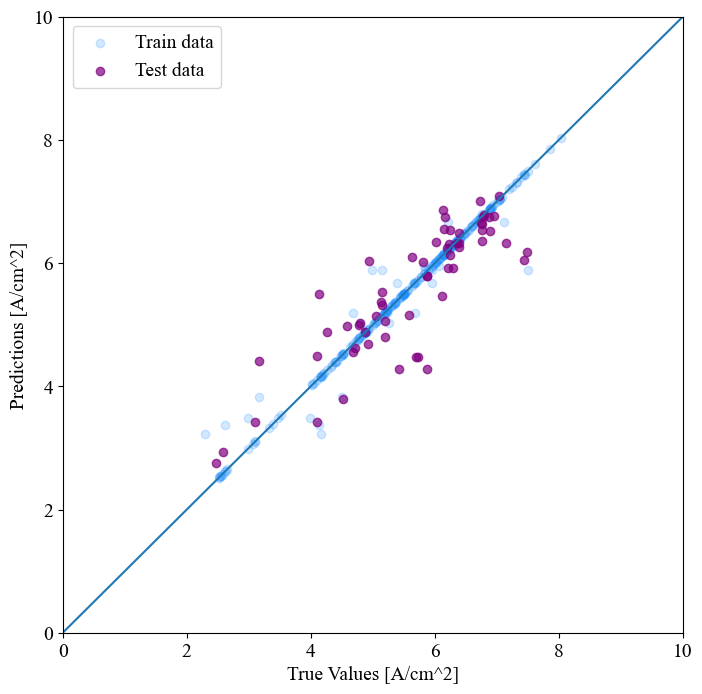

In [47]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及测试集上的表现情况图
test_predictions = xgbt.predict(X_test).flatten()
train_predictions = xgbt.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [48]:
# 保存训练好的模型
dump(xgbt, open('D:\IPython\Corrosion-ML\saved_model\极端梯度提升\初训练模型\XGBT_6.pkl', 'wb'))

# 贝叶斯优化

In [49]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000, log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 30, step=2),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }

    BO_xgbt = XGBRegressor(**params, random_state=42)
    BO_xgbt.fit(X_train, y_train)
    
    # 计算指标
    y_pred = BO_xgbt.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# 运行贝叶斯优化
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

print('Best MSE:', study.best_value)

# 输出最佳超参数
best_params_xgb = study.best_params
print('Best params for XGBoost:', best_params_xgb)

# 训练最佳模型
BO_xgbt = XGBRegressor(**best_params_xgb, random_state=42)
BO_xgbt.fit(X_train, y_train)

[I 2024-01-03 16:41:59,579] A new study created in memory with name: no-name-e62a3612-2b52-4daf-a227-d5e24cc04c98
[I 2024-01-03 16:42:00,049] Trial 0 finished with value: 0.43816914996919437 and parameters: {'n_estimators': 425, 'max_depth': 24, 'learning_rate': 0.2662796943267525, 'subsample': 0.4153203562444736, 'colsample_bytree': 0.8795196935312186, 'min_child_weight': 6}. Best is trial 0 with value: 0.43816914996919437.
[I 2024-01-03 16:42:00,077] Trial 1 finished with value: 0.6300725664584095 and parameters: {'n_estimators': 19, 'max_depth': 10, 'learning_rate': 0.48895972130785575, 'subsample': 0.23391897640109383, 'colsample_bytree': 0.9089510872791584, 'min_child_weight': 2}. Best is trial 0 with value: 0.43816914996919437.
[I 2024-01-03 16:42:00,624] Trial 2 finished with value: 0.6889547960509096 and parameters: {'n_estimators': 605, 'max_depth': 10, 'learning_rate': 0.448460987695524, 'subsample': 0.5031999441515325, 'colsample_bytree': 0.37902761058510925, 'min_child_weig

[I 2024-01-03 16:42:03,372] Trial 25 finished with value: 0.3441443001851876 and parameters: {'n_estimators': 122, 'max_depth': 14, 'learning_rate': 0.2186825620415081, 'subsample': 0.606165164230879, 'colsample_bytree': 0.6886256032473239, 'min_child_weight': 6}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:03,430] Trial 26 finished with value: 0.3716627801038753 and parameters: {'n_estimators': 27, 'max_depth': 20, 'learning_rate': 0.4085693055854859, 'subsample': 0.5233552519724466, 'colsample_bytree': 0.8424553323954904, 'min_child_weight': 7}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:03,467] Trial 27 finished with value: 0.5826847738623095 and parameters: {'n_estimators': 16, 'max_depth': 26, 'learning_rate': 0.30026068399950734, 'subsample': 0.1046545223679945, 'colsample_bytree': 0.9284443450021683, 'min_child_weight': 5}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:03,531] Trial 28 finished with val

[I 2024-01-03 16:42:06,642] Trial 50 finished with value: 0.40861912936682054 and parameters: {'n_estimators': 36, 'max_depth': 16, 'learning_rate': 0.2627521529219294, 'subsample': 0.725985651175849, 'colsample_bytree': 0.9583589563192602, 'min_child_weight': 7}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:06,770] Trial 51 finished with value: 0.35307563861505725 and parameters: {'n_estimators': 105, 'max_depth': 8, 'learning_rate': 0.33528950827436965, 'subsample': 0.5846420399087816, 'colsample_bytree': 0.7602226370047445, 'min_child_weight': 10}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:06,874] Trial 52 finished with value: 0.35916557324917187 and parameters: {'n_estimators': 83, 'max_depth': 6, 'learning_rate': 0.2910404527786501, 'subsample': 0.6323051070304755, 'colsample_bytree': 0.7905164535660905, 'min_child_weight': 9}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:06,983] Trial 53 finished with v

[I 2024-01-03 16:42:09,216] Trial 75 finished with value: 0.48886330209858303 and parameters: {'n_estimators': 43, 'max_depth': 12, 'learning_rate': 0.29769543780631813, 'subsample': 0.4884082142503149, 'colsample_bytree': 0.8116404480047076, 'min_child_weight': 7}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:09,310] Trial 76 finished with value: 0.31657217648130825 and parameters: {'n_estimators': 56, 'max_depth': 24, 'learning_rate': 0.25986089153957476, 'subsample': 0.6489241192369808, 'colsample_bytree': 0.8542581915335785, 'min_child_weight': 8}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:09,378] Trial 77 finished with value: 0.2980747175888811 and parameters: {'n_estimators': 32, 'max_depth': 24, 'learning_rate': 0.2502762689820089, 'subsample': 0.6473572089988952, 'colsample_bytree': 0.9514079007875731, 'min_child_weight': 7}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:09,446] Trial 78 finished with 

[I 2024-01-03 16:42:11,634] Trial 100 finished with value: 0.4320283470293092 and parameters: {'n_estimators': 41, 'max_depth': 14, 'learning_rate': 0.28795921018397974, 'subsample': 0.6916418423788829, 'colsample_bytree': 0.7978852691272263, 'min_child_weight': 3}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:11,752] Trial 101 finished with value: 0.36285643192275024 and parameters: {'n_estimators': 47, 'max_depth': 24, 'learning_rate': 0.27637808460142477, 'subsample': 0.6241490354437388, 'colsample_bytree': 0.8859835205177439, 'min_child_weight': 3}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:11,858] Trial 102 finished with value: 0.42374623217952057 and parameters: {'n_estimators': 56, 'max_depth': 18, 'learning_rate': 0.24831096542223918, 'subsample': 0.6710836622934393, 'colsample_bytree': 0.8427639900355458, 'min_child_weight': 6}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:11,920] Trial 103 finished 

[I 2024-01-03 16:42:14,161] Trial 125 finished with value: 0.48081962863927935 and parameters: {'n_estimators': 61, 'max_depth': 24, 'learning_rate': 0.3229244383707901, 'subsample': 0.5645533027125978, 'colsample_bytree': 0.7474223886203857, 'min_child_weight': 2}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:14,241] Trial 126 finished with value: 0.33749791974584264 and parameters: {'n_estimators': 35, 'max_depth': 16, 'learning_rate': 0.2513093077963387, 'subsample': 0.5255928989735275, 'colsample_bytree': 0.824873776118838, 'min_child_weight': 4}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:14,310] Trial 127 finished with value: 0.3952846066775836 and parameters: {'n_estimators': 29, 'max_depth': 20, 'learning_rate': 0.26945332133531097, 'subsample': 0.6218073983223631, 'colsample_bytree': 0.7149447273107012, 'min_child_weight': 5}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:14,394] Trial 128 finished wit

[I 2024-01-03 16:42:16,838] Trial 150 finished with value: 0.37719997334817734 and parameters: {'n_estimators': 29, 'max_depth': 16, 'learning_rate': 0.2319340756732272, 'subsample': 0.5708928808695398, 'colsample_bytree': 0.9899598917038983, 'min_child_weight': 6}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:16,942] Trial 151 finished with value: 0.34849952044289856 and parameters: {'n_estimators': 46, 'max_depth': 16, 'learning_rate': 0.2562807584687115, 'subsample': 0.6752740306584026, 'colsample_bytree': 0.9292395129948116, 'min_child_weight': 5}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:17,045] Trial 152 finished with value: 0.3654385272731068 and parameters: {'n_estimators': 38, 'max_depth': 18, 'learning_rate': 0.2800133946849308, 'subsample': 0.6556075769661994, 'colsample_bytree': 0.9988137266230452, 'min_child_weight': 3}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:17,161] Trial 153 finished wit

[I 2024-01-03 16:42:19,142] Trial 175 finished with value: 0.33594506290922993 and parameters: {'n_estimators': 38, 'max_depth': 22, 'learning_rate': 0.24354091587594778, 'subsample': 0.6672374348928972, 'colsample_bytree': 0.7809708181064441, 'min_child_weight': 8}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:19,226] Trial 176 finished with value: 0.31202672301920525 and parameters: {'n_estimators': 42, 'max_depth': 20, 'learning_rate': 0.24544168724867166, 'subsample': 0.597361543187394, 'colsample_bytree': 0.7541749248472458, 'min_child_weight': 7}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:19,312] Trial 177 finished with value: 0.3463153302551036 and parameters: {'n_estimators': 44, 'max_depth': 20, 'learning_rate': 0.2193063298119069, 'subsample': 0.6172973982894541, 'colsample_bytree': 0.7916387826421156, 'min_child_weight': 7}. Best is trial 13 with value: 0.28978534448351195.
[I 2024-01-03 16:42:19,400] Trial 178 finished wi

[I 2024-01-03 16:42:21,628] Trial 200 finished with value: 0.355535368184201 and parameters: {'n_estimators': 70, 'max_depth': 18, 'learning_rate': 0.21804505942812305, 'subsample': 0.6016651692407234, 'colsample_bytree': 0.7532241928346585, 'min_child_weight': 8}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:21,732] Trial 201 finished with value: 0.36291308144628853 and parameters: {'n_estimators': 57, 'max_depth': 18, 'learning_rate': 0.23580701803364995, 'subsample': 0.5880796314020824, 'colsample_bytree': 0.7914365523450909, 'min_child_weight': 8}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:21,830] Trial 202 finished with value: 0.3525423305585287 and parameters: {'n_estimators': 63, 'max_depth': 20, 'learning_rate': 0.20038131692356212, 'subsample': 0.4888647380149761, 'colsample_bytree': 0.8174656465751456, 'min_child_weight': 8}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:21,954] Trial 203 finished

[I 2024-01-03 16:42:24,597] Trial 225 finished with value: 0.344740389818309 and parameters: {'n_estimators': 48, 'max_depth': 18, 'learning_rate': 0.26384823883900277, 'subsample': 0.6413070206738131, 'colsample_bytree': 0.7423636518652085, 'min_child_weight': 9}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:24,693] Trial 226 finished with value: 0.3430060655756448 and parameters: {'n_estimators': 55, 'max_depth': 18, 'learning_rate': 0.27697258364056593, 'subsample': 0.6168819621740436, 'colsample_bytree': 0.7522061084510181, 'min_child_weight': 9}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:24,778] Trial 227 finished with value: 0.3669355717832776 and parameters: {'n_estimators': 46, 'max_depth': 28, 'learning_rate': 0.25672433217009266, 'subsample': 0.666950976437473, 'colsample_bytree': 0.9990327387303, 'min_child_weight': 10}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:24,874] Trial 228 finished wit

[I 2024-01-03 16:42:26,904] Trial 250 finished with value: 0.4048190023888705 and parameters: {'n_estimators': 60, 'max_depth': 16, 'learning_rate': 0.2967617932917481, 'subsample': 0.6115464321227742, 'colsample_bytree': 0.641925295607907, 'min_child_weight': 9}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:27,061] Trial 251 finished with value: 0.28666724932915993 and parameters: {'n_estimators': 108, 'max_depth': 18, 'learning_rate': 0.2505221580170559, 'subsample': 0.6383917201949624, 'colsample_bytree': 0.6243483627477686, 'min_child_weight': 9}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:27,217] Trial 252 finished with value: 0.33002341974814514 and parameters: {'n_estimators': 110, 'max_depth': 18, 'learning_rate': 0.15445932065519066, 'subsample': 0.6498679970728044, 'colsample_bytree': 0.6256807895160407, 'min_child_weight': 9}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:27,370] Trial 253 finishe

[I 2024-01-03 16:42:29,676] Trial 275 finished with value: 0.3769556275594526 and parameters: {'n_estimators': 71, 'max_depth': 18, 'learning_rate': 0.1923805536039895, 'subsample': 0.44327665014224127, 'colsample_bytree': 0.7972985305690424, 'min_child_weight': 9}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:29,794] Trial 276 finished with value: 0.35963811162659326 and parameters: {'n_estimators': 45, 'max_depth': 18, 'learning_rate': 0.4135607762398396, 'subsample': 0.6145625395989747, 'colsample_bytree': 0.9444288661013702, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:29,971] Trial 277 finished with value: 0.39642852959215397 and parameters: {'n_estimators': 122, 'max_depth': 30, 'learning_rate': 0.38284842509517236, 'subsample': 0.560194525164835, 'colsample_bytree': 0.856238224085512, 'min_child_weight': 9}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:30,085] Trial 278 finished

[I 2024-01-03 16:42:33,295] Trial 300 finished with value: 0.360939162978577 and parameters: {'n_estimators': 40, 'max_depth': 12, 'learning_rate': 0.207069387985054, 'subsample': 0.5484689722396584, 'colsample_bytree': 0.7840725238101707, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:33,421] Trial 301 finished with value: 0.33981664175099224 and parameters: {'n_estimators': 49, 'max_depth': 14, 'learning_rate': 0.29986291356502015, 'subsample': 0.5910709751360125, 'colsample_bytree': 0.7423231237995844, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:33,537] Trial 302 finished with value: 0.3870729598445263 and parameters: {'n_estimators': 46, 'max_depth': 14, 'learning_rate': 0.22992058728998183, 'subsample': 0.7070510980967942, 'colsample_bytree': 0.7303174308658034, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:33,665] Trial 303 finished w

[I 2024-01-03 16:42:37,455] Trial 325 finished with value: 0.40099712209138383 and parameters: {'n_estimators': 68, 'max_depth': 16, 'learning_rate': 0.245413686451501, 'subsample': 0.569474860721793, 'colsample_bytree': 0.6789864614161741, 'min_child_weight': 3}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:37,607] Trial 326 finished with value: 0.3256023080686003 and parameters: {'n_estimators': 60, 'max_depth': 20, 'learning_rate': 0.19445697073039345, 'subsample': 0.7271379771044505, 'colsample_bytree': 0.809476241484945, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:37,712] Trial 327 finished with value: 0.3138026351773283 and parameters: {'n_estimators': 36, 'max_depth': 20, 'learning_rate': 0.255737280768154, 'subsample': 0.6592215093614204, 'colsample_bytree': 0.9343361822683887, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:37,790] Trial 328 finished with

[I 2024-01-03 16:42:40,573] Trial 350 finished with value: 0.38763092041393377 and parameters: {'n_estimators': 28, 'max_depth': 20, 'learning_rate': 0.22443813508723712, 'subsample': 0.49644458473350705, 'colsample_bytree': 0.6004907338887171, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:40,636] Trial 351 finished with value: 0.4697833585706851 and parameters: {'n_estimators': 30, 'max_depth': 20, 'learning_rate': 0.23573977616040617, 'subsample': 0.1217834367347595, 'colsample_bytree': 0.5966596445126016, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:40,719] Trial 352 finished with value: 0.2967226496557197 and parameters: {'n_estimators': 33, 'max_depth': 20, 'learning_rate': 0.21091768197653996, 'subsample': 0.582658401282797, 'colsample_bytree': 0.6359454734533466, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:40,812] Trial 353 finishe

[I 2024-01-03 16:42:42,571] Trial 375 finished with value: 0.4047240067626445 and parameters: {'n_estimators': 29, 'max_depth': 22, 'learning_rate': 0.4029355287397381, 'subsample': 0.7186462761386893, 'colsample_bytree': 0.9331168346922872, 'min_child_weight': 6}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:42,679] Trial 376 finished with value: 0.3088143202017338 and parameters: {'n_estimators': 39, 'max_depth': 26, 'learning_rate': 0.22039591516007148, 'subsample': 0.834462693915583, 'colsample_bytree': 0.667720637984879, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:42,925] Trial 377 finished with value: 0.3371027002354038 and parameters: {'n_estimators': 115, 'max_depth': 20, 'learning_rate': 0.3945951888540733, 'subsample': 0.6417838971171602, 'colsample_bytree': 0.589866369054008, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:43,015] Trial 378 finished wit

[I 2024-01-03 16:42:46,757] Trial 400 finished with value: 0.3949716088345581 and parameters: {'n_estimators': 227, 'max_depth': 18, 'learning_rate': 0.33900579716744395, 'subsample': 0.5932921683136152, 'colsample_bytree': 0.5637551207173068, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:46,941] Trial 401 finished with value: 0.3339112661778668 and parameters: {'n_estimators': 103, 'max_depth': 18, 'learning_rate': 0.23972518675624926, 'subsample': 0.43982530008366727, 'colsample_bytree': 0.4963473689023261, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:47,036] Trial 402 finished with value: 0.30240362593101716 and parameters: {'n_estimators': 36, 'max_depth': 22, 'learning_rate': 0.22889848038020874, 'subsample': 0.5516792680648809, 'colsample_bytree': 0.5916937488652259, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:47,855] Trial 403 fini

[I 2024-01-03 16:42:52,488] Trial 425 finished with value: 0.4011955874844245 and parameters: {'n_estimators': 467, 'max_depth': 24, 'learning_rate': 0.24094457714529544, 'subsample': 0.6753604054540788, 'colsample_bytree': 0.4408904009435952, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:52,558] Trial 426 finished with value: 0.7197909542789898 and parameters: {'n_estimators': 21, 'max_depth': 18, 'learning_rate': 0.11687510885149169, 'subsample': 0.7283518508199107, 'colsample_bytree': 0.5979476370078007, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:54,049] Trial 427 finished with value: 0.5357053671765302 and parameters: {'n_estimators': 850, 'max_depth': 20, 'learning_rate': 0.3895098783159833, 'subsample': 0.6322844802679763, 'colsample_bytree': 0.9836056850226811, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:54,136] Trial 428 finishe

[I 2024-01-03 16:42:56,924] Trial 450 finished with value: 1.017084971374512 and parameters: {'n_estimators': 31, 'max_depth': 16, 'learning_rate': 0.45747572441256845, 'subsample': 0.14084692158214912, 'colsample_bytree': 0.5332531099504548, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:57,176] Trial 451 finished with value: 0.5014302903647818 and parameters: {'n_estimators': 113, 'max_depth': 22, 'learning_rate': 0.4181546283065314, 'subsample': 0.6429312933562837, 'colsample_bytree': 0.7687132748653843, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:57,320] Trial 452 finished with value: 0.46427953554297363 and parameters: {'n_estimators': 60, 'max_depth': 24, 'learning_rate': 0.4382557414644246, 'subsample': 0.5269297983675626, 'colsample_bytree': 0.8896068528447599, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:42:57,402] Trial 453 finished

[I 2024-01-03 16:43:01,453] Trial 475 finished with value: 0.2931920091483364 and parameters: {'n_estimators': 29, 'max_depth': 24, 'learning_rate': 0.2543031404486964, 'subsample': 0.6266616743197504, 'colsample_bytree': 0.9648707278952151, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:01,554] Trial 476 finished with value: 0.3381675305814048 and parameters: {'n_estimators': 33, 'max_depth': 24, 'learning_rate': 0.2581912500943468, 'subsample': 0.6261224577399841, 'colsample_bytree': 0.9994196515804387, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:01,647] Trial 477 finished with value: 0.31777893705261806 and parameters: {'n_estimators': 30, 'max_depth': 24, 'learning_rate': 0.2770899278156178, 'subsample': 0.6145033716815356, 'colsample_bytree': 0.9685962694696126, 'min_child_weight': 6}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:01,732] Trial 478 finished w

[I 2024-01-03 16:43:06,701] Trial 500 finished with value: 0.35086455148671397 and parameters: {'n_estimators': 44, 'max_depth': 28, 'learning_rate': 0.23912524148163916, 'subsample': 0.6436811361992965, 'colsample_bytree': 0.8620067258365274, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:06,776] Trial 501 finished with value: 0.4040359918297573 and parameters: {'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.4233085774888363, 'subsample': 0.903505387947142, 'colsample_bytree': 0.8279139662426351, 'min_child_weight': 3}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:07,193] Trial 502 finished with value: 0.34524258810698466 and parameters: {'n_estimators': 148, 'max_depth': 18, 'learning_rate': 0.30108193269380856, 'subsample': 0.6225423667496279, 'colsample_bytree': 0.9831938889499873, 'min_child_weight': 2}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:07,495] Trial 503 finished

[I 2024-01-03 16:43:10,923] Trial 525 finished with value: 0.32120019146434964 and parameters: {'n_estimators': 35, 'max_depth': 22, 'learning_rate': 0.39123934122645854, 'subsample': 0.6118624971331939, 'colsample_bytree': 0.7317219629819687, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:11,032] Trial 526 finished with value: 0.349936959467093 and parameters: {'n_estimators': 49, 'max_depth': 24, 'learning_rate': 0.23696434057679255, 'subsample': 0.6436447984171335, 'colsample_bytree': 0.6123102111582209, 'min_child_weight': 8}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:11,187] Trial 527 finished with value: 0.37823257791646925 and parameters: {'n_estimators': 56, 'max_depth': 26, 'learning_rate': 0.4013307958032185, 'subsample': 0.619419341212188, 'colsample_bytree': 0.7998299584818201, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:11,564] Trial 528 finished 

[I 2024-01-03 16:43:15,390] Trial 550 finished with value: 0.4352179179031269 and parameters: {'n_estimators': 51, 'max_depth': 24, 'learning_rate': 0.43729791168743615, 'subsample': 0.6888414659174165, 'colsample_bytree': 0.7315392924138694, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:16,362] Trial 551 finished with value: 0.47378859272903673 and parameters: {'n_estimators': 515, 'max_depth': 22, 'learning_rate': 0.47857932745055126, 'subsample': 0.8761653346981542, 'colsample_bytree': 0.6489481446889498, 'min_child_weight': 6}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:16,468] Trial 552 finished with value: 0.4004669917476102 and parameters: {'n_estimators': 41, 'max_depth': 22, 'learning_rate': 0.3686558348096857, 'subsample': 0.5874916267082493, 'colsample_bytree': 0.7497853450727684, 'min_child_weight': 9}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:16,570] Trial 553 finishe

[I 2024-01-03 16:43:20,477] Trial 575 finished with value: 0.5349917499840389 and parameters: {'n_estimators': 25, 'max_depth': 10, 'learning_rate': 0.21689544083280166, 'subsample': 0.19649577504352228, 'colsample_bytree': 0.9560078252417319, 'min_child_weight': 6}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:20,595] Trial 576 finished with value: 0.4096774197437863 and parameters: {'n_estimators': 36, 'max_depth': 18, 'learning_rate': 0.42573803834754065, 'subsample': 0.692321067102644, 'colsample_bytree': 0.5878389803693078, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:20,673] Trial 577 finished with value: 0.39898371969578905 and parameters: {'n_estimators': 14, 'max_depth': 16, 'learning_rate': 0.37570688646823386, 'subsample': 0.6626103009490486, 'colsample_bytree': 0.6418223670827664, 'min_child_weight': 8}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:20,793] Trial 578 finishe

[I 2024-01-03 16:43:24,023] Trial 600 finished with value: 0.39635241213509714 and parameters: {'n_estimators': 44, 'max_depth': 16, 'learning_rate': 0.46596897006445054, 'subsample': 0.517117984272378, 'colsample_bytree': 0.8337986921624868, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:24,096] Trial 601 finished with value: 0.44022736038053834 and parameters: {'n_estimators': 18, 'max_depth': 22, 'learning_rate': 0.21380532919425402, 'subsample': 0.6378860042120942, 'colsample_bytree': 0.5983314674305225, 'min_child_weight': 9}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:24,259] Trial 602 finished with value: 0.449327105986316 and parameters: {'n_estimators': 72, 'max_depth': 18, 'learning_rate': 0.3820125884734275, 'subsample': 0.5846808583368519, 'colsample_bytree': 0.7150210531713608, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:24,356] Trial 603 finished 

[I 2024-01-03 16:43:29,337] Trial 625 finished with value: 0.35707938625575425 and parameters: {'n_estimators': 76, 'max_depth': 22, 'learning_rate': 0.23054011990301107, 'subsample': 0.7924554721588104, 'colsample_bytree': 0.668006165217811, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:29,454] Trial 626 finished with value: 0.32996812401758635 and parameters: {'n_estimators': 34, 'max_depth': 18, 'learning_rate': 0.23836053916433064, 'subsample': 0.833184005630041, 'colsample_bytree': 0.7082858401574651, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:29,558] Trial 627 finished with value: 0.4811188299015301 and parameters: {'n_estimators': 52, 'max_depth': 14, 'learning_rate': 0.2551442579374117, 'subsample': 0.15586905663020445, 'colsample_bytree': 0.9170183201777904, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:29,657] Trial 628 finished

[I 2024-01-03 16:43:33,799] Trial 650 finished with value: 0.6165866621496902 and parameters: {'n_estimators': 34, 'max_depth': 18, 'learning_rate': 0.48593621483240523, 'subsample': 0.5554419201764931, 'colsample_bytree': 0.19758436146176594, 'min_child_weight': 9}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:33,913] Trial 651 finished with value: 0.39571210115937944 and parameters: {'n_estimators': 63, 'max_depth': 24, 'learning_rate': 0.3747774981455708, 'subsample': 0.22053359961704022, 'colsample_bytree': 0.7484534857023296, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:34,026] Trial 652 finished with value: 0.6653753163689785 and parameters: {'n_estimators': 54, 'max_depth': 18, 'learning_rate': 0.30176144954242756, 'subsample': 0.6125232056496516, 'colsample_bytree': 0.13940384451333965, 'min_child_weight': 8}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:34,121] Trial 653 finis

[I 2024-01-03 16:43:41,390] Trial 675 finished with value: 0.3848949570372446 and parameters: {'n_estimators': 79, 'max_depth': 14, 'learning_rate': 0.29481473255061835, 'subsample': 0.7255907473995354, 'colsample_bytree': 0.6912649132044582, 'min_child_weight': 9}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:41,514] Trial 676 finished with value: 0.35792594734551575 and parameters: {'n_estimators': 54, 'max_depth': 20, 'learning_rate': 0.36723559135557576, 'subsample': 0.5912805105420877, 'colsample_bytree': 0.7931543337569354, 'min_child_weight': 8}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:41,626] Trial 677 finished with value: 0.42094992348752636 and parameters: {'n_estimators': 46, 'max_depth': 16, 'learning_rate': 0.3383739653539303, 'subsample': 0.47660098311877536, 'colsample_bytree': 0.7687638373212623, 'min_child_weight': 6}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:41,932] Trial 678 finish

[I 2024-01-03 16:43:45,076] Trial 700 finished with value: 0.3762757442216194 and parameters: {'n_estimators': 62, 'max_depth': 18, 'learning_rate': 0.2444224652331293, 'subsample': 0.5956149073135752, 'colsample_bytree': 0.27782909218795804, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:45,290] Trial 701 finished with value: 0.556325077706667 and parameters: {'n_estimators': 125, 'max_depth': 8, 'learning_rate': 0.48765299691023595, 'subsample': 0.6180866171114335, 'colsample_bytree': 0.3615738047132299, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:45,383] Trial 702 finished with value: 0.6184494636347486 and parameters: {'n_estimators': 39, 'max_depth': 14, 'learning_rate': 0.463539484217839, 'subsample': 0.3198411085657457, 'colsample_bytree': 0.7636204578194358, 'min_child_weight': 9}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:45,497] Trial 703 finished wi

[I 2024-01-03 16:43:49,946] Trial 725 finished with value: 0.47140755251058997 and parameters: {'n_estimators': 206, 'max_depth': 22, 'learning_rate': 0.2420751180539542, 'subsample': 0.39570521066187314, 'colsample_bytree': 0.9042812523961188, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:50,070] Trial 726 finished with value: 0.37077610331871436 and parameters: {'n_estimators': 39, 'max_depth': 16, 'learning_rate': 0.1953743970421863, 'subsample': 0.648501245363721, 'colsample_bytree': 0.6358711554387624, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:50,146] Trial 727 finished with value: 0.5738570074863424 and parameters: {'n_estimators': 10, 'max_depth': 20, 'learning_rate': 0.2610989505994956, 'subsample': 0.48675652057383534, 'colsample_bytree': 0.9229830769621616, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:50,260] Trial 728 finishe

[I 2024-01-03 16:43:56,485] Trial 750 finished with value: 0.5543394340383914 and parameters: {'n_estimators': 38, 'max_depth': 22, 'learning_rate': 0.21611301870518992, 'subsample': 0.6815196492623664, 'colsample_bytree': 0.24347684195541153, 'min_child_weight': 8}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:56,567] Trial 751 finished with value: 0.45340671888519996 and parameters: {'n_estimators': 16, 'max_depth': 18, 'learning_rate': 0.24657592976484247, 'subsample': 0.9167256167508568, 'colsample_bytree': 0.5205406290851841, 'min_child_weight': 9}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:56,683] Trial 752 finished with value: 0.7359541997421905 and parameters: {'n_estimators': 54, 'max_depth': 26, 'learning_rate': 0.2627093841141758, 'subsample': 0.5968229944098508, 'colsample_bytree': 0.14302380429119343, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:43:56,844] Trial 753 finish

[I 2024-01-03 16:44:02,242] Trial 775 finished with value: 0.386658693885592 and parameters: {'n_estimators': 541, 'max_depth': 2, 'learning_rate': 0.41416086396440804, 'subsample': 0.6044476412245203, 'colsample_bytree': 0.8652007195989965, 'min_child_weight': 6}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:02,367] Trial 776 finished with value: 0.4042847473902945 and parameters: {'n_estimators': 35, 'max_depth': 24, 'learning_rate': 0.2527948456708479, 'subsample': 0.6599523803024451, 'colsample_bytree': 0.8108357674907599, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:02,944] Trial 777 finished with value: 0.38367497124279115 and parameters: {'n_estimators': 282, 'max_depth': 22, 'learning_rate': 0.43674567282286764, 'subsample': 0.6838854144612256, 'colsample_bytree': 0.9389452666250971, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:03,087] Trial 778 finished

[I 2024-01-03 16:44:09,449] Trial 800 finished with value: 0.3930074539072024 and parameters: {'n_estimators': 51, 'max_depth': 20, 'learning_rate': 0.21634640754791007, 'subsample': 0.6548092353394539, 'colsample_bytree': 0.36568542352224265, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:09,562] Trial 801 finished with value: 0.5020518144183288 and parameters: {'n_estimators': 45, 'max_depth': 18, 'learning_rate': 0.24659620629828097, 'subsample': 0.2912396727713586, 'colsample_bytree': 0.7376355781669824, 'min_child_weight': 5}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:09,733] Trial 802 finished with value: 0.3694074724361086 and parameters: {'n_estimators': 60, 'max_depth': 24, 'learning_rate': 0.2763722263895474, 'subsample': 0.622412166330956, 'colsample_bytree': 0.5385161278967509, 'min_child_weight': 3}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:09,969] Trial 803 finished 

[I 2024-01-03 16:44:15,025] Trial 825 finished with value: 0.41025080666804375 and parameters: {'n_estimators': 239, 'max_depth': 30, 'learning_rate': 0.13742947245123702, 'subsample': 0.6027314947759299, 'colsample_bytree': 0.4707433928521305, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:15,410] Trial 826 finished with value: 0.2913956048927487 and parameters: {'n_estimators': 165, 'max_depth': 22, 'learning_rate': 0.3686953147671614, 'subsample': 0.6644029235300387, 'colsample_bytree': 0.9172553127229618, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:15,699] Trial 827 finished with value: 0.32922788963482874 and parameters: {'n_estimators': 111, 'max_depth': 22, 'learning_rate': 0.3759320940714712, 'subsample': 0.6725522262445688, 'colsample_bytree': 0.918728758109983, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:15,896] Trial 828 finish

[I 2024-01-03 16:44:25,093] Trial 850 finished with value: 0.8876161713665449 and parameters: {'n_estimators': 169, 'max_depth': 4, 'learning_rate': 0.36744832702659025, 'subsample': 0.12801660425538752, 'colsample_bytree': 0.45988281666865, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:25,415] Trial 851 finished with value: 0.4002149517486647 and parameters: {'n_estimators': 200, 'max_depth': 16, 'learning_rate': 0.23441107122805363, 'subsample': 0.6219455064805479, 'colsample_bytree': 0.5560826393537774, 'min_child_weight': 7}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:25,815] Trial 852 finished with value: 0.38510231361685965 and parameters: {'n_estimators': 196, 'max_depth': 12, 'learning_rate': 0.24534642320269337, 'subsample': 0.5675270096372977, 'colsample_bytree': 0.7191513067203942, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:25,956] Trial 853 finish

[I 2024-01-03 16:44:34,953] Trial 875 finished with value: 0.3712426372120314 and parameters: {'n_estimators': 335, 'max_depth': 18, 'learning_rate': 0.23007613402249555, 'subsample': 0.6278381213478845, 'colsample_bytree': 0.263183002766649, 'min_child_weight': 8}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:35,141] Trial 876 finished with value: 0.3120971317870172 and parameters: {'n_estimators': 61, 'max_depth': 28, 'learning_rate': 0.25682808502706395, 'subsample': 0.5985162969347745, 'colsample_bytree': 0.935907337879098, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:35,517] Trial 877 finished with value: 0.49962571043116777 and parameters: {'n_estimators': 159, 'max_depth': 20, 'learning_rate': 0.44416827293449207, 'subsample': 0.5654613158005151, 'colsample_bytree': 0.8291094664842409, 'min_child_weight': 4}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:35,626] Trial 878 finishe

[I 2024-01-03 16:44:40,085] Trial 900 finished with value: 0.32750622924647177 and parameters: {'n_estimators': 71, 'max_depth': 14, 'learning_rate': 0.11867126705770611, 'subsample': 0.8197938622036053, 'colsample_bytree': 0.9081733343103666, 'min_child_weight': 7}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:40,245] Trial 901 finished with value: 0.3254544180067245 and parameters: {'n_estimators': 66, 'max_depth': 14, 'learning_rate': 0.09785065368801815, 'subsample': 0.7679264196722017, 'colsample_bytree': 0.8946734617621414, 'min_child_weight': 7}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:40,400] Trial 902 finished with value: 0.2879537870818934 and parameters: {'n_estimators': 62, 'max_depth': 14, 'learning_rate': 0.10631806399004996, 'subsample': 0.7610900642912646, 'colsample_bytree': 0.9228845916074925, 'min_child_weight': 7}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:40,558] Trial 903 finishe

[I 2024-01-03 16:44:45,361] Trial 925 finished with value: 0.3235280234420413 and parameters: {'n_estimators': 75, 'max_depth': 14, 'learning_rate': 0.1157290599636306, 'subsample': 0.7652213295687401, 'colsample_bytree': 0.946146494031862, 'min_child_weight': 7}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:45,538] Trial 926 finished with value: 0.3205946173538342 and parameters: {'n_estimators': 83, 'max_depth': 14, 'learning_rate': 0.07545948935298667, 'subsample': 0.7500990008159065, 'colsample_bytree': 0.9087668168277742, 'min_child_weight': 7}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:45,705] Trial 927 finished with value: 0.3023901685042593 and parameters: {'n_estimators': 62, 'max_depth': 12, 'learning_rate': 0.111564105696197, 'subsample': 0.8085214685276774, 'colsample_bytree': 0.930074112164069, 'min_child_weight': 7}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:45,868] Trial 928 finished with

[I 2024-01-03 16:44:50,420] Trial 950 finished with value: 0.30612378461838086 and parameters: {'n_estimators': 56, 'max_depth': 16, 'learning_rate': 0.1377089564071275, 'subsample': 0.8264104224951311, 'colsample_bytree': 0.9583497259381488, 'min_child_weight': 7}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:50,578] Trial 951 finished with value: 0.34756691662803335 and parameters: {'n_estimators': 61, 'max_depth': 16, 'learning_rate': 0.09295804555214977, 'subsample': 0.8022316229468343, 'colsample_bytree': 0.8388217876635704, 'min_child_weight': 7}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:50,711] Trial 952 finished with value: 0.8605772117696155 and parameters: {'n_estimators': 55, 'max_depth': 14, 'learning_rate': 0.039079300297357504, 'subsample': 0.9946735670620173, 'colsample_bytree': 0.882389337588233, 'min_child_weight': 7}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:50,873] Trial 953 finishe

[I 2024-01-03 16:44:56,607] Trial 975 finished with value: 0.33229394779560983 and parameters: {'n_estimators': 66, 'max_depth': 16, 'learning_rate': 0.0867388957795513, 'subsample': 0.7901717058995549, 'colsample_bytree': 0.5242300473735951, 'min_child_weight': 7}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:56,806] Trial 976 finished with value: 0.37765273156125356 and parameters: {'n_estimators': 85, 'max_depth': 14, 'learning_rate': 0.10212010553342817, 'subsample': 0.81626340113283, 'colsample_bytree': 0.4335699749917815, 'min_child_weight': 6}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:57,222] Trial 977 finished with value: 0.3837166515160704 and parameters: {'n_estimators': 239, 'max_depth': 16, 'learning_rate': 0.30605444044907343, 'subsample': 0.7436435506431933, 'colsample_bytree': 0.5571024178691448, 'min_child_weight': 7}. Best is trial 192 with value: 0.24785476106109086.
[I 2024-01-03 16:44:57,895] Trial 978 finished

Best MSE: 0.24785476106109086
Best params for XGBoost: {'n_estimators': 55, 'max_depth': 16, 'learning_rate': 0.24787433759007044, 'subsample': 0.6241251489226739, 'colsample_bytree': 0.8577032036392205, 'min_child_weight': 8}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8577032036392205, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.24787433759007044,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=16, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             n_estimators=55, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [50]:
print('极端梯度提升贝叶斯优化模型评价指标展示：')

# 预测测试集
y_pred_test = BO_xgbt.predict(X_test)

# 预测训练集
y_pred_train = BO_xgbt.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("测试集上的R^2 Score: ",r2_test)
print("训练集上的R^2 Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

极端梯度提升贝叶斯优化模型评价指标展示：
测试集上的R^2 Score:  0.8102425400404211
训练集上的R^2 Score:  0.9480003354195239
测试集上的MAE: 0.40283626779384124
训练集上的MAE: 0.17776190319915697
测试集上的MSE: 0.24785476106109086
训练集上的MSE: 0.0745762430043885
测试集上的RMSE: 0.49785013915945714
训练集上的RMSE: 0.27308651194152467


<Figure size 800x600 with 0 Axes>

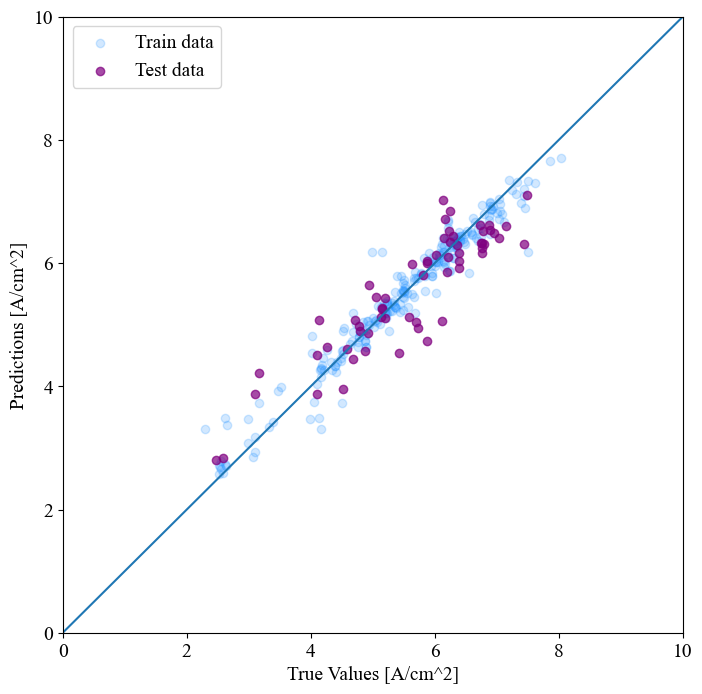

In [51]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及测试集上的表现情况图
test_predictions = BO_xgbt.predict(X_test).flatten()
train_predictions = BO_xgbt.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [52]:
# 保存训练好的模型
dump(BO_xgbt, open('D:\IPython\Corrosion-ML\saved_model\极端梯度提升\贝叶斯优化模型\BOXGBT_6.pkl', 'wb'))

# 岭回归

In [53]:
from sklearn.linear_model import Ridge

# 创建岭回归模型
rr = Ridge()

# 在训练集上拟合模型
rr.fit(X_train, y_train)

Ridge()

In [54]:
print('岭回归初训练模型评价指标展示：')

# 预测测试集
y_pred_test = rr.predict(X_test)

# 预测训练集
y_pred_train = rr.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("测试集上的R^2 Score: ",r2_test)
print("训练集上的R^2 Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

岭回归初训练模型评价指标展示：
测试集上的R^2 Score:  0.5024150937068805
训练集上的R^2 Score:  0.5164549554915974
测试集上的MAE: 0.6482282354960898
训练集上的MAE: 0.650881287192237
测试集上的MSE: 0.6499285355271789
训练集上的MSE: 0.6934847182911644
测试集上的RMSE: 0.8061814532269884
训练集上的RMSE: 0.8327572985517235


<Figure size 800x600 with 0 Axes>

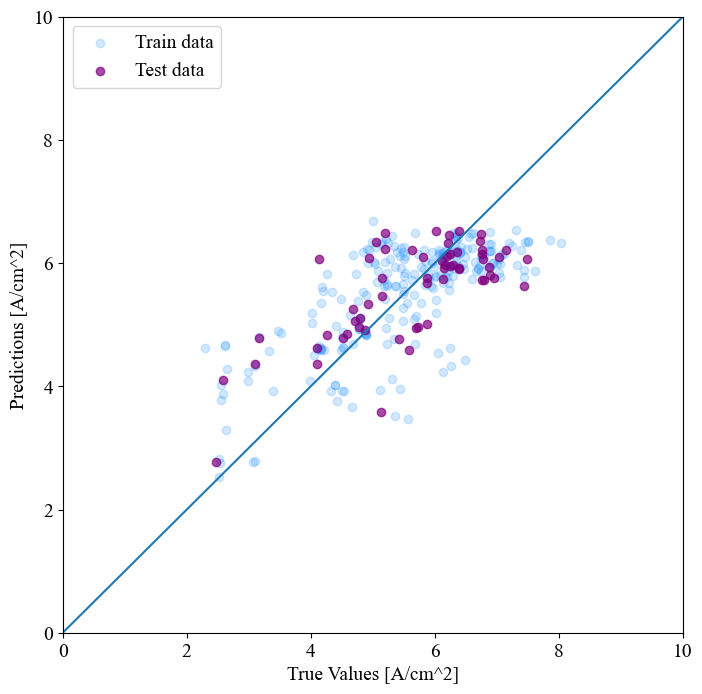

In [55]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及测试集上的表现情况图
test_predictions = rr.predict(X_test).flatten()
train_predictions = rr.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [56]:
# 保存训练好的模型
dump(rr, open('D:\IPython\Corrosion-ML\saved_model\岭回归\初训练模型\RR_6.pkl', 'wb'))

# 贝叶斯优化

In [57]:
import optuna

# 定义岭回归的目标函数
def objective(trial):
    alpha = trial.suggest_float('alpha', 0.01, 10.0, log=True)
    
    # 创建岭回归模型
    BO_rr = Ridge(alpha=alpha, random_state=42)
    
    # 在训练集上拟合模型
    BO_rr.fit(X_train, y_train)
    
    # 在测试集上进行预测
    y_pred = BO_rr.predict(X_test)
    
    # 计算均方误差
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# 运行贝叶斯优化
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# 输出最佳均方误差和最佳超参数
best_params_ridge = study.best_params
print('Best MSE:', study.best_value)
print('Best params for Ridge Regression:', best_params_ridge)

# 使用最佳超参数初始化岭回归模型
BO_rr = Ridge(**best_params_ridge, random_state=42)

# 在训练集上拟合最佳模型
BO_rr.fit(X_train, y_train)

[I 2024-01-03 16:45:05,086] A new study created in memory with name: no-name-84af83d7-9ef6-40bf-95f9-2aa16466bc20
[I 2024-01-03 16:45:05,090] Trial 0 finished with value: 0.649982631665869 and parameters: {'alpha': 0.8107518641497611}. Best is trial 0 with value: 0.649982631665869.
[I 2024-01-03 16:45:05,093] Trial 1 finished with value: 0.6502005042727429 and parameters: {'alpha': 0.09845333629350075}. Best is trial 0 with value: 0.649982631665869.
[I 2024-01-03 16:45:05,097] Trial 2 finished with value: 0.6498314934008492 and parameters: {'alpha': 1.3537138296869105}. Best is trial 2 with value: 0.6498314934008492.
[I 2024-01-03 16:45:05,100] Trial 3 finished with value: 0.6498519522679846 and parameters: {'alpha': 1.277538810031988}. Best is trial 2 with value: 0.6498314934008492.
[I 2024-01-03 16:45:05,103] Trial 4 finished with value: 0.6502226913667865 and parameters: {'alpha': 0.029950705698334985}. Best is trial 2 with value: 0.6498314934008492.
[I 2024-01-03 16:45:05,105] Tria

[I 2024-01-03 16:45:05,382] Trial 44 finished with value: 0.6490796635492047 and parameters: {'alpha': 5.14216513094666}. Best is trial 13 with value: 0.6487123017318123.
[I 2024-01-03 16:45:05,390] Trial 45 finished with value: 0.6495139198702422 and parameters: {'alpha': 2.6700075597198296}. Best is trial 13 with value: 0.6487123017318123.
[I 2024-01-03 16:45:05,398] Trial 46 finished with value: 0.6487128403943581 and parameters: {'alpha': 9.964428759349708}. Best is trial 13 with value: 0.6487123017318123.
[I 2024-01-03 16:45:05,405] Trial 47 finished with value: 0.648852693791592 and parameters: {'alpha': 7.21801248968131}. Best is trial 13 with value: 0.6487123017318123.
[I 2024-01-03 16:45:05,412] Trial 48 finished with value: 0.6493510503311879 and parameters: {'alpha': 3.4737251338907744}. Best is trial 13 with value: 0.6487123017318123.
[I 2024-01-03 16:45:05,419] Trial 49 finished with value: 0.6490755126401508 and parameters: {'alpha': 5.172434760791294}. Best is trial 13 w

[I 2024-01-03 16:45:05,721] Trial 89 finished with value: 0.6488786651863522 and parameters: {'alpha': 6.916976275777635}. Best is trial 13 with value: 0.6487123017318123.
[I 2024-01-03 16:45:05,729] Trial 90 finished with value: 0.6487155528038752 and parameters: {'alpha': 9.843237424112129}. Best is trial 13 with value: 0.6487123017318123.
[I 2024-01-03 16:45:05,737] Trial 91 finished with value: 0.6487124157793346 and parameters: {'alpha': 9.984714257768267}. Best is trial 13 with value: 0.6487123017318123.
[I 2024-01-03 16:45:05,744] Trial 92 finished with value: 0.648779497600178 and parameters: {'alpha': 8.262703003222573}. Best is trial 13 with value: 0.6487123017318123.
[I 2024-01-03 16:45:05,751] Trial 93 finished with value: 0.6487622776449845 and parameters: {'alpha': 8.57996247374138}. Best is trial 13 with value: 0.6487123017318123.
[I 2024-01-03 16:45:05,758] Trial 94 finished with value: 0.6487138300556449 and parameters: {'alpha': 9.918627825027043}. Best is trial 13 wi

[I 2024-01-03 16:45:06,052] Trial 134 finished with value: 0.6488119027056073 and parameters: {'alpha': 7.754241969069464}. Best is trial 131 with value: 0.648712286453068.
[I 2024-01-03 16:45:06,060] Trial 135 finished with value: 0.6487159840939394 and parameters: {'alpha': 9.825125800113218}. Best is trial 131 with value: 0.648712286453068.
[I 2024-01-03 16:45:06,067] Trial 136 finished with value: 0.6487125701815771 and parameters: {'alpha': 9.977291268794616}. Best is trial 131 with value: 0.648712286453068.
[I 2024-01-03 16:45:06,075] Trial 137 finished with value: 0.6487625624144591 and parameters: {'alpha': 8.574353865512935}. Best is trial 131 with value: 0.648712286453068.
[I 2024-01-03 16:45:06,082] Trial 138 finished with value: 0.6501579556437873 and parameters: {'alpha': 0.2317834285020897}. Best is trial 131 with value: 0.648712286453068.
[I 2024-01-03 16:45:06,090] Trial 139 finished with value: 0.6488755750281257 and parameters: {'alpha': 6.9514709022637255}. Best is t

[I 2024-01-03 16:45:06,393] Trial 178 finished with value: 0.6487630758152004 and parameters: {'alpha': 8.564277069298646}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:06,401] Trial 179 finished with value: 0.650212920772135 and parameters: {'alpha': 0.06003258639229204}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:06,409] Trial 180 finished with value: 0.6487154503909787 and parameters: {'alpha': 9.84758034705473}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:06,416] Trial 181 finished with value: 0.6487129883386497 and parameters: {'alpha': 9.957453726096082}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:06,424] Trial 182 finished with value: 0.6487133345336261 and parameters: {'alpha': 9.941311852150404}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:06,432] Trial 183 finished with value: 0.6487945354127834 and parameters: {'alpha': 8.014995978102254}. Best i

[I 2024-01-03 16:45:06,744] Trial 222 finished with value: 0.6487498190642034 and parameters: {'alpha': 8.840496269617747}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:06,752] Trial 223 finished with value: 0.6487121818163275 and parameters: {'alpha': 9.996066799649142}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:06,760] Trial 224 finished with value: 0.65004171302339 and parameters: {'alpha': 0.6100257417232906}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:06,769] Trial 225 finished with value: 0.6487123059920981 and parameters: {'alpha': 9.990025551666655}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:06,777] Trial 226 finished with value: 0.648880149740138 and parameters: {'alpha': 6.900521709348954}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:06,785] Trial 227 finished with value: 0.6487990627270859 and parameters: {'alpha': 7.944674168995039}. Best is 

[I 2024-01-03 16:45:07,113] Trial 266 finished with value: 0.6496114939786471 and parameters: {'alpha': 2.2354497505350412}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:07,122] Trial 267 finished with value: 0.6489913364083776 and parameters: {'alpha': 5.83312467179487}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:07,131] Trial 268 finished with value: 0.6499520944291554 and parameters: {'alpha': 0.9169183030153444}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:07,139] Trial 269 finished with value: 0.6500001405637273 and parameters: {'alpha': 0.7506349974552601}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:07,149] Trial 270 finished with value: 0.6487126780038885 and parameters: {'alpha': 9.972139452487395}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:07,158] Trial 271 finished with value: 0.6488345198249903 and parameters: {'alpha': 7.445807420616504}. Best

[I 2024-01-03 16:45:07,505] Trial 310 finished with value: 0.6488475613797339 and parameters: {'alpha': 7.280763180155369}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:07,514] Trial 311 finished with value: 0.6498248832169617 and parameters: {'alpha': 1.378517058045805}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:07,523] Trial 312 finished with value: 0.6500066264363082 and parameters: {'alpha': 0.7285024822115399}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:07,531] Trial 313 finished with value: 0.6493463791997296 and parameters: {'alpha': 3.4984954949780485}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:07,540] Trial 314 finished with value: 0.6487505290672931 and parameters: {'alpha': 8.82475933012219}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:07,549] Trial 315 finished with value: 0.6496107488048959 and parameters: {'alpha': 2.238655159568876}. Best 

[I 2024-01-03 16:45:07,924] Trial 354 finished with value: 0.6487146406820294 and parameters: {'alpha': 9.882515640914916}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:07,935] Trial 355 finished with value: 0.6487125959301531 and parameters: {'alpha': 9.976058627900153}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:07,943] Trial 356 finished with value: 0.648823139889284 and parameters: {'alpha': 7.597130604952061}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:07,953] Trial 357 finished with value: 0.6487906854267025 and parameters: {'alpha': 8.076248403904435}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:07,962] Trial 358 finished with value: 0.649927473454438 and parameters: {'alpha': 1.0037701236238736}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:07,972] Trial 359 finished with value: 0.6487128247488106 and parameters: {'alpha': 9.965169143299983}. Best is

[I 2024-01-03 16:45:08,350] Trial 398 finished with value: 0.6487574817132853 and parameters: {'alpha': 8.676586878554483}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:08,360] Trial 399 finished with value: 0.6487121634899872 and parameters: {'alpha': 9.996961470934949}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:08,370] Trial 400 finished with value: 0.6488499765767478 and parameters: {'alpha': 7.251087420435869}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:08,380] Trial 401 finished with value: 0.6488037678764539 and parameters: {'alpha': 7.873415402451372}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:08,393] Trial 402 finished with value: 0.6487485867916597 and parameters: {'alpha': 8.86810001587224}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:08,404] Trial 403 finished with value: 0.6502180881622628 and parameters: {'alpha': 0.04410659844880701}. Best 

[I 2024-01-03 16:45:08,813] Trial 442 finished with value: 0.6498031624609228 and parameters: {'alpha': 1.4606917171656795}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:08,824] Trial 443 finished with value: 0.6488214971171236 and parameters: {'alpha': 7.619596376065891}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:08,835] Trial 444 finished with value: 0.6487480961855784 and parameters: {'alpha': 8.879195322926105}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:08,844] Trial 445 finished with value: 0.6487132144053955 and parameters: {'alpha': 9.946884913605153}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:08,855] Trial 446 finished with value: 0.6489838864999586 and parameters: {'alpha': 5.896573340137812}. Best is trial 169 with value: 0.6487121305397309.
[I 2024-01-03 16:45:08,865] Trial 447 finished with value: 0.6487938478023821 and parameters: {'alpha': 8.02583509492257}. Best i

[I 2024-01-03 16:45:09,274] Trial 486 finished with value: 0.6487121997323433 and parameters: {'alpha': 9.99519292974991}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:09,284] Trial 487 finished with value: 0.6488031749930336 and parameters: {'alpha': 7.882296510019553}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:09,295] Trial 488 finished with value: 0.6501839097103294 and parameters: {'alpha': 0.15014331384166843}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:09,305] Trial 489 finished with value: 0.6489352193890146 and parameters: {'alpha': 6.336277701061965}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:09,316] Trial 490 finished with value: 0.6499945750888781 and parameters: {'alpha': 0.7696853976649681}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:09,327] Trial 491 finished with value: 0.6496295154160777 and parameters: {'alpha': 2.1584270124982767}. Bes

[I 2024-01-03 16:45:09,753] Trial 530 finished with value: 0.6501695275871953 and parameters: {'alpha': 0.19526188566405192}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:09,764] Trial 531 finished with value: 0.6490193368391063 and parameters: {'alpha': 5.602530149670108}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:09,775] Trial 532 finished with value: 0.6501838695620915 and parameters: {'alpha': 0.15026884806617571}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:09,785] Trial 533 finished with value: 0.6488063636663381 and parameters: {'alpha': 7.834852712152284}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:09,795] Trial 534 finished with value: 0.649968721187529 and parameters: {'alpha': 0.8589032370983416}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:09,805] Trial 535 finished with value: 0.6487451232937882 and parameters: {'alpha': 8.947779923898743}. Be

[I 2024-01-03 16:45:10,258] Trial 574 finished with value: 0.6488722108409082 and parameters: {'alpha': 6.9894074914009385}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:10,268] Trial 575 finished with value: 0.6487127718260421 and parameters: {'alpha': 9.967677514555152}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:10,283] Trial 576 finished with value: 0.6487536767927443 and parameters: {'alpha': 8.756392765048512}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:10,294] Trial 577 finished with value: 0.6487540077885762 and parameters: {'alpha': 8.749331223925026}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:10,305] Trial 578 finished with value: 0.6497001190546742 and parameters: {'alpha': 1.865453567358826}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:10,316] Trial 579 finished with value: 0.6489804650391522 and parameters: {'alpha': 5.926028146797943}. Best 

[I 2024-01-03 16:45:10,782] Trial 618 finished with value: 0.648712950826205 and parameters: {'alpha': 9.959217869244094}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:10,802] Trial 619 finished with value: 0.6493742542090547 and parameters: {'alpha': 3.352244099815926}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:10,814] Trial 620 finished with value: 0.6501302118116502 and parameters: {'alpha': 0.3201536375570106}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:10,828] Trial 621 finished with value: 0.6487571249801015 and parameters: {'alpha': 8.683945355915307}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:10,844] Trial 622 finished with value: 0.6499519304151693 and parameters: {'alpha': 0.9174931222960435}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:10,860] Trial 623 finished with value: 0.6489262440949485 and parameters: {'alpha': 6.422792790140593}. Best 

[I 2024-01-03 16:45:11,384] Trial 662 finished with value: 0.6487131769922798 and parameters: {'alpha': 9.948626654743366}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:11,397] Trial 663 finished with value: 0.6487990662583252 and parameters: {'alpha': 7.944620007509445}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:11,410] Trial 664 finished with value: 0.6487498871805885 and parameters: {'alpha': 8.838981254149761}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:11,423] Trial 665 finished with value: 0.6487129594026799 and parameters: {'alpha': 9.958814268886943}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:11,436] Trial 666 finished with value: 0.6501594494015206 and parameters: {'alpha': 0.2270580045366081}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:11,449] Trial 667 finished with value: 0.6500955888654724 and parameters: {'alpha': 0.43207926008441644}. Bes

[I 2024-01-03 16:45:11,947] Trial 706 finished with value: 0.6488373577343424 and parameters: {'alpha': 7.409171740019862}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:11,964] Trial 707 finished with value: 0.6502234053365634 and parameters: {'alpha': 0.027757717508210947}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:11,976] Trial 708 finished with value: 0.6491279664258491 and parameters: {'alpha': 4.803137113447613}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:11,990] Trial 709 finished with value: 0.6487620188829041 and parameters: {'alpha': 8.585070895348228}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:12,002] Trial 710 finished with value: 0.6487125528353788 and parameters: {'alpha': 9.978122508322306}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:12,014] Trial 711 finished with value: 0.6501886023000355 and parameters: {'alpha': 0.13548661647126506}. B

[I 2024-01-03 16:45:12,518] Trial 750 finished with value: 0.6488475842440521 and parameters: {'alpha': 7.280481000041371}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:12,531] Trial 751 finished with value: 0.6502165718405166 and parameters: {'alpha': 0.0487760727619698}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:12,543] Trial 752 finished with value: 0.6501949127035286 and parameters: {'alpha': 0.1158265444153311}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:12,558] Trial 753 finished with value: 0.6487125176799737 and parameters: {'alpha': 9.979809253852384}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:12,572] Trial 754 finished with value: 0.6487962487472906 and parameters: {'alpha': 7.988172570491157}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:12,586] Trial 755 finished with value: 0.6502146119643805 and parameters: {'alpha': 0.05481620440101785}. Be

[I 2024-01-03 16:45:13,115] Trial 794 finished with value: 0.648804364927379 and parameters: {'alpha': 7.864499687128628}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:13,128] Trial 795 finished with value: 0.6487131339295251 and parameters: {'alpha': 9.950634998567857}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:13,142] Trial 796 finished with value: 0.6502102974028102 and parameters: {'alpha': 0.06813212227730553}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:13,156] Trial 797 finished with value: 0.6500427885175314 and parameters: {'alpha': 0.6064270146748548}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:13,169] Trial 798 finished with value: 0.6487537221119386 and parameters: {'alpha': 8.75542452591598}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:13,182] Trial 799 finished with value: 0.6502282135587167 and parameters: {'alpha': 0.013007395208023097}. Be

[I 2024-01-03 16:45:13,708] Trial 838 finished with value: 0.6487121594420278 and parameters: {'alpha': 9.997159195332141}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:13,722] Trial 839 finished with value: 0.6499048665417241 and parameters: {'alpha': 1.084534173281541}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:13,737] Trial 840 finished with value: 0.6489620560842438 and parameters: {'alpha': 6.088098810213979}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:13,751] Trial 841 finished with value: 0.649346460894501 and parameters: {'alpha': 3.4980613519096324}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:13,765] Trial 842 finished with value: 0.6487536851791975 and parameters: {'alpha': 8.75621355614741}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:13,779] Trial 843 finished with value: 0.6488084741331527 and parameters: {'alpha': 7.803875406002094}. Best is

[I 2024-01-03 16:45:14,323] Trial 882 finished with value: 0.6489273574907805 and parameters: {'alpha': 6.411957610241024}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:14,339] Trial 883 finished with value: 0.6500863609706252 and parameters: {'alpha': 0.46222614043392973}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:14,354] Trial 884 finished with value: 0.6501547212940119 and parameters: {'alpha': 0.24202641653168758}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:14,368] Trial 885 finished with value: 0.6501737389630392 and parameters: {'alpha': 0.18201920947051148}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:14,382] Trial 886 finished with value: 0.6487999922278116 and parameters: {'alpha': 7.930453662965485}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:14,396] Trial 887 finished with value: 0.6500988547192063 and parameters: {'alpha': 0.42144214925050383}

[I 2024-01-03 16:45:14,951] Trial 926 finished with value: 0.648712483394632 and parameters: {'alpha': 9.981456946251596}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:14,967] Trial 927 finished with value: 0.6487511917855815 and parameters: {'alpha': 8.810178070601387}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:14,982] Trial 928 finished with value: 0.6500763599033703 and parameters: {'alpha': 0.49505191918528735}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:14,995] Trial 929 finished with value: 0.6487123968662681 and parameters: {'alpha': 9.985627252077746}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:15,010] Trial 930 finished with value: 0.6496610121719534 and parameters: {'alpha': 2.0260451975577465}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:15,024] Trial 931 finished with value: 0.6501867434295374 and parameters: {'alpha': 0.14128878070721157}. Be

[I 2024-01-03 16:45:15,598] Trial 970 finished with value: 0.6487122619634179 and parameters: {'alpha': 9.992163438145269}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:15,614] Trial 971 finished with value: 0.6488572338282205 and parameters: {'alpha': 7.163462760148492}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:15,628] Trial 972 finished with value: 0.6502291370793353 and parameters: {'alpha': 0.010177931736873303}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:15,643] Trial 973 finished with value: 0.6497080286288315 and parameters: {'alpha': 1.8334615816711233}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:15,657] Trial 974 finished with value: 0.6487474506143273 and parameters: {'alpha': 8.893889044708079}. Best is trial 455 with value: 0.6487121059305753.
[I 2024-01-03 16:45:15,672] Trial 975 finished with value: 0.64932143080965 and parameters: {'alpha': 3.632656598015166}. Best

Best MSE: 0.6487121059305753
Best params for Ridge Regression: {'alpha': 9.999776658148159}


Ridge(alpha=9.999776658148159, random_state=42)

In [58]:
print('岭回归贝叶斯优化模型评价指标展示：')

# 预测测试集
y_pred_test = BO_rr.predict(X_test)

# 预测训练集
y_pred_train = BO_rr.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("测试集上的R^2 Score: ",r2_test)
print("训练集上的R^2 Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

岭回归贝叶斯优化模型评价指标展示：
测试集上的R^2 Score:  0.5033463914938706
训练集上的R^2 Score:  0.5155929377819527
测试集上的MAE: 0.6512855126243372
训练集上的MAE: 0.6553116127796343
测试集上的MSE: 0.6487121059305753
训练集上的MSE: 0.6947209963077093
测试集上的RMSE: 0.8054266608019475
训练集上的RMSE: 0.8334992479346993


<Figure size 800x600 with 0 Axes>

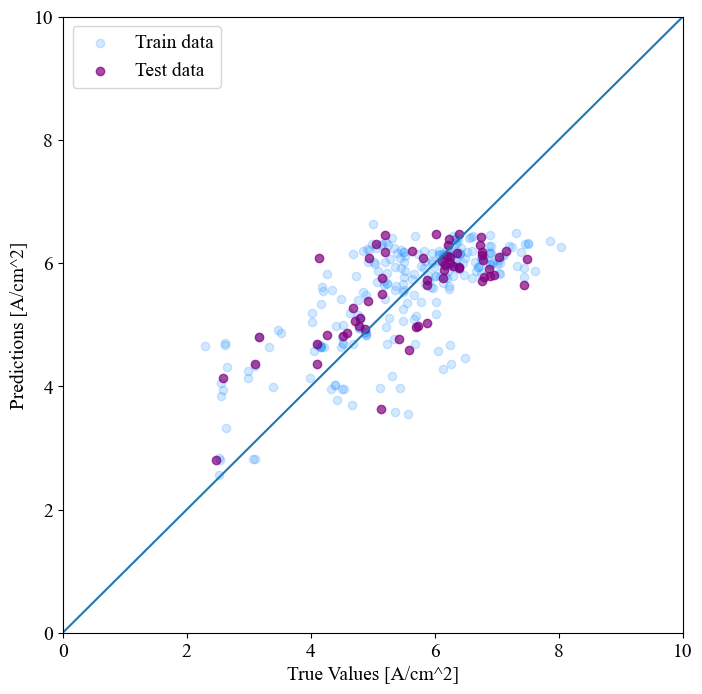

In [59]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及测试集上的表现情况图
test_predictions = BO_rr.predict(X_test).flatten()
train_predictions = BO_rr.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [60]:
# 保存训练好的模型
dump(BO_rr, open('D:\IPython\Corrosion-ML\saved_model\岭回归\贝叶斯优化模型\BORR_6.pkl', 'wb'))

# 深度学习

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from pickle import dump

In [62]:
# 用于搭建神经网络模型的函数
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[17], reg_l2=0.01, dropout=0.2):
    model = keras.Sequential()
    options = {"input_shape": input_shape}
    model.add(keras.Input(shape=(len(X.keys()))))
    for layer in range(n_hidden):
        model.add(layers.Dense(n_neurons, kernel_regularizer=regularizers.l2(reg_l2), 
                 activation='elu'))
        model.add(layers.Dropout(dropout))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [63]:
imodel = build_model(n_hidden=3, n_neurons=50, learning_rate=0.0005, reg_l2=0.0001, dropout=0.2)

MAX_EPOCHS = 10000

# 添加回调函数Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1000)

eshistory = imodel.fit(X_train, y_train, 
                    epochs=MAX_EPOCHS, validation_split = 0.2, verbose=2, 
                    callbacks=[early_stop],
                         batch_size = 5)

Epoch 1/10000


D:\Python\anaconda\envs\tf2x\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


39/39 - 1s - loss: 27.0402 - mae: 4.9684 - mse: 27.0280 - val_loss: 22.4881 - val_mae: 4.5994 - val_mse: 22.4759 - 858ms/epoch - 22ms/step
Epoch 2/10000
39/39 - 0s - loss: 19.6059 - mae: 4.1617 - mse: 19.5936 - val_loss: 15.2130 - val_mae: 3.7434 - val_mse: 15.2007 - 89ms/epoch - 2ms/step
Epoch 3/10000
39/39 - 0s - loss: 12.5656 - mae: 3.2426 - mse: 12.5532 - val_loss: 7.9761 - val_mae: 2.6244 - val_mse: 7.9636 - 90ms/epoch - 2ms/step
Epoch 4/10000
39/39 - 0s - loss: 6.6428 - mae: 2.1623 - mse: 6.6303 - val_loss: 3.1139 - val_mae: 1.4688 - val_mse: 3.1013 - 87ms/epoch - 2ms/step
Epoch 5/10000
39/39 - 0s - loss: 3.6354 - mae: 1.5385 - mse: 3.6227 - val_loss: 1.3997 - val_mae: 0.8893 - val_mse: 1.3870 - 87ms/epoch - 2ms/step
Epoch 6/10000
39/39 - 0s - loss: 3.5630 - mae: 1.4982 - mse: 3.5503 - val_loss: 1.1243 - val_mae: 0.7929 - val_mse: 1.1116 - 105ms/epoch - 3ms/step
Epoch 7/10000
39/39 - 0s - loss: 3.1128 - mae: 1.3715 - mse: 3.1001 - val_loss: 0.9196 - val_mae: 0.7787 - val_mse: 0.9

Epoch 57/10000
39/39 - 0s - loss: 1.0082 - mae: 0.7884 - mse: 0.9962 - val_loss: 0.5584 - val_mae: 0.5591 - val_mse: 0.5463 - 82ms/epoch - 2ms/step
Epoch 58/10000
39/39 - 0s - loss: 1.1294 - mae: 0.8539 - mse: 1.1174 - val_loss: 0.5609 - val_mae: 0.5580 - val_mse: 0.5489 - 90ms/epoch - 2ms/step
Epoch 59/10000
39/39 - 0s - loss: 1.0283 - mae: 0.8030 - mse: 1.0163 - val_loss: 0.5808 - val_mae: 0.5824 - val_mse: 0.5687 - 84ms/epoch - 2ms/step
Epoch 60/10000
39/39 - 0s - loss: 0.9750 - mae: 0.7882 - mse: 0.9629 - val_loss: 0.5970 - val_mae: 0.5850 - val_mse: 0.5849 - 86ms/epoch - 2ms/step
Epoch 61/10000
39/39 - 0s - loss: 1.1192 - mae: 0.8332 - mse: 1.1072 - val_loss: 0.5733 - val_mae: 0.5676 - val_mse: 0.5613 - 84ms/epoch - 2ms/step
Epoch 62/10000
39/39 - 0s - loss: 1.0372 - mae: 0.7931 - mse: 1.0253 - val_loss: 0.5699 - val_mae: 0.5667 - val_mse: 0.5579 - 90ms/epoch - 2ms/step
Epoch 63/10000
39/39 - 0s - loss: 1.1506 - mae: 0.8482 - mse: 1.1386 - val_loss: 0.5534 - val_mae: 0.5540 - val_

Epoch 113/10000
39/39 - 0s - loss: 0.9996 - mae: 0.8145 - mse: 0.9878 - val_loss: 0.5515 - val_mae: 0.5789 - val_mse: 0.5396 - 89ms/epoch - 2ms/step
Epoch 114/10000
39/39 - 0s - loss: 0.8970 - mae: 0.7651 - mse: 0.8852 - val_loss: 0.5355 - val_mae: 0.5644 - val_mse: 0.5237 - 86ms/epoch - 2ms/step
Epoch 115/10000
39/39 - 0s - loss: 0.8458 - mae: 0.7204 - mse: 0.8340 - val_loss: 0.5549 - val_mae: 0.5721 - val_mse: 0.5430 - 84ms/epoch - 2ms/step
Epoch 116/10000
39/39 - 0s - loss: 0.8628 - mae: 0.7417 - mse: 0.8510 - val_loss: 0.5034 - val_mae: 0.5443 - val_mse: 0.4916 - 93ms/epoch - 2ms/step
Epoch 117/10000
39/39 - 0s - loss: 0.8397 - mae: 0.7353 - mse: 0.8279 - val_loss: 0.5023 - val_mae: 0.5265 - val_mse: 0.4905 - 88ms/epoch - 2ms/step
Epoch 118/10000
39/39 - 0s - loss: 0.8999 - mae: 0.7635 - mse: 0.8881 - val_loss: 0.5104 - val_mae: 0.5498 - val_mse: 0.4985 - 85ms/epoch - 2ms/step
Epoch 119/10000
39/39 - 0s - loss: 0.7839 - mae: 0.6897 - mse: 0.7720 - val_loss: 0.5082 - val_mae: 0.5517

Epoch 168/10000
39/39 - 0s - loss: 0.7671 - mae: 0.7179 - mse: 0.7553 - val_loss: 0.4830 - val_mae: 0.5043 - val_mse: 0.4713 - 85ms/epoch - 2ms/step
Epoch 169/10000
39/39 - 0s - loss: 0.8068 - mae: 0.7101 - mse: 0.7951 - val_loss: 0.4625 - val_mae: 0.4961 - val_mse: 0.4508 - 85ms/epoch - 2ms/step
Epoch 170/10000
39/39 - 0s - loss: 0.8773 - mae: 0.7577 - mse: 0.8655 - val_loss: 0.4942 - val_mae: 0.5325 - val_mse: 0.4825 - 96ms/epoch - 2ms/step
Epoch 171/10000
39/39 - 0s - loss: 0.8331 - mae: 0.7301 - mse: 0.8214 - val_loss: 0.4683 - val_mae: 0.5028 - val_mse: 0.4565 - 83ms/epoch - 2ms/step
Epoch 172/10000
39/39 - 0s - loss: 0.6945 - mae: 0.6447 - mse: 0.6828 - val_loss: 0.4502 - val_mae: 0.4974 - val_mse: 0.4384 - 85ms/epoch - 2ms/step
Epoch 173/10000
39/39 - 0s - loss: 0.6749 - mae: 0.6461 - mse: 0.6632 - val_loss: 0.4740 - val_mae: 0.5101 - val_mse: 0.4623 - 85ms/epoch - 2ms/step
Epoch 174/10000
39/39 - 0s - loss: 0.7680 - mae: 0.6790 - mse: 0.7562 - val_loss: 0.4705 - val_mae: 0.5073

Epoch 223/10000
39/39 - 0s - loss: 0.7228 - mae: 0.6629 - mse: 0.7110 - val_loss: 0.4746 - val_mae: 0.5260 - val_mse: 0.4628 - 81ms/epoch - 2ms/step
Epoch 224/10000
39/39 - 0s - loss: 0.6739 - mae: 0.6631 - mse: 0.6621 - val_loss: 0.4785 - val_mae: 0.5306 - val_mse: 0.4667 - 92ms/epoch - 2ms/step
Epoch 225/10000
39/39 - 0s - loss: 0.5968 - mae: 0.6110 - mse: 0.5850 - val_loss: 0.5135 - val_mae: 0.5635 - val_mse: 0.5017 - 82ms/epoch - 2ms/step
Epoch 226/10000
39/39 - 0s - loss: 0.6367 - mae: 0.6289 - mse: 0.6250 - val_loss: 0.4762 - val_mae: 0.5231 - val_mse: 0.4644 - 84ms/epoch - 2ms/step
Epoch 227/10000
39/39 - 0s - loss: 0.6884 - mae: 0.6822 - mse: 0.6767 - val_loss: 0.4721 - val_mae: 0.5311 - val_mse: 0.4604 - 89ms/epoch - 2ms/step
Epoch 228/10000
39/39 - 0s - loss: 0.7246 - mae: 0.6763 - mse: 0.7129 - val_loss: 0.5019 - val_mae: 0.5495 - val_mse: 0.4902 - 84ms/epoch - 2ms/step
Epoch 229/10000
39/39 - 0s - loss: 0.6719 - mae: 0.6578 - mse: 0.6602 - val_loss: 0.5083 - val_mae: 0.5627

Epoch 278/10000
39/39 - 0s - loss: 0.7376 - mae: 0.6856 - mse: 0.7259 - val_loss: 0.4400 - val_mae: 0.4986 - val_mse: 0.4282 - 84ms/epoch - 2ms/step
Epoch 279/10000
39/39 - 0s - loss: 0.5927 - mae: 0.6002 - mse: 0.5809 - val_loss: 0.4698 - val_mae: 0.5345 - val_mse: 0.4581 - 87ms/epoch - 2ms/step
Epoch 280/10000
39/39 - 0s - loss: 0.6173 - mae: 0.6060 - mse: 0.6055 - val_loss: 0.4301 - val_mae: 0.5038 - val_mse: 0.4184 - 86ms/epoch - 2ms/step
Epoch 281/10000
39/39 - 0s - loss: 0.6153 - mae: 0.6310 - mse: 0.6035 - val_loss: 0.4599 - val_mae: 0.5294 - val_mse: 0.4481 - 86ms/epoch - 2ms/step
Epoch 282/10000
39/39 - 0s - loss: 0.6791 - mae: 0.6539 - mse: 0.6673 - val_loss: 0.4948 - val_mae: 0.5584 - val_mse: 0.4830 - 83ms/epoch - 2ms/step
Epoch 283/10000
39/39 - 0s - loss: 0.6360 - mae: 0.6351 - mse: 0.6243 - val_loss: 0.5802 - val_mae: 0.6285 - val_mse: 0.5684 - 105ms/epoch - 3ms/step
Epoch 284/10000
39/39 - 0s - loss: 0.7220 - mae: 0.6775 - mse: 0.7102 - val_loss: 0.5104 - val_mae: 0.556

Epoch 333/10000
39/39 - 0s - loss: 0.5110 - mae: 0.5707 - mse: 0.4992 - val_loss: 0.4617 - val_mae: 0.5116 - val_mse: 0.4499 - 107ms/epoch - 3ms/step
Epoch 334/10000
39/39 - 0s - loss: 0.6178 - mae: 0.6098 - mse: 0.6061 - val_loss: 0.4427 - val_mae: 0.4891 - val_mse: 0.4309 - 80ms/epoch - 2ms/step
Epoch 335/10000
39/39 - 0s - loss: 0.5602 - mae: 0.5946 - mse: 0.5484 - val_loss: 0.4354 - val_mae: 0.4803 - val_mse: 0.4236 - 95ms/epoch - 2ms/step
Epoch 336/10000
39/39 - 0s - loss: 0.6001 - mae: 0.6133 - mse: 0.5883 - val_loss: 0.4370 - val_mae: 0.4898 - val_mse: 0.4252 - 83ms/epoch - 2ms/step
Epoch 337/10000
39/39 - 0s - loss: 0.5951 - mae: 0.5903 - mse: 0.5833 - val_loss: 0.4489 - val_mae: 0.5006 - val_mse: 0.4371 - 85ms/epoch - 2ms/step
Epoch 338/10000
39/39 - 0s - loss: 0.5656 - mae: 0.5970 - mse: 0.5538 - val_loss: 0.4257 - val_mae: 0.4755 - val_mse: 0.4139 - 99ms/epoch - 3ms/step
Epoch 339/10000
39/39 - 0s - loss: 0.6205 - mae: 0.6262 - mse: 0.6086 - val_loss: 0.4285 - val_mae: 0.496

Epoch 388/10000
39/39 - 0s - loss: 0.6020 - mae: 0.6091 - mse: 0.5901 - val_loss: 0.4602 - val_mae: 0.5299 - val_mse: 0.4483 - 82ms/epoch - 2ms/step
Epoch 389/10000
39/39 - 0s - loss: 0.5493 - mae: 0.5669 - mse: 0.5374 - val_loss: 0.4352 - val_mae: 0.5063 - val_mse: 0.4233 - 88ms/epoch - 2ms/step
Epoch 390/10000
39/39 - 0s - loss: 0.5871 - mae: 0.5899 - mse: 0.5751 - val_loss: 0.4610 - val_mae: 0.5274 - val_mse: 0.4491 - 84ms/epoch - 2ms/step
Epoch 391/10000
39/39 - 0s - loss: 0.5663 - mae: 0.5986 - mse: 0.5544 - val_loss: 0.4691 - val_mae: 0.5362 - val_mse: 0.4572 - 82ms/epoch - 2ms/step
Epoch 392/10000
39/39 - 0s - loss: 0.5684 - mae: 0.5962 - mse: 0.5565 - val_loss: 0.4455 - val_mae: 0.5093 - val_mse: 0.4336 - 89ms/epoch - 2ms/step
Epoch 393/10000
39/39 - 0s - loss: 0.5765 - mae: 0.5998 - mse: 0.5646 - val_loss: 0.4451 - val_mae: 0.5089 - val_mse: 0.4332 - 86ms/epoch - 2ms/step
Epoch 394/10000
39/39 - 0s - loss: 0.5215 - mae: 0.5621 - mse: 0.5096 - val_loss: 0.4378 - val_mae: 0.4962

Epoch 443/10000
39/39 - 0s - loss: 0.5523 - mae: 0.5828 - mse: 0.5403 - val_loss: 0.4571 - val_mae: 0.5063 - val_mse: 0.4451 - 92ms/epoch - 2ms/step
Epoch 444/10000
39/39 - 0s - loss: 0.5698 - mae: 0.5685 - mse: 0.5578 - val_loss: 0.4195 - val_mae: 0.4969 - val_mse: 0.4075 - 80ms/epoch - 2ms/step
Epoch 445/10000
39/39 - 0s - loss: 0.6014 - mae: 0.6196 - mse: 0.5894 - val_loss: 0.4787 - val_mae: 0.5377 - val_mse: 0.4667 - 81ms/epoch - 2ms/step
Epoch 446/10000
39/39 - 0s - loss: 0.5264 - mae: 0.5673 - mse: 0.5143 - val_loss: 0.4261 - val_mae: 0.4952 - val_mse: 0.4140 - 82ms/epoch - 2ms/step
Epoch 447/10000
39/39 - 0s - loss: 0.5528 - mae: 0.5946 - mse: 0.5407 - val_loss: 0.4225 - val_mae: 0.4823 - val_mse: 0.4105 - 86ms/epoch - 2ms/step
Epoch 448/10000
39/39 - 0s - loss: 0.5384 - mae: 0.5866 - mse: 0.5264 - val_loss: 0.4332 - val_mae: 0.5020 - val_mse: 0.4211 - 87ms/epoch - 2ms/step
Epoch 449/10000
39/39 - 0s - loss: 0.5800 - mae: 0.6086 - mse: 0.5679 - val_loss: 0.4370 - val_mae: 0.5139

Epoch 498/10000
39/39 - 0s - loss: 0.5824 - mae: 0.5996 - mse: 0.5702 - val_loss: 0.4476 - val_mae: 0.5319 - val_mse: 0.4354 - 86ms/epoch - 2ms/step
Epoch 499/10000
39/39 - 0s - loss: 0.5170 - mae: 0.5589 - mse: 0.5048 - val_loss: 0.4490 - val_mae: 0.5219 - val_mse: 0.4368 - 88ms/epoch - 2ms/step
Epoch 500/10000
39/39 - 0s - loss: 0.4827 - mae: 0.5231 - mse: 0.4705 - val_loss: 0.4297 - val_mae: 0.5023 - val_mse: 0.4175 - 90ms/epoch - 2ms/step
Epoch 501/10000
39/39 - 0s - loss: 0.4821 - mae: 0.5561 - mse: 0.4699 - val_loss: 0.4125 - val_mae: 0.4805 - val_mse: 0.4003 - 87ms/epoch - 2ms/step
Epoch 502/10000
39/39 - 0s - loss: 0.5828 - mae: 0.5994 - mse: 0.5706 - val_loss: 0.4282 - val_mae: 0.5014 - val_mse: 0.4160 - 87ms/epoch - 2ms/step
Epoch 503/10000
39/39 - 0s - loss: 0.5206 - mae: 0.5590 - mse: 0.5083 - val_loss: 0.4412 - val_mae: 0.5213 - val_mse: 0.4290 - 86ms/epoch - 2ms/step
Epoch 504/10000
39/39 - 0s - loss: 0.4688 - mae: 0.5339 - mse: 0.4565 - val_loss: 0.4293 - val_mae: 0.5036

Epoch 553/10000
39/39 - 0s - loss: 0.4375 - mae: 0.5224 - mse: 0.4250 - val_loss: 0.4314 - val_mae: 0.5207 - val_mse: 0.4189 - 84ms/epoch - 2ms/step
Epoch 554/10000
39/39 - 0s - loss: 0.5049 - mae: 0.5568 - mse: 0.4924 - val_loss: 0.4262 - val_mae: 0.4893 - val_mse: 0.4138 - 89ms/epoch - 2ms/step
Epoch 555/10000
39/39 - 0s - loss: 0.4870 - mae: 0.5485 - mse: 0.4745 - val_loss: 0.4237 - val_mae: 0.4906 - val_mse: 0.4112 - 87ms/epoch - 2ms/step
Epoch 556/10000
39/39 - 0s - loss: 0.4794 - mae: 0.5363 - mse: 0.4670 - val_loss: 0.4076 - val_mae: 0.4745 - val_mse: 0.3951 - 86ms/epoch - 2ms/step
Epoch 557/10000
39/39 - 0s - loss: 0.5248 - mae: 0.5569 - mse: 0.5123 - val_loss: 0.3934 - val_mae: 0.4722 - val_mse: 0.3810 - 91ms/epoch - 2ms/step
Epoch 558/10000
39/39 - 0s - loss: 0.4602 - mae: 0.5279 - mse: 0.4477 - val_loss: 0.4536 - val_mae: 0.5337 - val_mse: 0.4411 - 92ms/epoch - 2ms/step
Epoch 559/10000
39/39 - 0s - loss: 0.4792 - mae: 0.5399 - mse: 0.4667 - val_loss: 0.4048 - val_mae: 0.4736

Epoch 608/10000
39/39 - 0s - loss: 0.4816 - mae: 0.5375 - mse: 0.4689 - val_loss: 0.4054 - val_mae: 0.4777 - val_mse: 0.3927 - 95ms/epoch - 2ms/step
Epoch 609/10000
39/39 - 0s - loss: 0.4756 - mae: 0.5347 - mse: 0.4629 - val_loss: 0.4071 - val_mae: 0.4745 - val_mse: 0.3944 - 84ms/epoch - 2ms/step
Epoch 610/10000
39/39 - 0s - loss: 0.4576 - mae: 0.5355 - mse: 0.4449 - val_loss: 0.4223 - val_mae: 0.4978 - val_mse: 0.4096 - 86ms/epoch - 2ms/step
Epoch 611/10000
39/39 - 0s - loss: 0.4247 - mae: 0.5294 - mse: 0.4121 - val_loss: 0.3879 - val_mae: 0.4614 - val_mse: 0.3752 - 94ms/epoch - 2ms/step
Epoch 612/10000
39/39 - 0s - loss: 0.5095 - mae: 0.5427 - mse: 0.4968 - val_loss: 0.3933 - val_mae: 0.4485 - val_mse: 0.3806 - 83ms/epoch - 2ms/step
Epoch 613/10000
39/39 - 0s - loss: 0.4576 - mae: 0.5243 - mse: 0.4449 - val_loss: 0.4419 - val_mae: 0.4897 - val_mse: 0.4292 - 88ms/epoch - 2ms/step
Epoch 614/10000
39/39 - 0s - loss: 0.5083 - mae: 0.5485 - mse: 0.4956 - val_loss: 0.3940 - val_mae: 0.4548

Epoch 663/10000
39/39 - 0s - loss: 0.4937 - mae: 0.5482 - mse: 0.4808 - val_loss: 0.3984 - val_mae: 0.4659 - val_mse: 0.3854 - 85ms/epoch - 2ms/step
Epoch 664/10000
39/39 - 0s - loss: 0.5271 - mae: 0.5598 - mse: 0.5142 - val_loss: 0.4255 - val_mae: 0.5032 - val_mse: 0.4125 - 89ms/epoch - 2ms/step
Epoch 665/10000
39/39 - 0s - loss: 0.4520 - mae: 0.5112 - mse: 0.4391 - val_loss: 0.4377 - val_mae: 0.5127 - val_mse: 0.4248 - 92ms/epoch - 2ms/step
Epoch 666/10000
39/39 - 0s - loss: 0.4361 - mae: 0.5251 - mse: 0.4232 - val_loss: 0.4265 - val_mae: 0.4927 - val_mse: 0.4135 - 88ms/epoch - 2ms/step
Epoch 667/10000
39/39 - 0s - loss: 0.4570 - mae: 0.5335 - mse: 0.4441 - val_loss: 0.3891 - val_mae: 0.4685 - val_mse: 0.3762 - 84ms/epoch - 2ms/step
Epoch 668/10000
39/39 - 0s - loss: 0.4544 - mae: 0.5295 - mse: 0.4415 - val_loss: 0.3739 - val_mae: 0.4497 - val_mse: 0.3610 - 92ms/epoch - 2ms/step
Epoch 669/10000
39/39 - 0s - loss: 0.4482 - mae: 0.5053 - mse: 0.4353 - val_loss: 0.4452 - val_mae: 0.5290

Epoch 718/10000
39/39 - 0s - loss: 0.4497 - mae: 0.5296 - mse: 0.4365 - val_loss: 0.4308 - val_mae: 0.5093 - val_mse: 0.4177 - 84ms/epoch - 2ms/step
Epoch 719/10000
39/39 - 0s - loss: 0.4423 - mae: 0.5067 - mse: 0.4291 - val_loss: 0.4468 - val_mae: 0.5104 - val_mse: 0.4336 - 97ms/epoch - 2ms/step
Epoch 720/10000
39/39 - 0s - loss: 0.4749 - mae: 0.5421 - mse: 0.4618 - val_loss: 0.4079 - val_mae: 0.4811 - val_mse: 0.3948 - 82ms/epoch - 2ms/step
Epoch 721/10000
39/39 - 0s - loss: 0.4281 - mae: 0.5151 - mse: 0.4150 - val_loss: 0.3924 - val_mae: 0.4709 - val_mse: 0.3793 - 83ms/epoch - 2ms/step
Epoch 722/10000
39/39 - 0s - loss: 0.4452 - mae: 0.5105 - mse: 0.4321 - val_loss: 0.4278 - val_mae: 0.5101 - val_mse: 0.4147 - 93ms/epoch - 2ms/step
Epoch 723/10000
39/39 - 0s - loss: 0.4362 - mae: 0.5247 - mse: 0.4231 - val_loss: 0.4408 - val_mae: 0.5150 - val_mse: 0.4277 - 85ms/epoch - 2ms/step
Epoch 724/10000
39/39 - 0s - loss: 0.4761 - mae: 0.5575 - mse: 0.4630 - val_loss: 0.4099 - val_mae: 0.4774

Epoch 773/10000
39/39 - 0s - loss: 0.3826 - mae: 0.4636 - mse: 0.3692 - val_loss: 0.4217 - val_mae: 0.4617 - val_mse: 0.4084 - 93ms/epoch - 2ms/step
Epoch 774/10000
39/39 - 0s - loss: 0.4716 - mae: 0.5468 - mse: 0.4582 - val_loss: 0.4079 - val_mae: 0.4492 - val_mse: 0.3945 - 85ms/epoch - 2ms/step
Epoch 775/10000
39/39 - 0s - loss: 0.4027 - mae: 0.4771 - mse: 0.3893 - val_loss: 0.4354 - val_mae: 0.5132 - val_mse: 0.4220 - 85ms/epoch - 2ms/step
Epoch 776/10000
39/39 - 0s - loss: 0.4514 - mae: 0.5199 - mse: 0.4380 - val_loss: 0.4349 - val_mae: 0.4991 - val_mse: 0.4215 - 102ms/epoch - 3ms/step
Epoch 777/10000
39/39 - 0s - loss: 0.4181 - mae: 0.5107 - mse: 0.4047 - val_loss: 0.4239 - val_mae: 0.4816 - val_mse: 0.4105 - 89ms/epoch - 2ms/step
Epoch 778/10000
39/39 - 0s - loss: 0.4714 - mae: 0.5421 - mse: 0.4580 - val_loss: 0.4430 - val_mae: 0.4947 - val_mse: 0.4296 - 83ms/epoch - 2ms/step
Epoch 779/10000
39/39 - 0s - loss: 0.4902 - mae: 0.5238 - mse: 0.4768 - val_loss: 0.4736 - val_mae: 0.539

Epoch 828/10000
39/39 - 0s - loss: 0.4410 - mae: 0.5085 - mse: 0.4273 - val_loss: 0.4067 - val_mae: 0.4910 - val_mse: 0.3931 - 82ms/epoch - 2ms/step
Epoch 829/10000
39/39 - 0s - loss: 0.3872 - mae: 0.4855 - mse: 0.3735 - val_loss: 0.4209 - val_mae: 0.5003 - val_mse: 0.4072 - 86ms/epoch - 2ms/step
Epoch 830/10000
39/39 - 0s - loss: 0.3501 - mae: 0.4643 - mse: 0.3364 - val_loss: 0.4389 - val_mae: 0.5181 - val_mse: 0.4252 - 94ms/epoch - 2ms/step
Epoch 831/10000
39/39 - 0s - loss: 0.4483 - mae: 0.5210 - mse: 0.4346 - val_loss: 0.3964 - val_mae: 0.4675 - val_mse: 0.3827 - 83ms/epoch - 2ms/step
Epoch 832/10000
39/39 - 0s - loss: 0.3936 - mae: 0.4980 - mse: 0.3799 - val_loss: 0.3939 - val_mae: 0.4610 - val_mse: 0.3802 - 84ms/epoch - 2ms/step
Epoch 833/10000
39/39 - 0s - loss: 0.5013 - mae: 0.5541 - mse: 0.4876 - val_loss: 0.4262 - val_mae: 0.4854 - val_mse: 0.4124 - 90ms/epoch - 2ms/step
Epoch 834/10000
39/39 - 0s - loss: 0.4384 - mae: 0.5042 - mse: 0.4247 - val_loss: 0.3789 - val_mae: 0.4393

Epoch 883/10000
39/39 - 0s - loss: 0.3911 - mae: 0.4986 - mse: 0.3772 - val_loss: 0.3893 - val_mae: 0.4462 - val_mse: 0.3754 - 85ms/epoch - 2ms/step
Epoch 884/10000
39/39 - 0s - loss: 0.4611 - mae: 0.5149 - mse: 0.4471 - val_loss: 0.3745 - val_mae: 0.4323 - val_mse: 0.3605 - 92ms/epoch - 2ms/step
Epoch 885/10000
39/39 - 0s - loss: 0.4356 - mae: 0.5081 - mse: 0.4216 - val_loss: 0.4064 - val_mae: 0.4769 - val_mse: 0.3924 - 86ms/epoch - 2ms/step
Epoch 886/10000
39/39 - 0s - loss: 0.4745 - mae: 0.5525 - mse: 0.4605 - val_loss: 0.3846 - val_mae: 0.4511 - val_mse: 0.3706 - 85ms/epoch - 2ms/step
Epoch 887/10000
39/39 - 0s - loss: 0.3810 - mae: 0.4765 - mse: 0.3670 - val_loss: 0.4239 - val_mae: 0.4924 - val_mse: 0.4099 - 86ms/epoch - 2ms/step
Epoch 888/10000
39/39 - 0s - loss: 0.4684 - mae: 0.5405 - mse: 0.4544 - val_loss: 0.3962 - val_mae: 0.4699 - val_mse: 0.3823 - 86ms/epoch - 2ms/step
Epoch 889/10000
39/39 - 0s - loss: 0.4041 - mae: 0.4944 - mse: 0.3901 - val_loss: 0.3500 - val_mae: 0.4183

Epoch 938/10000
39/39 - 0s - loss: 0.3928 - mae: 0.5014 - mse: 0.3784 - val_loss: 0.3982 - val_mae: 0.4565 - val_mse: 0.3839 - 105ms/epoch - 3ms/step
Epoch 939/10000
39/39 - 0s - loss: 0.4212 - mae: 0.5066 - mse: 0.4068 - val_loss: 0.3847 - val_mae: 0.4434 - val_mse: 0.3704 - 99ms/epoch - 3ms/step
Epoch 940/10000
39/39 - 0s - loss: 0.4217 - mae: 0.4872 - mse: 0.4074 - val_loss: 0.3834 - val_mae: 0.4448 - val_mse: 0.3690 - 114ms/epoch - 3ms/step
Epoch 941/10000
39/39 - 0s - loss: 0.4071 - mae: 0.4966 - mse: 0.3927 - val_loss: 0.3821 - val_mae: 0.4448 - val_mse: 0.3677 - 102ms/epoch - 3ms/step
Epoch 942/10000
39/39 - 0s - loss: 0.3843 - mae: 0.4823 - mse: 0.3699 - val_loss: 0.3854 - val_mae: 0.4494 - val_mse: 0.3710 - 87ms/epoch - 2ms/step
Epoch 943/10000
39/39 - 0s - loss: 0.4421 - mae: 0.5263 - mse: 0.4277 - val_loss: 0.3863 - val_mae: 0.4593 - val_mse: 0.3719 - 91ms/epoch - 2ms/step
Epoch 944/10000
39/39 - 0s - loss: 0.3985 - mae: 0.4998 - mse: 0.3841 - val_loss: 0.3744 - val_mae: 0.4

Epoch 993/10000
39/39 - 0s - loss: 0.4225 - mae: 0.4875 - mse: 0.4079 - val_loss: 0.4011 - val_mae: 0.4741 - val_mse: 0.3865 - 89ms/epoch - 2ms/step
Epoch 994/10000
39/39 - 0s - loss: 0.3836 - mae: 0.4880 - mse: 0.3691 - val_loss: 0.4404 - val_mae: 0.4954 - val_mse: 0.4258 - 82ms/epoch - 2ms/step
Epoch 995/10000
39/39 - 0s - loss: 0.4343 - mae: 0.5131 - mse: 0.4197 - val_loss: 0.4192 - val_mae: 0.4788 - val_mse: 0.4046 - 84ms/epoch - 2ms/step
Epoch 996/10000
39/39 - 0s - loss: 0.4215 - mae: 0.4964 - mse: 0.4069 - val_loss: 0.3843 - val_mae: 0.4510 - val_mse: 0.3697 - 86ms/epoch - 2ms/step
Epoch 997/10000
39/39 - 0s - loss: 0.3848 - mae: 0.4738 - mse: 0.3702 - val_loss: 0.4443 - val_mae: 0.5058 - val_mse: 0.4297 - 90ms/epoch - 2ms/step
Epoch 998/10000
39/39 - 0s - loss: 0.3787 - mae: 0.4783 - mse: 0.3640 - val_loss: 0.4227 - val_mae: 0.4836 - val_mse: 0.4080 - 84ms/epoch - 2ms/step
Epoch 999/10000
39/39 - 0s - loss: 0.3721 - mae: 0.4694 - mse: 0.3574 - val_loss: 0.3925 - val_mae: 0.4579

Epoch 1048/10000
39/39 - 0s - loss: 0.4335 - mae: 0.5278 - mse: 0.4185 - val_loss: 0.3998 - val_mae: 0.4630 - val_mse: 0.3848 - 85ms/epoch - 2ms/step
Epoch 1049/10000
39/39 - 0s - loss: 0.4069 - mae: 0.4993 - mse: 0.3919 - val_loss: 0.4094 - val_mae: 0.4623 - val_mse: 0.3945 - 86ms/epoch - 2ms/step
Epoch 1050/10000
39/39 - 0s - loss: 0.4378 - mae: 0.5004 - mse: 0.4228 - val_loss: 0.4225 - val_mae: 0.4827 - val_mse: 0.4075 - 83ms/epoch - 2ms/step
Epoch 1051/10000
39/39 - 0s - loss: 0.3655 - mae: 0.4683 - mse: 0.3505 - val_loss: 0.4093 - val_mae: 0.4682 - val_mse: 0.3943 - 96ms/epoch - 2ms/step
Epoch 1052/10000
39/39 - 0s - loss: 0.3811 - mae: 0.4835 - mse: 0.3661 - val_loss: 0.4298 - val_mae: 0.5047 - val_mse: 0.4148 - 81ms/epoch - 2ms/step
Epoch 1053/10000
39/39 - 0s - loss: 0.3668 - mae: 0.4713 - mse: 0.3518 - val_loss: 0.3964 - val_mae: 0.4779 - val_mse: 0.3814 - 107ms/epoch - 3ms/step
Epoch 1054/10000
39/39 - 0s - loss: 0.3891 - mae: 0.4865 - mse: 0.3741 - val_loss: 0.3837 - val_mae

Epoch 1103/10000
39/39 - 0s - loss: 0.3738 - mae: 0.4652 - mse: 0.3587 - val_loss: 0.4351 - val_mae: 0.5001 - val_mse: 0.4200 - 124ms/epoch - 3ms/step
Epoch 1104/10000
39/39 - 0s - loss: 0.3941 - mae: 0.4553 - mse: 0.3789 - val_loss: 0.3909 - val_mae: 0.4451 - val_mse: 0.3757 - 106ms/epoch - 3ms/step
Epoch 1105/10000
39/39 - 0s - loss: 0.4353 - mae: 0.4998 - mse: 0.4202 - val_loss: 0.3688 - val_mae: 0.4391 - val_mse: 0.3537 - 113ms/epoch - 3ms/step
Epoch 1106/10000
39/39 - 0s - loss: 0.3952 - mae: 0.4954 - mse: 0.3801 - val_loss: 0.3969 - val_mae: 0.4690 - val_mse: 0.3817 - 116ms/epoch - 3ms/step
Epoch 1107/10000
39/39 - 0s - loss: 0.3997 - mae: 0.4898 - mse: 0.3845 - val_loss: 0.3829 - val_mae: 0.4417 - val_mse: 0.3677 - 118ms/epoch - 3ms/step
Epoch 1108/10000
39/39 - 0s - loss: 0.4163 - mae: 0.5015 - mse: 0.4012 - val_loss: 0.3734 - val_mae: 0.4544 - val_mse: 0.3582 - 121ms/epoch - 3ms/step
Epoch 1109/10000
39/39 - 0s - loss: 0.3747 - mae: 0.4743 - mse: 0.3595 - val_loss: 0.3464 - va

Epoch 1158/10000
39/39 - 0s - loss: 0.3786 - mae: 0.4702 - mse: 0.3631 - val_loss: 0.4091 - val_mae: 0.4648 - val_mse: 0.3935 - 106ms/epoch - 3ms/step
Epoch 1159/10000
39/39 - 0s - loss: 0.3239 - mae: 0.4403 - mse: 0.3083 - val_loss: 0.3867 - val_mae: 0.4463 - val_mse: 0.3711 - 106ms/epoch - 3ms/step
Epoch 1160/10000
39/39 - 0s - loss: 0.3457 - mae: 0.4561 - mse: 0.3301 - val_loss: 0.3979 - val_mae: 0.4481 - val_mse: 0.3823 - 108ms/epoch - 3ms/step
Epoch 1161/10000
39/39 - 0s - loss: 0.3877 - mae: 0.4705 - mse: 0.3722 - val_loss: 0.3604 - val_mae: 0.4146 - val_mse: 0.3448 - 100ms/epoch - 3ms/step
Epoch 1162/10000
39/39 - 0s - loss: 0.3853 - mae: 0.4881 - mse: 0.3697 - val_loss: 0.3693 - val_mae: 0.4375 - val_mse: 0.3538 - 97ms/epoch - 2ms/step
Epoch 1163/10000
39/39 - 0s - loss: 0.3180 - mae: 0.4300 - mse: 0.3024 - val_loss: 0.3658 - val_mae: 0.4240 - val_mse: 0.3503 - 99ms/epoch - 3ms/step
Epoch 1164/10000
39/39 - 0s - loss: 0.4158 - mae: 0.5098 - mse: 0.4002 - val_loss: 0.3721 - val_

Epoch 1213/10000
39/39 - 0s - loss: 0.3302 - mae: 0.4414 - mse: 0.3142 - val_loss: 0.3941 - val_mae: 0.4577 - val_mse: 0.3782 - 99ms/epoch - 3ms/step
Epoch 1214/10000
39/39 - 0s - loss: 0.3866 - mae: 0.4822 - mse: 0.3707 - val_loss: 0.3759 - val_mae: 0.4444 - val_mse: 0.3599 - 99ms/epoch - 3ms/step
Epoch 1215/10000
39/39 - 0s - loss: 0.3601 - mae: 0.4567 - mse: 0.3442 - val_loss: 0.3553 - val_mae: 0.4294 - val_mse: 0.3393 - 95ms/epoch - 2ms/step
Epoch 1216/10000
39/39 - 0s - loss: 0.3532 - mae: 0.4625 - mse: 0.3373 - val_loss: 0.3572 - val_mae: 0.4358 - val_mse: 0.3413 - 112ms/epoch - 3ms/step
Epoch 1217/10000
39/39 - 0s - loss: 0.3525 - mae: 0.4399 - mse: 0.3366 - val_loss: 0.3951 - val_mae: 0.4734 - val_mse: 0.3792 - 107ms/epoch - 3ms/step
Epoch 1218/10000
39/39 - 0s - loss: 0.3064 - mae: 0.4257 - mse: 0.2904 - val_loss: 0.3544 - val_mae: 0.4205 - val_mse: 0.3384 - 102ms/epoch - 3ms/step
Epoch 1219/10000
39/39 - 0s - loss: 0.3465 - mae: 0.4438 - mse: 0.3306 - val_loss: 0.3622 - val_m

Epoch 1268/10000
39/39 - 0s - loss: 0.3778 - mae: 0.4719 - mse: 0.3616 - val_loss: 0.3678 - val_mae: 0.4226 - val_mse: 0.3516 - 98ms/epoch - 3ms/step
Epoch 1269/10000
39/39 - 0s - loss: 0.3348 - mae: 0.4489 - mse: 0.3186 - val_loss: 0.4157 - val_mae: 0.4826 - val_mse: 0.3995 - 89ms/epoch - 2ms/step
Epoch 1270/10000
39/39 - 0s - loss: 0.3331 - mae: 0.4440 - mse: 0.3169 - val_loss: 0.3769 - val_mae: 0.4306 - val_mse: 0.3607 - 104ms/epoch - 3ms/step
Epoch 1271/10000
39/39 - 0s - loss: 0.3598 - mae: 0.4553 - mse: 0.3435 - val_loss: 0.3935 - val_mae: 0.4544 - val_mse: 0.3772 - 105ms/epoch - 3ms/step
Epoch 1272/10000
39/39 - 0s - loss: 0.3145 - mae: 0.4244 - mse: 0.2982 - val_loss: 0.3629 - val_mae: 0.4255 - val_mse: 0.3466 - 105ms/epoch - 3ms/step
Epoch 1273/10000
39/39 - 0s - loss: 0.3888 - mae: 0.4825 - mse: 0.3725 - val_loss: 0.3964 - val_mae: 0.4561 - val_mse: 0.3801 - 109ms/epoch - 3ms/step
Epoch 1274/10000
39/39 - 0s - loss: 0.3464 - mae: 0.4570 - mse: 0.3300 - val_loss: 0.3958 - val_

Epoch 1323/10000
39/39 - 0s - loss: 0.3807 - mae: 0.4734 - mse: 0.3640 - val_loss: 0.3380 - val_mae: 0.4055 - val_mse: 0.3213 - 104ms/epoch - 3ms/step
Epoch 1324/10000
39/39 - 0s - loss: 0.3234 - mae: 0.4267 - mse: 0.3067 - val_loss: 0.3537 - val_mae: 0.4200 - val_mse: 0.3370 - 109ms/epoch - 3ms/step
Epoch 1325/10000
39/39 - 0s - loss: 0.2785 - mae: 0.3936 - mse: 0.2618 - val_loss: 0.3582 - val_mae: 0.4294 - val_mse: 0.3415 - 100ms/epoch - 3ms/step
Epoch 1326/10000
39/39 - 0s - loss: 0.3165 - mae: 0.4441 - mse: 0.2997 - val_loss: 0.3674 - val_mae: 0.4298 - val_mse: 0.3507 - 98ms/epoch - 3ms/step
Epoch 1327/10000
39/39 - 0s - loss: 0.3012 - mae: 0.4202 - mse: 0.2845 - val_loss: 0.4214 - val_mae: 0.4940 - val_mse: 0.4047 - 102ms/epoch - 3ms/step
Epoch 1328/10000
39/39 - 0s - loss: 0.3745 - mae: 0.4687 - mse: 0.3578 - val_loss: 0.3726 - val_mae: 0.4296 - val_mse: 0.3559 - 101ms/epoch - 3ms/step
Epoch 1329/10000
39/39 - 0s - loss: 0.3336 - mae: 0.4375 - mse: 0.3169 - val_loss: 0.3922 - val

Epoch 1378/10000
39/39 - 0s - loss: 0.3514 - mae: 0.4479 - mse: 0.3344 - val_loss: 0.3615 - val_mae: 0.4387 - val_mse: 0.3445 - 97ms/epoch - 2ms/step
Epoch 1379/10000
39/39 - 0s - loss: 0.3261 - mae: 0.4123 - mse: 0.3090 - val_loss: 0.3897 - val_mae: 0.4653 - val_mse: 0.3727 - 100ms/epoch - 3ms/step
Epoch 1380/10000
39/39 - 0s - loss: 0.3501 - mae: 0.4555 - mse: 0.3331 - val_loss: 0.3593 - val_mae: 0.4223 - val_mse: 0.3423 - 93ms/epoch - 2ms/step
Epoch 1381/10000
39/39 - 0s - loss: 0.3676 - mae: 0.4671 - mse: 0.3506 - val_loss: 0.4057 - val_mae: 0.4779 - val_mse: 0.3886 - 94ms/epoch - 2ms/step
Epoch 1382/10000
39/39 - 0s - loss: 0.3623 - mae: 0.4569 - mse: 0.3453 - val_loss: 0.3646 - val_mae: 0.4340 - val_mse: 0.3476 - 99ms/epoch - 3ms/step
Epoch 1383/10000
39/39 - 0s - loss: 0.3707 - mae: 0.4683 - mse: 0.3536 - val_loss: 0.3672 - val_mae: 0.4324 - val_mse: 0.3501 - 91ms/epoch - 2ms/step
Epoch 1384/10000
39/39 - 0s - loss: 0.3540 - mae: 0.4468 - mse: 0.3370 - val_loss: 0.3759 - val_mae

Epoch 1433/10000
39/39 - 0s - loss: 0.3359 - mae: 0.4396 - mse: 0.3186 - val_loss: 0.3525 - val_mae: 0.4228 - val_mse: 0.3352 - 92ms/epoch - 2ms/step
Epoch 1434/10000
39/39 - 0s - loss: 0.3126 - mae: 0.4353 - mse: 0.2952 - val_loss: 0.3695 - val_mae: 0.4342 - val_mse: 0.3521 - 114ms/epoch - 3ms/step
Epoch 1435/10000
39/39 - 0s - loss: 0.3195 - mae: 0.4306 - mse: 0.3021 - val_loss: 0.3615 - val_mae: 0.4227 - val_mse: 0.3441 - 125ms/epoch - 3ms/step
Epoch 1436/10000
39/39 - 0s - loss: 0.3420 - mae: 0.4494 - mse: 0.3246 - val_loss: 0.3653 - val_mae: 0.4343 - val_mse: 0.3479 - 126ms/epoch - 3ms/step
Epoch 1437/10000
39/39 - 0s - loss: 0.3197 - mae: 0.4341 - mse: 0.3023 - val_loss: 0.3591 - val_mae: 0.4235 - val_mse: 0.3418 - 119ms/epoch - 3ms/step
Epoch 1438/10000
39/39 - 0s - loss: 0.3490 - mae: 0.4604 - mse: 0.3317 - val_loss: 0.3650 - val_mae: 0.4365 - val_mse: 0.3476 - 118ms/epoch - 3ms/step
Epoch 1439/10000
39/39 - 0s - loss: 0.3090 - mae: 0.4265 - mse: 0.2916 - val_loss: 0.3532 - val

Epoch 1488/10000
39/39 - 0s - loss: 0.3378 - mae: 0.4584 - mse: 0.3200 - val_loss: 0.3857 - val_mae: 0.4508 - val_mse: 0.3679 - 119ms/epoch - 3ms/step
Epoch 1489/10000
39/39 - 0s - loss: 0.3143 - mae: 0.4266 - mse: 0.2965 - val_loss: 0.3653 - val_mae: 0.4338 - val_mse: 0.3476 - 97ms/epoch - 2ms/step
Epoch 1490/10000
39/39 - 0s - loss: 0.3142 - mae: 0.4170 - mse: 0.2965 - val_loss: 0.3455 - val_mae: 0.4125 - val_mse: 0.3277 - 106ms/epoch - 3ms/step
Epoch 1491/10000
39/39 - 0s - loss: 0.3424 - mae: 0.4365 - mse: 0.3247 - val_loss: 0.3725 - val_mae: 0.4408 - val_mse: 0.3547 - 127ms/epoch - 3ms/step
Epoch 1492/10000
39/39 - 0s - loss: 0.3091 - mae: 0.4167 - mse: 0.2913 - val_loss: 0.4047 - val_mae: 0.4615 - val_mse: 0.3869 - 109ms/epoch - 3ms/step
Epoch 1493/10000
39/39 - 0s - loss: 0.2918 - mae: 0.4102 - mse: 0.2741 - val_loss: 0.3856 - val_mae: 0.4480 - val_mse: 0.3678 - 97ms/epoch - 2ms/step
Epoch 1494/10000
39/39 - 0s - loss: 0.3142 - mae: 0.4219 - mse: 0.2964 - val_loss: 0.3897 - val_

Epoch 1543/10000
39/39 - 0s - loss: 0.3005 - mae: 0.4195 - mse: 0.2824 - val_loss: 0.3742 - val_mae: 0.4375 - val_mse: 0.3560 - 89ms/epoch - 2ms/step
Epoch 1544/10000
39/39 - 0s - loss: 0.3192 - mae: 0.4243 - mse: 0.3011 - val_loss: 0.4080 - val_mae: 0.4780 - val_mse: 0.3899 - 93ms/epoch - 2ms/step
Epoch 1545/10000
39/39 - 0s - loss: 0.3201 - mae: 0.4326 - mse: 0.3019 - val_loss: 0.3597 - val_mae: 0.4151 - val_mse: 0.3416 - 100ms/epoch - 3ms/step
Epoch 1546/10000
39/39 - 0s - loss: 0.3870 - mae: 0.4847 - mse: 0.3689 - val_loss: 0.3501 - val_mae: 0.4088 - val_mse: 0.3320 - 96ms/epoch - 2ms/step
Epoch 1547/10000
39/39 - 0s - loss: 0.3193 - mae: 0.4278 - mse: 0.3012 - val_loss: 0.3516 - val_mae: 0.4035 - val_mse: 0.3335 - 119ms/epoch - 3ms/step
Epoch 1548/10000
39/39 - 0s - loss: 0.3448 - mae: 0.4427 - mse: 0.3266 - val_loss: 0.3845 - val_mae: 0.4512 - val_mse: 0.3663 - 100ms/epoch - 3ms/step
Epoch 1549/10000
39/39 - 0s - loss: 0.3066 - mae: 0.4161 - mse: 0.2885 - val_loss: 0.3647 - val_m

Epoch 1598/10000
39/39 - 0s - loss: 0.3004 - mae: 0.4213 - mse: 0.2819 - val_loss: 0.3841 - val_mae: 0.4428 - val_mse: 0.3656 - 102ms/epoch - 3ms/step
Epoch 1599/10000
39/39 - 0s - loss: 0.2992 - mae: 0.4020 - mse: 0.2806 - val_loss: 0.3673 - val_mae: 0.4309 - val_mse: 0.3488 - 97ms/epoch - 2ms/step
Epoch 1600/10000
39/39 - 0s - loss: 0.2876 - mae: 0.4026 - mse: 0.2691 - val_loss: 0.4012 - val_mae: 0.4546 - val_mse: 0.3827 - 87ms/epoch - 2ms/step
Epoch 1601/10000
39/39 - 0s - loss: 0.2931 - mae: 0.3963 - mse: 0.2746 - val_loss: 0.4037 - val_mae: 0.4658 - val_mse: 0.3852 - 117ms/epoch - 3ms/step
Epoch 1602/10000
39/39 - 0s - loss: 0.3203 - mae: 0.4302 - mse: 0.3018 - val_loss: 0.3843 - val_mae: 0.4488 - val_mse: 0.3658 - 122ms/epoch - 3ms/step
Epoch 1603/10000
39/39 - 0s - loss: 0.2751 - mae: 0.3910 - mse: 0.2565 - val_loss: 0.3762 - val_mae: 0.4311 - val_mse: 0.3576 - 89ms/epoch - 2ms/step
Epoch 1604/10000
39/39 - 0s - loss: 0.3256 - mae: 0.4355 - mse: 0.3070 - val_loss: 0.3927 - val_m

Epoch 1653/10000
39/39 - 0s - loss: 0.2756 - mae: 0.3977 - mse: 0.2567 - val_loss: 0.3675 - val_mae: 0.4166 - val_mse: 0.3486 - 99ms/epoch - 3ms/step
Epoch 1654/10000
39/39 - 0s - loss: 0.2909 - mae: 0.4135 - mse: 0.2720 - val_loss: 0.3525 - val_mae: 0.4318 - val_mse: 0.3336 - 107ms/epoch - 3ms/step
Epoch 1655/10000
39/39 - 0s - loss: 0.3049 - mae: 0.4091 - mse: 0.2860 - val_loss: 0.3442 - val_mae: 0.4186 - val_mse: 0.3253 - 106ms/epoch - 3ms/step
Epoch 1656/10000
39/39 - 0s - loss: 0.2617 - mae: 0.3855 - mse: 0.2428 - val_loss: 0.3327 - val_mae: 0.3984 - val_mse: 0.3138 - 98ms/epoch - 3ms/step
Epoch 1657/10000
39/39 - 0s - loss: 0.3189 - mae: 0.4357 - mse: 0.3000 - val_loss: 0.3708 - val_mae: 0.4572 - val_mse: 0.3519 - 101ms/epoch - 3ms/step
Epoch 1658/10000
39/39 - 0s - loss: 0.3022 - mae: 0.4190 - mse: 0.2833 - val_loss: 0.3489 - val_mae: 0.4156 - val_mse: 0.3300 - 111ms/epoch - 3ms/step
Epoch 1659/10000
39/39 - 0s - loss: 0.3272 - mae: 0.4296 - mse: 0.3082 - val_loss: 0.3696 - val_

Epoch 1708/10000
39/39 - 0s - loss: 0.2986 - mae: 0.4323 - mse: 0.2792 - val_loss: 0.3975 - val_mae: 0.4603 - val_mse: 0.3782 - 114ms/epoch - 3ms/step
Epoch 1709/10000
39/39 - 0s - loss: 0.3184 - mae: 0.4256 - mse: 0.2990 - val_loss: 0.3702 - val_mae: 0.4263 - val_mse: 0.3509 - 107ms/epoch - 3ms/step
Epoch 1710/10000
39/39 - 0s - loss: 0.2958 - mae: 0.3999 - mse: 0.2765 - val_loss: 0.3591 - val_mae: 0.4104 - val_mse: 0.3398 - 123ms/epoch - 3ms/step
Epoch 1711/10000
39/39 - 0s - loss: 0.3007 - mae: 0.4148 - mse: 0.2814 - val_loss: 0.3595 - val_mae: 0.4083 - val_mse: 0.3402 - 98ms/epoch - 3ms/step
Epoch 1712/10000
39/39 - 0s - loss: 0.3107 - mae: 0.4188 - mse: 0.2914 - val_loss: 0.3982 - val_mae: 0.4644 - val_mse: 0.3788 - 109ms/epoch - 3ms/step
Epoch 1713/10000
39/39 - 0s - loss: 0.2979 - mae: 0.4034 - mse: 0.2786 - val_loss: 0.3302 - val_mae: 0.3918 - val_mse: 0.3109 - 121ms/epoch - 3ms/step
Epoch 1714/10000
39/39 - 0s - loss: 0.2779 - mae: 0.3986 - mse: 0.2586 - val_loss: 0.3474 - val

Epoch 1763/10000
39/39 - 0s - loss: 0.2754 - mae: 0.3904 - mse: 0.2558 - val_loss: 0.3458 - val_mae: 0.4275 - val_mse: 0.3262 - 97ms/epoch - 2ms/step
Epoch 1764/10000
39/39 - 0s - loss: 0.2761 - mae: 0.3845 - mse: 0.2564 - val_loss: 0.3828 - val_mae: 0.4587 - val_mse: 0.3632 - 95ms/epoch - 2ms/step
Epoch 1765/10000
39/39 - 0s - loss: 0.3144 - mae: 0.4169 - mse: 0.2947 - val_loss: 0.3725 - val_mae: 0.4378 - val_mse: 0.3528 - 117ms/epoch - 3ms/step
Epoch 1766/10000
39/39 - 0s - loss: 0.2970 - mae: 0.4089 - mse: 0.2773 - val_loss: 0.3773 - val_mae: 0.4309 - val_mse: 0.3576 - 121ms/epoch - 3ms/step
Epoch 1767/10000
39/39 - 0s - loss: 0.3493 - mae: 0.4343 - mse: 0.3297 - val_loss: 0.3423 - val_mae: 0.4003 - val_mse: 0.3227 - 123ms/epoch - 3ms/step
Epoch 1768/10000
39/39 - 0s - loss: 0.3000 - mae: 0.4108 - mse: 0.2804 - val_loss: 0.3518 - val_mae: 0.4044 - val_mse: 0.3321 - 95ms/epoch - 2ms/step
Epoch 1769/10000
39/39 - 0s - loss: 0.2957 - mae: 0.4173 - mse: 0.2760 - val_loss: 0.3868 - val_m

Epoch 1818/10000
39/39 - 0s - loss: 0.2988 - mae: 0.4026 - mse: 0.2788 - val_loss: 0.4146 - val_mae: 0.4653 - val_mse: 0.3945 - 115ms/epoch - 3ms/step
Epoch 1819/10000
39/39 - 0s - loss: 0.3105 - mae: 0.4314 - mse: 0.2905 - val_loss: 0.3706 - val_mae: 0.4252 - val_mse: 0.3506 - 119ms/epoch - 3ms/step
Epoch 1820/10000
39/39 - 0s - loss: 0.2350 - mae: 0.3564 - mse: 0.2150 - val_loss: 0.3750 - val_mae: 0.4492 - val_mse: 0.3550 - 118ms/epoch - 3ms/step
Epoch 1821/10000
39/39 - 0s - loss: 0.2889 - mae: 0.4054 - mse: 0.2689 - val_loss: 0.3742 - val_mae: 0.4314 - val_mse: 0.3542 - 122ms/epoch - 3ms/step
Epoch 1822/10000
39/39 - 0s - loss: 0.3052 - mae: 0.4165 - mse: 0.2852 - val_loss: 0.3580 - val_mae: 0.4090 - val_mse: 0.3380 - 115ms/epoch - 3ms/step
Epoch 1823/10000
39/39 - 0s - loss: 0.2781 - mae: 0.3835 - mse: 0.2581 - val_loss: 0.3629 - val_mae: 0.4193 - val_mse: 0.3429 - 119ms/epoch - 3ms/step
Epoch 1824/10000
39/39 - 0s - loss: 0.2944 - mae: 0.4075 - mse: 0.2744 - val_loss: 0.3613 - va

Epoch 1873/10000
39/39 - 0s - loss: 0.3009 - mae: 0.4154 - mse: 0.2805 - val_loss: 0.3636 - val_mae: 0.4270 - val_mse: 0.3431 - 119ms/epoch - 3ms/step
Epoch 1874/10000
39/39 - 0s - loss: 0.3177 - mae: 0.4190 - mse: 0.2972 - val_loss: 0.3706 - val_mae: 0.4143 - val_mse: 0.3501 - 120ms/epoch - 3ms/step
Epoch 1875/10000
39/39 - 0s - loss: 0.2890 - mae: 0.4089 - mse: 0.2685 - val_loss: 0.3769 - val_mae: 0.4360 - val_mse: 0.3564 - 116ms/epoch - 3ms/step
Epoch 1876/10000
39/39 - 0s - loss: 0.2969 - mae: 0.4049 - mse: 0.2764 - val_loss: 0.3656 - val_mae: 0.4210 - val_mse: 0.3451 - 120ms/epoch - 3ms/step
Epoch 1877/10000
39/39 - 0s - loss: 0.2844 - mae: 0.4072 - mse: 0.2639 - val_loss: 0.3700 - val_mae: 0.4245 - val_mse: 0.3495 - 122ms/epoch - 3ms/step
Epoch 1878/10000
39/39 - 0s - loss: 0.2478 - mae: 0.3585 - mse: 0.2273 - val_loss: 0.3794 - val_mae: 0.4311 - val_mse: 0.3589 - 114ms/epoch - 3ms/step
Epoch 1879/10000
39/39 - 0s - loss: 0.2712 - mae: 0.3832 - mse: 0.2507 - val_loss: 0.3651 - va

Epoch 1928/10000
39/39 - 0s - loss: 0.2726 - mae: 0.3901 - mse: 0.2517 - val_loss: 0.3790 - val_mae: 0.4240 - val_mse: 0.3581 - 117ms/epoch - 3ms/step
Epoch 1929/10000
39/39 - 0s - loss: 0.2456 - mae: 0.3612 - mse: 0.2247 - val_loss: 0.3581 - val_mae: 0.4077 - val_mse: 0.3372 - 117ms/epoch - 3ms/step
Epoch 1930/10000
39/39 - 0s - loss: 0.3125 - mae: 0.4261 - mse: 0.2916 - val_loss: 0.3633 - val_mae: 0.4207 - val_mse: 0.3424 - 120ms/epoch - 3ms/step
Epoch 1931/10000
39/39 - 0s - loss: 0.2709 - mae: 0.3776 - mse: 0.2501 - val_loss: 0.3515 - val_mae: 0.4083 - val_mse: 0.3306 - 122ms/epoch - 3ms/step
Epoch 1932/10000
39/39 - 0s - loss: 0.2653 - mae: 0.3852 - mse: 0.2444 - val_loss: 0.3633 - val_mae: 0.4098 - val_mse: 0.3423 - 101ms/epoch - 3ms/step
Epoch 1933/10000
39/39 - 0s - loss: 0.3138 - mae: 0.4204 - mse: 0.2929 - val_loss: 0.3687 - val_mae: 0.4231 - val_mse: 0.3478 - 98ms/epoch - 3ms/step
Epoch 1934/10000
39/39 - 0s - loss: 0.2625 - mae: 0.3674 - mse: 0.2416 - val_loss: 0.3734 - val

Epoch 1983/10000
39/39 - 0s - loss: 0.3038 - mae: 0.4020 - mse: 0.2825 - val_loss: 0.3465 - val_mae: 0.3960 - val_mse: 0.3252 - 91ms/epoch - 2ms/step
Epoch 1984/10000
39/39 - 0s - loss: 0.2950 - mae: 0.4181 - mse: 0.2737 - val_loss: 0.3497 - val_mae: 0.4074 - val_mse: 0.3284 - 122ms/epoch - 3ms/step
Epoch 1985/10000
39/39 - 0s - loss: 0.2693 - mae: 0.4002 - mse: 0.2479 - val_loss: 0.3547 - val_mae: 0.4109 - val_mse: 0.3333 - 90ms/epoch - 2ms/step
Epoch 1986/10000
39/39 - 0s - loss: 0.2585 - mae: 0.3785 - mse: 0.2372 - val_loss: 0.3950 - val_mae: 0.4582 - val_mse: 0.3736 - 113ms/epoch - 3ms/step
Epoch 1987/10000
39/39 - 0s - loss: 0.3008 - mae: 0.3922 - mse: 0.2794 - val_loss: 0.3603 - val_mae: 0.4344 - val_mse: 0.3389 - 90ms/epoch - 2ms/step
Epoch 1988/10000
39/39 - 0s - loss: 0.2958 - mae: 0.4009 - mse: 0.2745 - val_loss: 0.3677 - val_mae: 0.4120 - val_mse: 0.3463 - 110ms/epoch - 3ms/step
Epoch 1989/10000
39/39 - 0s - loss: 0.2975 - mae: 0.4107 - mse: 0.2762 - val_loss: 0.3576 - val_m

Epoch 2038/10000
39/39 - 0s - loss: 0.2856 - mae: 0.3995 - mse: 0.2638 - val_loss: 0.4239 - val_mae: 0.4858 - val_mse: 0.4021 - 113ms/epoch - 3ms/step
Epoch 2039/10000
39/39 - 0s - loss: 0.2855 - mae: 0.3979 - mse: 0.2636 - val_loss: 0.3665 - val_mae: 0.4147 - val_mse: 0.3447 - 102ms/epoch - 3ms/step
Epoch 2040/10000
39/39 - 0s - loss: 0.3070 - mae: 0.3991 - mse: 0.2852 - val_loss: 0.3515 - val_mae: 0.4185 - val_mse: 0.3297 - 109ms/epoch - 3ms/step
Epoch 2041/10000
39/39 - 0s - loss: 0.2711 - mae: 0.4014 - mse: 0.2493 - val_loss: 0.3747 - val_mae: 0.4364 - val_mse: 0.3529 - 95ms/epoch - 2ms/step
Epoch 2042/10000
39/39 - 0s - loss: 0.2709 - mae: 0.3967 - mse: 0.2491 - val_loss: 0.3898 - val_mae: 0.4454 - val_mse: 0.3680 - 114ms/epoch - 3ms/step
Epoch 2043/10000
39/39 - 0s - loss: 0.2702 - mae: 0.3932 - mse: 0.2484 - val_loss: 0.3674 - val_mae: 0.4139 - val_mse: 0.3456 - 87ms/epoch - 2ms/step
Epoch 2044/10000
39/39 - 0s - loss: 0.2640 - mae: 0.3823 - mse: 0.2421 - val_loss: 0.3678 - val_

Epoch 2093/10000
39/39 - 0s - loss: 0.2799 - mae: 0.3806 - mse: 0.2577 - val_loss: 0.3875 - val_mae: 0.4457 - val_mse: 0.3653 - 111ms/epoch - 3ms/step
Epoch 2094/10000
39/39 - 0s - loss: 0.2989 - mae: 0.4062 - mse: 0.2767 - val_loss: 0.3649 - val_mae: 0.4179 - val_mse: 0.3427 - 111ms/epoch - 3ms/step
Epoch 2095/10000
39/39 - 0s - loss: 0.2619 - mae: 0.3696 - mse: 0.2397 - val_loss: 0.3664 - val_mae: 0.4206 - val_mse: 0.3442 - 130ms/epoch - 3ms/step
Epoch 2096/10000
39/39 - 0s - loss: 0.2526 - mae: 0.3620 - mse: 0.2304 - val_loss: 0.3525 - val_mae: 0.4092 - val_mse: 0.3303 - 99ms/epoch - 3ms/step
Epoch 2097/10000
39/39 - 0s - loss: 0.2448 - mae: 0.3701 - mse: 0.2226 - val_loss: 0.3587 - val_mae: 0.4094 - val_mse: 0.3365 - 103ms/epoch - 3ms/step
Epoch 2098/10000
39/39 - 0s - loss: 0.3103 - mae: 0.4103 - mse: 0.2881 - val_loss: 0.3781 - val_mae: 0.4429 - val_mse: 0.3559 - 124ms/epoch - 3ms/step
Epoch 2099/10000
39/39 - 0s - loss: 0.2952 - mae: 0.3944 - mse: 0.2730 - val_loss: 0.3454 - val

Epoch 2148/10000
39/39 - 0s - loss: 0.2759 - mae: 0.3882 - mse: 0.2533 - val_loss: 0.3479 - val_mae: 0.4006 - val_mse: 0.3253 - 104ms/epoch - 3ms/step
Epoch 2149/10000
39/39 - 0s - loss: 0.2693 - mae: 0.3628 - mse: 0.2467 - val_loss: 0.3483 - val_mae: 0.4037 - val_mse: 0.3257 - 116ms/epoch - 3ms/step
Epoch 2150/10000
39/39 - 0s - loss: 0.2473 - mae: 0.3573 - mse: 0.2247 - val_loss: 0.3730 - val_mae: 0.4303 - val_mse: 0.3504 - 98ms/epoch - 3ms/step
Epoch 2151/10000
39/39 - 0s - loss: 0.2275 - mae: 0.3575 - mse: 0.2049 - val_loss: 0.3619 - val_mae: 0.4082 - val_mse: 0.3393 - 106ms/epoch - 3ms/step
Epoch 2152/10000
39/39 - 0s - loss: 0.2858 - mae: 0.4147 - mse: 0.2632 - val_loss: 0.3492 - val_mae: 0.3941 - val_mse: 0.3266 - 97ms/epoch - 2ms/step
Epoch 2153/10000
39/39 - 0s - loss: 0.2854 - mae: 0.3895 - mse: 0.2628 - val_loss: 0.3534 - val_mae: 0.3912 - val_mse: 0.3308 - 94ms/epoch - 2ms/step
Epoch 2154/10000
39/39 - 0s - loss: 0.2807 - mae: 0.3915 - mse: 0.2581 - val_loss: 0.3500 - val_m

Epoch 2203/10000
39/39 - 0s - loss: 0.2752 - mae: 0.3775 - mse: 0.2523 - val_loss: 0.3704 - val_mae: 0.4256 - val_mse: 0.3475 - 112ms/epoch - 3ms/step
Epoch 2204/10000
39/39 - 0s - loss: 0.2405 - mae: 0.3520 - mse: 0.2176 - val_loss: 0.3546 - val_mae: 0.4133 - val_mse: 0.3317 - 115ms/epoch - 3ms/step
Epoch 2205/10000
39/39 - 0s - loss: 0.2420 - mae: 0.3656 - mse: 0.2191 - val_loss: 0.3667 - val_mae: 0.4186 - val_mse: 0.3438 - 107ms/epoch - 3ms/step
Epoch 2206/10000
39/39 - 0s - loss: 0.2874 - mae: 0.3804 - mse: 0.2645 - val_loss: 0.3516 - val_mae: 0.4083 - val_mse: 0.3287 - 91ms/epoch - 2ms/step
Epoch 2207/10000
39/39 - 0s - loss: 0.2754 - mae: 0.3736 - mse: 0.2524 - val_loss: 0.3393 - val_mae: 0.3972 - val_mse: 0.3164 - 87ms/epoch - 2ms/step
Epoch 2208/10000
39/39 - 0s - loss: 0.2810 - mae: 0.4078 - mse: 0.2581 - val_loss: 0.3232 - val_mae: 0.3763 - val_mse: 0.3003 - 113ms/epoch - 3ms/step
Epoch 2209/10000
39/39 - 0s - loss: 0.2545 - mae: 0.3721 - mse: 0.2316 - val_loss: 0.3867 - val_

Epoch 2258/10000
39/39 - 0s - loss: 0.2728 - mae: 0.3875 - mse: 0.2495 - val_loss: 0.3980 - val_mae: 0.4530 - val_mse: 0.3746 - 110ms/epoch - 3ms/step
Epoch 2259/10000
39/39 - 0s - loss: 0.2521 - mae: 0.3715 - mse: 0.2288 - val_loss: 0.3641 - val_mae: 0.4259 - val_mse: 0.3408 - 91ms/epoch - 2ms/step
Epoch 2260/10000
39/39 - 0s - loss: 0.2889 - mae: 0.4027 - mse: 0.2656 - val_loss: 0.3471 - val_mae: 0.4019 - val_mse: 0.3238 - 112ms/epoch - 3ms/step
Epoch 2261/10000
39/39 - 0s - loss: 0.2555 - mae: 0.3680 - mse: 0.2322 - val_loss: 0.3983 - val_mae: 0.4592 - val_mse: 0.3749 - 116ms/epoch - 3ms/step
Epoch 2262/10000
39/39 - 0s - loss: 0.2410 - mae: 0.3526 - mse: 0.2176 - val_loss: 0.3759 - val_mae: 0.4306 - val_mse: 0.3525 - 85ms/epoch - 2ms/step
Epoch 2263/10000
39/39 - 0s - loss: 0.2625 - mae: 0.3633 - mse: 0.2391 - val_loss: 0.3663 - val_mae: 0.4143 - val_mse: 0.3429 - 87ms/epoch - 2ms/step
Epoch 2264/10000
39/39 - 0s - loss: 0.2559 - mae: 0.3579 - mse: 0.2326 - val_loss: 0.3748 - val_m

Epoch 2313/10000
39/39 - 0s - loss: 0.2430 - mae: 0.3629 - mse: 0.2194 - val_loss: 0.3523 - val_mae: 0.4022 - val_mse: 0.3286 - 110ms/epoch - 3ms/step
Epoch 2314/10000
39/39 - 0s - loss: 0.2238 - mae: 0.3437 - mse: 0.2002 - val_loss: 0.3609 - val_mae: 0.4021 - val_mse: 0.3372 - 125ms/epoch - 3ms/step
Epoch 2315/10000
39/39 - 0s - loss: 0.2644 - mae: 0.3855 - mse: 0.2407 - val_loss: 0.3468 - val_mae: 0.4005 - val_mse: 0.3232 - 88ms/epoch - 2ms/step
Epoch 2316/10000
39/39 - 0s - loss: 0.2761 - mae: 0.3882 - mse: 0.2524 - val_loss: 0.4290 - val_mae: 0.4832 - val_mse: 0.4053 - 108ms/epoch - 3ms/step
Epoch 2317/10000
39/39 - 0s - loss: 0.2701 - mae: 0.3750 - mse: 0.2464 - val_loss: 0.3471 - val_mae: 0.3915 - val_mse: 0.3234 - 123ms/epoch - 3ms/step
Epoch 2318/10000
39/39 - 0s - loss: 0.2683 - mae: 0.3754 - mse: 0.2447 - val_loss: 0.3526 - val_mae: 0.4075 - val_mse: 0.3289 - 87ms/epoch - 2ms/step
Epoch 2319/10000
39/39 - 0s - loss: 0.2821 - mae: 0.3962 - mse: 0.2584 - val_loss: 0.3412 - val_

Epoch 2368/10000
39/39 - 0s - loss: 0.2998 - mae: 0.4066 - mse: 0.2758 - val_loss: 0.3569 - val_mae: 0.3986 - val_mse: 0.3329 - 99ms/epoch - 3ms/step
Epoch 2369/10000
39/39 - 0s - loss: 0.2749 - mae: 0.3558 - mse: 0.2509 - val_loss: 0.3444 - val_mae: 0.4050 - val_mse: 0.3204 - 116ms/epoch - 3ms/step
Epoch 2370/10000
39/39 - 0s - loss: 0.2767 - mae: 0.3815 - mse: 0.2526 - val_loss: 0.3452 - val_mae: 0.3862 - val_mse: 0.3211 - 112ms/epoch - 3ms/step
Epoch 2371/10000
39/39 - 0s - loss: 0.2530 - mae: 0.3622 - mse: 0.2289 - val_loss: 0.3784 - val_mae: 0.4303 - val_mse: 0.3543 - 111ms/epoch - 3ms/step
Epoch 2372/10000
39/39 - 0s - loss: 0.2783 - mae: 0.3837 - mse: 0.2542 - val_loss: 0.3596 - val_mae: 0.4176 - val_mse: 0.3355 - 92ms/epoch - 2ms/step
Epoch 2373/10000
39/39 - 0s - loss: 0.2311 - mae: 0.3543 - mse: 0.2070 - val_loss: 0.3632 - val_mae: 0.4231 - val_mse: 0.3391 - 95ms/epoch - 2ms/step
Epoch 2374/10000
39/39 - 0s - loss: 0.2469 - mae: 0.3664 - mse: 0.2228 - val_loss: 0.3602 - val_m

Epoch 2423/10000
39/39 - 0s - loss: 0.2511 - mae: 0.3604 - mse: 0.2266 - val_loss: 0.3844 - val_mae: 0.4450 - val_mse: 0.3600 - 112ms/epoch - 3ms/step
Epoch 2424/10000
39/39 - 0s - loss: 0.2533 - mae: 0.3584 - mse: 0.2288 - val_loss: 0.3347 - val_mae: 0.3927 - val_mse: 0.3103 - 117ms/epoch - 3ms/step
Epoch 2425/10000
39/39 - 0s - loss: 0.2823 - mae: 0.3974 - mse: 0.2579 - val_loss: 0.3380 - val_mae: 0.3949 - val_mse: 0.3136 - 116ms/epoch - 3ms/step
Epoch 2426/10000
39/39 - 0s - loss: 0.2398 - mae: 0.3801 - mse: 0.2154 - val_loss: 0.3815 - val_mae: 0.4433 - val_mse: 0.3571 - 119ms/epoch - 3ms/step
Epoch 2427/10000
39/39 - 0s - loss: 0.2396 - mae: 0.3619 - mse: 0.2151 - val_loss: 0.3511 - val_mae: 0.4126 - val_mse: 0.3267 - 121ms/epoch - 3ms/step
Epoch 2428/10000
39/39 - 0s - loss: 0.2558 - mae: 0.3757 - mse: 0.2314 - val_loss: 0.3315 - val_mae: 0.3912 - val_mse: 0.3071 - 118ms/epoch - 3ms/step
Epoch 2429/10000
39/39 - 0s - loss: 0.2655 - mae: 0.3873 - mse: 0.2410 - val_loss: 0.3695 - va

Epoch 2478/10000
39/39 - 0s - loss: 0.2237 - mae: 0.3404 - mse: 0.1991 - val_loss: 0.3546 - val_mae: 0.4119 - val_mse: 0.3299 - 124ms/epoch - 3ms/step
Epoch 2479/10000
39/39 - 0s - loss: 0.2541 - mae: 0.3637 - mse: 0.2295 - val_loss: 0.3794 - val_mae: 0.4407 - val_mse: 0.3548 - 118ms/epoch - 3ms/step
Epoch 2480/10000
39/39 - 0s - loss: 0.2606 - mae: 0.3724 - mse: 0.2360 - val_loss: 0.3394 - val_mae: 0.4069 - val_mse: 0.3148 - 115ms/epoch - 3ms/step
Epoch 2481/10000
39/39 - 0s - loss: 0.2220 - mae: 0.3388 - mse: 0.1974 - val_loss: 0.3583 - val_mae: 0.4276 - val_mse: 0.3337 - 126ms/epoch - 3ms/step
Epoch 2482/10000
39/39 - 0s - loss: 0.2585 - mae: 0.3716 - mse: 0.2338 - val_loss: 0.3645 - val_mae: 0.4254 - val_mse: 0.3398 - 117ms/epoch - 3ms/step
Epoch 2483/10000
39/39 - 0s - loss: 0.2601 - mae: 0.3647 - mse: 0.2354 - val_loss: 0.3463 - val_mae: 0.3920 - val_mse: 0.3216 - 103ms/epoch - 3ms/step
Epoch 2484/10000
39/39 - 0s - loss: 0.2542 - mae: 0.3686 - mse: 0.2295 - val_loss: 0.3449 - va

Epoch 2533/10000
39/39 - 0s - loss: 0.2378 - mae: 0.3551 - mse: 0.2128 - val_loss: 0.3640 - val_mae: 0.4199 - val_mse: 0.3390 - 90ms/epoch - 2ms/step
Epoch 2534/10000
39/39 - 0s - loss: 0.2910 - mae: 0.4047 - mse: 0.2660 - val_loss: 0.3741 - val_mae: 0.4286 - val_mse: 0.3491 - 115ms/epoch - 3ms/step
Epoch 2535/10000
39/39 - 0s - loss: 0.2428 - mae: 0.3648 - mse: 0.2178 - val_loss: 0.3824 - val_mae: 0.4313 - val_mse: 0.3574 - 89ms/epoch - 2ms/step
Epoch 2536/10000
39/39 - 0s - loss: 0.2845 - mae: 0.3904 - mse: 0.2595 - val_loss: 0.3476 - val_mae: 0.4040 - val_mse: 0.3226 - 117ms/epoch - 3ms/step
Epoch 2537/10000
39/39 - 0s - loss: 0.2358 - mae: 0.3552 - mse: 0.2107 - val_loss: 0.3754 - val_mae: 0.4270 - val_mse: 0.3503 - 114ms/epoch - 3ms/step
Epoch 2538/10000
39/39 - 0s - loss: 0.2479 - mae: 0.3534 - mse: 0.2229 - val_loss: 0.3815 - val_mae: 0.4373 - val_mse: 0.3564 - 116ms/epoch - 3ms/step
Epoch 2539/10000
39/39 - 0s - loss: 0.2766 - mae: 0.3849 - mse: 0.2516 - val_loss: 0.3776 - val_

Epoch 2588/10000
39/39 - 0s - loss: 0.2830 - mae: 0.3751 - mse: 0.2577 - val_loss: 0.3696 - val_mae: 0.4184 - val_mse: 0.3443 - 119ms/epoch - 3ms/step
Epoch 2589/10000
39/39 - 0s - loss: 0.2408 - mae: 0.3362 - mse: 0.2155 - val_loss: 0.3784 - val_mae: 0.4339 - val_mse: 0.3530 - 112ms/epoch - 3ms/step
Epoch 2590/10000
39/39 - 0s - loss: 0.2557 - mae: 0.3503 - mse: 0.2303 - val_loss: 0.3598 - val_mae: 0.4170 - val_mse: 0.3345 - 115ms/epoch - 3ms/step
Epoch 2591/10000
39/39 - 0s - loss: 0.2316 - mae: 0.3459 - mse: 0.2062 - val_loss: 0.4097 - val_mae: 0.4716 - val_mse: 0.3843 - 87ms/epoch - 2ms/step
Epoch 2592/10000
39/39 - 0s - loss: 0.2578 - mae: 0.3487 - mse: 0.2325 - val_loss: 0.3572 - val_mae: 0.4193 - val_mse: 0.3319 - 114ms/epoch - 3ms/step
Epoch 2593/10000
39/39 - 0s - loss: 0.2508 - mae: 0.3662 - mse: 0.2255 - val_loss: 0.3569 - val_mae: 0.4216 - val_mse: 0.3315 - 104ms/epoch - 3ms/step
Epoch 2594/10000
39/39 - 0s - loss: 0.2596 - mae: 0.3731 - mse: 0.2342 - val_loss: 0.3581 - val

Epoch 2643/10000
39/39 - 0s - loss: 0.2490 - mae: 0.3649 - mse: 0.2233 - val_loss: 0.3928 - val_mae: 0.4338 - val_mse: 0.3670 - 117ms/epoch - 3ms/step
Epoch 2644/10000
39/39 - 0s - loss: 0.2525 - mae: 0.3720 - mse: 0.2268 - val_loss: 0.3575 - val_mae: 0.4235 - val_mse: 0.3318 - 125ms/epoch - 3ms/step
Epoch 2645/10000
39/39 - 0s - loss: 0.2345 - mae: 0.3532 - mse: 0.2089 - val_loss: 0.3357 - val_mae: 0.4078 - val_mse: 0.3101 - 116ms/epoch - 3ms/step
Epoch 2646/10000
39/39 - 0s - loss: 0.2189 - mae: 0.3392 - mse: 0.1932 - val_loss: 0.3710 - val_mae: 0.4345 - val_mse: 0.3453 - 97ms/epoch - 2ms/step
Epoch 2647/10000
39/39 - 0s - loss: 0.2260 - mae: 0.3565 - mse: 0.2003 - val_loss: 0.3905 - val_mae: 0.4408 - val_mse: 0.3648 - 128ms/epoch - 3ms/step
Epoch 2648/10000
39/39 - 0s - loss: 0.2420 - mae: 0.3630 - mse: 0.2163 - val_loss: 0.3534 - val_mae: 0.4088 - val_mse: 0.3277 - 131ms/epoch - 3ms/step
Epoch 2649/10000
39/39 - 0s - loss: 0.2621 - mae: 0.3745 - mse: 0.2363 - val_loss: 0.3498 - val

Epoch 2698/10000
39/39 - 0s - loss: 0.3002 - mae: 0.3964 - mse: 0.2743 - val_loss: 0.3871 - val_mae: 0.4444 - val_mse: 0.3612 - 114ms/epoch - 3ms/step
Epoch 2699/10000
39/39 - 0s - loss: 0.2418 - mae: 0.3509 - mse: 0.2160 - val_loss: 0.3570 - val_mae: 0.4185 - val_mse: 0.3312 - 120ms/epoch - 3ms/step
Epoch 2700/10000
39/39 - 0s - loss: 0.2225 - mae: 0.3449 - mse: 0.1966 - val_loss: 0.3858 - val_mae: 0.4399 - val_mse: 0.3599 - 122ms/epoch - 3ms/step
Epoch 2701/10000
39/39 - 0s - loss: 0.2414 - mae: 0.3622 - mse: 0.2155 - val_loss: 0.3538 - val_mae: 0.4141 - val_mse: 0.3279 - 87ms/epoch - 2ms/step
Epoch 2702/10000
39/39 - 0s - loss: 0.2311 - mae: 0.3444 - mse: 0.2052 - val_loss: 0.3714 - val_mae: 0.4345 - val_mse: 0.3455 - 115ms/epoch - 3ms/step
Epoch 2703/10000
39/39 - 0s - loss: 0.2868 - mae: 0.3855 - mse: 0.2610 - val_loss: 0.3674 - val_mae: 0.4283 - val_mse: 0.3416 - 115ms/epoch - 3ms/step
Epoch 2704/10000
39/39 - 0s - loss: 0.2479 - mae: 0.3619 - mse: 0.2221 - val_loss: 0.3421 - val

Epoch 2753/10000
39/39 - 0s - loss: 0.2168 - mae: 0.3253 - mse: 0.1905 - val_loss: 0.3574 - val_mae: 0.4087 - val_mse: 0.3311 - 119ms/epoch - 3ms/step
Epoch 2754/10000
39/39 - 0s - loss: 0.2437 - mae: 0.3703 - mse: 0.2174 - val_loss: 0.3372 - val_mae: 0.3901 - val_mse: 0.3109 - 112ms/epoch - 3ms/step
Epoch 2755/10000
39/39 - 0s - loss: 0.2164 - mae: 0.3302 - mse: 0.1901 - val_loss: 0.3363 - val_mae: 0.3896 - val_mse: 0.3100 - 117ms/epoch - 3ms/step
Epoch 2756/10000
39/39 - 0s - loss: 0.2498 - mae: 0.3488 - mse: 0.2234 - val_loss: 0.3412 - val_mae: 0.3996 - val_mse: 0.3149 - 116ms/epoch - 3ms/step
Epoch 2757/10000
39/39 - 0s - loss: 0.2952 - mae: 0.3749 - mse: 0.2689 - val_loss: 0.3878 - val_mae: 0.4482 - val_mse: 0.3615 - 118ms/epoch - 3ms/step
Epoch 2758/10000
39/39 - 0s - loss: 0.2382 - mae: 0.3371 - mse: 0.2119 - val_loss: 0.3514 - val_mae: 0.4116 - val_mse: 0.3251 - 138ms/epoch - 4ms/step
Epoch 2759/10000
39/39 - 0s - loss: 0.2392 - mae: 0.3604 - mse: 0.2129 - val_loss: 0.3506 - va

Epoch 2808/10000
39/39 - 0s - loss: 0.2381 - mae: 0.3589 - mse: 0.2115 - val_loss: 0.3472 - val_mae: 0.4025 - val_mse: 0.3206 - 114ms/epoch - 3ms/step
Epoch 2809/10000
39/39 - 0s - loss: 0.2695 - mae: 0.3549 - mse: 0.2429 - val_loss: 0.3930 - val_mae: 0.4471 - val_mse: 0.3664 - 118ms/epoch - 3ms/step
Epoch 2810/10000
39/39 - 0s - loss: 0.2374 - mae: 0.3540 - mse: 0.2108 - val_loss: 0.3630 - val_mae: 0.4293 - val_mse: 0.3364 - 117ms/epoch - 3ms/step
Epoch 2811/10000
39/39 - 0s - loss: 0.2206 - mae: 0.3234 - mse: 0.1939 - val_loss: 0.3636 - val_mae: 0.4174 - val_mse: 0.3369 - 115ms/epoch - 3ms/step
Epoch 2812/10000
39/39 - 0s - loss: 0.2333 - mae: 0.3414 - mse: 0.2066 - val_loss: 0.3652 - val_mae: 0.4155 - val_mse: 0.3385 - 117ms/epoch - 3ms/step
Epoch 2813/10000
39/39 - 0s - loss: 0.2240 - mae: 0.3385 - mse: 0.1973 - val_loss: 0.3635 - val_mae: 0.4179 - val_mse: 0.3368 - 104ms/epoch - 3ms/step
Epoch 2814/10000
39/39 - 0s - loss: 0.2200 - mae: 0.3458 - mse: 0.1933 - val_loss: 0.3629 - va

Epoch 2863/10000
39/39 - 0s - loss: 0.2328 - mae: 0.3462 - mse: 0.2057 - val_loss: 0.3319 - val_mae: 0.3807 - val_mse: 0.3048 - 122ms/epoch - 3ms/step
Epoch 2864/10000
39/39 - 0s - loss: 0.2062 - mae: 0.3174 - mse: 0.1791 - val_loss: 0.3557 - val_mae: 0.4045 - val_mse: 0.3286 - 118ms/epoch - 3ms/step
Epoch 2865/10000
39/39 - 0s - loss: 0.2408 - mae: 0.3538 - mse: 0.2137 - val_loss: 0.3495 - val_mae: 0.3982 - val_mse: 0.3224 - 122ms/epoch - 3ms/step
Epoch 2866/10000
39/39 - 0s - loss: 0.2464 - mae: 0.3607 - mse: 0.2193 - val_loss: 0.3584 - val_mae: 0.4105 - val_mse: 0.3314 - 115ms/epoch - 3ms/step
Epoch 2867/10000
39/39 - 0s - loss: 0.2285 - mae: 0.3482 - mse: 0.2014 - val_loss: 0.3504 - val_mae: 0.3962 - val_mse: 0.3234 - 120ms/epoch - 3ms/step
Epoch 2868/10000
39/39 - 0s - loss: 0.2299 - mae: 0.3342 - mse: 0.2028 - val_loss: 0.3498 - val_mae: 0.4076 - val_mse: 0.3227 - 102ms/epoch - 3ms/step
Epoch 2869/10000
39/39 - 0s - loss: 0.2210 - mae: 0.3392 - mse: 0.1939 - val_loss: 0.3757 - va

Epoch 2918/10000
39/39 - 0s - loss: 0.2442 - mae: 0.3554 - mse: 0.2168 - val_loss: 0.3580 - val_mae: 0.4126 - val_mse: 0.3306 - 82ms/epoch - 2ms/step
Epoch 2919/10000
39/39 - 0s - loss: 0.2607 - mae: 0.3665 - mse: 0.2333 - val_loss: 0.3399 - val_mae: 0.3959 - val_mse: 0.3125 - 112ms/epoch - 3ms/step
Epoch 2920/10000
39/39 - 0s - loss: 0.2239 - mae: 0.3465 - mse: 0.1965 - val_loss: 0.3408 - val_mae: 0.3941 - val_mse: 0.3133 - 111ms/epoch - 3ms/step
Epoch 2921/10000
39/39 - 0s - loss: 0.2257 - mae: 0.3391 - mse: 0.1983 - val_loss: 0.3743 - val_mae: 0.4165 - val_mse: 0.3469 - 115ms/epoch - 3ms/step
Epoch 2922/10000
39/39 - 0s - loss: 0.2611 - mae: 0.3529 - mse: 0.2337 - val_loss: 0.3660 - val_mae: 0.4114 - val_mse: 0.3386 - 120ms/epoch - 3ms/step
Epoch 2923/10000
39/39 - 0s - loss: 0.2180 - mae: 0.3382 - mse: 0.1906 - val_loss: 0.3818 - val_mae: 0.4303 - val_mse: 0.3543 - 108ms/epoch - 3ms/step
Epoch 2924/10000
39/39 - 0s - loss: 0.2130 - mae: 0.3186 - mse: 0.1855 - val_loss: 0.3682 - val

Epoch 2973/10000
39/39 - 0s - loss: 0.2490 - mae: 0.3531 - mse: 0.2213 - val_loss: 0.3653 - val_mae: 0.4076 - val_mse: 0.3377 - 122ms/epoch - 3ms/step
Epoch 2974/10000
39/39 - 0s - loss: 0.2689 - mae: 0.3682 - mse: 0.2413 - val_loss: 0.3752 - val_mae: 0.4231 - val_mse: 0.3476 - 110ms/epoch - 3ms/step
Epoch 2975/10000
39/39 - 0s - loss: 0.2469 - mae: 0.3459 - mse: 0.2193 - val_loss: 0.3693 - val_mae: 0.4138 - val_mse: 0.3417 - 120ms/epoch - 3ms/step
Epoch 2976/10000
39/39 - 0s - loss: 0.2185 - mae: 0.3207 - mse: 0.1909 - val_loss: 0.4120 - val_mae: 0.4665 - val_mse: 0.3844 - 101ms/epoch - 3ms/step
Epoch 2977/10000
39/39 - 0s - loss: 0.2521 - mae: 0.3557 - mse: 0.2245 - val_loss: 0.3626 - val_mae: 0.4104 - val_mse: 0.3350 - 103ms/epoch - 3ms/step
Epoch 2978/10000
39/39 - 0s - loss: 0.2110 - mae: 0.3205 - mse: 0.1834 - val_loss: 0.3467 - val_mae: 0.4009 - val_mse: 0.3191 - 115ms/epoch - 3ms/step
Epoch 2979/10000
39/39 - 0s - loss: 0.2463 - mae: 0.3614 - mse: 0.2186 - val_loss: 0.3401 - va

Epoch 3028/10000
39/39 - 0s - loss: 0.2661 - mae: 0.3634 - mse: 0.2381 - val_loss: 0.3577 - val_mae: 0.4105 - val_mse: 0.3297 - 116ms/epoch - 3ms/step
Epoch 3029/10000
39/39 - 0s - loss: 0.2424 - mae: 0.3580 - mse: 0.2145 - val_loss: 0.3741 - val_mae: 0.4231 - val_mse: 0.3461 - 121ms/epoch - 3ms/step
Epoch 3030/10000
39/39 - 0s - loss: 0.2338 - mae: 0.3310 - mse: 0.2058 - val_loss: 0.3748 - val_mae: 0.4204 - val_mse: 0.3468 - 126ms/epoch - 3ms/step
Epoch 3031/10000
39/39 - 0s - loss: 0.2146 - mae: 0.3304 - mse: 0.1867 - val_loss: 0.3637 - val_mae: 0.4175 - val_mse: 0.3357 - 117ms/epoch - 3ms/step
Epoch 3032/10000
39/39 - 0s - loss: 0.2441 - mae: 0.3459 - mse: 0.2162 - val_loss: 0.3647 - val_mae: 0.4156 - val_mse: 0.3367 - 118ms/epoch - 3ms/step
Epoch 3033/10000
39/39 - 0s - loss: 0.2377 - mae: 0.3403 - mse: 0.2097 - val_loss: 0.3644 - val_mae: 0.4117 - val_mse: 0.3364 - 120ms/epoch - 3ms/step
Epoch 3034/10000
39/39 - 0s - loss: 0.2734 - mae: 0.3795 - mse: 0.2455 - val_loss: 0.3597 - va

Epoch 3083/10000
39/39 - 0s - loss: 0.2060 - mae: 0.3129 - mse: 0.1779 - val_loss: 0.3670 - val_mae: 0.4148 - val_mse: 0.3389 - 123ms/epoch - 3ms/step
Epoch 3084/10000
39/39 - 0s - loss: 0.2120 - mae: 0.3276 - mse: 0.1839 - val_loss: 0.3643 - val_mae: 0.4166 - val_mse: 0.3361 - 112ms/epoch - 3ms/step
Epoch 3085/10000
39/39 - 0s - loss: 0.2191 - mae: 0.3273 - mse: 0.1910 - val_loss: 0.3585 - val_mae: 0.4082 - val_mse: 0.3303 - 121ms/epoch - 3ms/step
Epoch 3086/10000
39/39 - 0s - loss: 0.2394 - mae: 0.3475 - mse: 0.2112 - val_loss: 0.3484 - val_mae: 0.3920 - val_mse: 0.3202 - 121ms/epoch - 3ms/step
Epoch 3087/10000
39/39 - 0s - loss: 0.2493 - mae: 0.3517 - mse: 0.2211 - val_loss: 0.3650 - val_mae: 0.4127 - val_mse: 0.3368 - 116ms/epoch - 3ms/step
Epoch 3088/10000
39/39 - 0s - loss: 0.2281 - mae: 0.3379 - mse: 0.2000 - val_loss: 0.3778 - val_mae: 0.4190 - val_mse: 0.3496 - 107ms/epoch - 3ms/step
Epoch 3089/10000
39/39 - 0s - loss: 0.2592 - mae: 0.3628 - mse: 0.2310 - val_loss: 0.3665 - va

Epoch 3138/10000
39/39 - 0s - loss: 0.2424 - mae: 0.3524 - mse: 0.2140 - val_loss: 0.3569 - val_mae: 0.4069 - val_mse: 0.3285 - 90ms/epoch - 2ms/step
Epoch 3139/10000
39/39 - 0s - loss: 0.2273 - mae: 0.3442 - mse: 0.1989 - val_loss: 0.3729 - val_mae: 0.4229 - val_mse: 0.3444 - 113ms/epoch - 3ms/step
Epoch 3140/10000
39/39 - 0s - loss: 0.2393 - mae: 0.3440 - mse: 0.2109 - val_loss: 0.3658 - val_mae: 0.4006 - val_mse: 0.3373 - 118ms/epoch - 3ms/step
Epoch 3141/10000
39/39 - 0s - loss: 0.2070 - mae: 0.3206 - mse: 0.1785 - val_loss: 0.3583 - val_mae: 0.3925 - val_mse: 0.3298 - 96ms/epoch - 2ms/step
Epoch 3142/10000
39/39 - 0s - loss: 0.2231 - mae: 0.3393 - mse: 0.1946 - val_loss: 0.3682 - val_mae: 0.4113 - val_mse: 0.3397 - 104ms/epoch - 3ms/step
Epoch 3143/10000
39/39 - 0s - loss: 0.2271 - mae: 0.3413 - mse: 0.1986 - val_loss: 0.3520 - val_mae: 0.3865 - val_mse: 0.3235 - 114ms/epoch - 3ms/step
Epoch 3144/10000
39/39 - 0s - loss: 0.2420 - mae: 0.3609 - mse: 0.2135 - val_loss: 0.3872 - val_

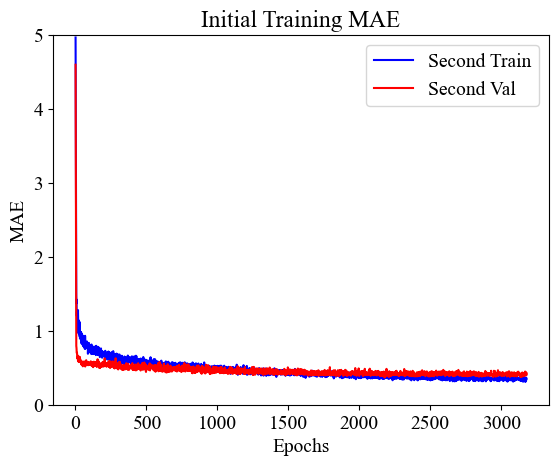

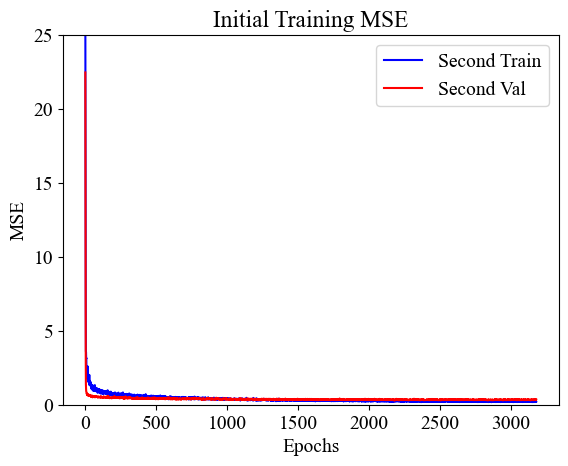

In [64]:
# 绘制MAE与Epochs的关系图
mae = eshistory.history['mae']
val_mae = eshistory.history['val_mae']
epochs = range(1, len(mae) + 1)

# 绘制MAE曲线
plt.plot(epochs, mae, 'b', label='Second Train')
plt.plot(epochs, val_mae, 'r', label='Second Val')
plt.title('Initial Training MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# 设置y轴范围
plt.ylim([0, 5])

# 显示图像
plt.show()

# 绘制MSE与Epochs的关系图
mse = eshistory.history['mse']
val_mse = eshistory.history['val_mse']
epochs = range(1, len(mse) + 1)

# 绘制MSE曲线
plt.plot(epochs, mse, 'b', label='Second Train')
plt.plot(epochs, val_mse, 'r', label='Second Val')
plt.title('Initial Training MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# 设置y轴范围
plt.ylim([0, 25])

# 显示图像
plt.show()

In [65]:
loss, mae, mse = imodel.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} A/cm^2".format(mae))

2/2 - 0s - loss: 0.3426 - mae: 0.4262 - mse: 0.3139 - 36ms/epoch - 18ms/step
Testing set Mean Abs Error:  0.43 A/cm^2


8/8 [==============================] - 0s 2ms/step


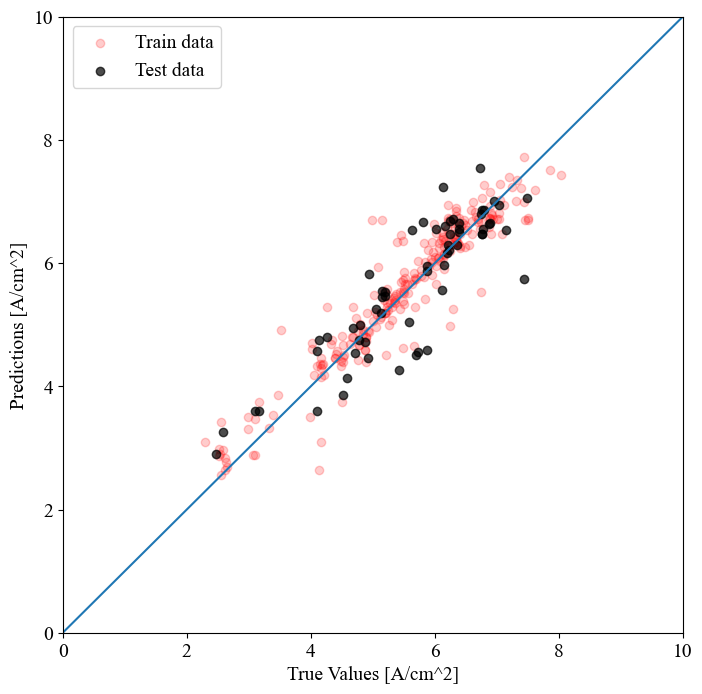

In [66]:
test_predictions = imodel.predict(X_test).flatten()
train_predictions = imodel.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'red', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='black', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [67]:
print('深度学习初训练模型评价指标展示：')

# 对测试集进行预测
y_pred_test = imodel.predict(X_test)

# 计算R^2分数
r2_test = r2_score(y_test, y_pred_test)
print('测试集上的R^2 Score: ', r2_test)

# 对训练集进行预测
y_pred_train = imodel.predict(X_train)

# 计算R^2分数
r2_train = r2_score(y_train, y_pred_train)
print('训练集上的R^2 Score: ', r2_train)

# 计算测试集上的MAE
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集上的MAE: ', mae_test)

# 计算训练集上的MAE
mae_train = mean_absolute_error(y_train, y_pred_train)
print('训练集上的MAE: ', mae_train)

# 计算测试集上的MSE
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集上的MSE: ', mse_test)

# 计算训练集上的MSE
mse_train = mean_squared_error(y_train, y_pred_train)
print('训练集上的MSE: ', mse_train)

# 计算测试集上的RMSE
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('测试集上的RMSE: ', rmse_test)

# 计算训练集上的RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('训练集上的RMSE: ', rmse_train)

深度学习初训练模型评价指标展示：
2/2 [==============================] - 0s 3ms/step
测试集上的R^2 Score:  0.7596727548883047
8/8 [==============================] - 0s 2ms/step
训练集上的R^2 Score:  0.8857671786335836
测试集上的MAE:  0.42620678966967573
训练集上的MAE:  0.2744581475720998
测试集上的MSE:  0.31390730001507144
训练集上的MSE:  0.1638290307068128
测试集上的RMSE:  0.560274307830612
训练集上的RMSE:  0.4047579902939691


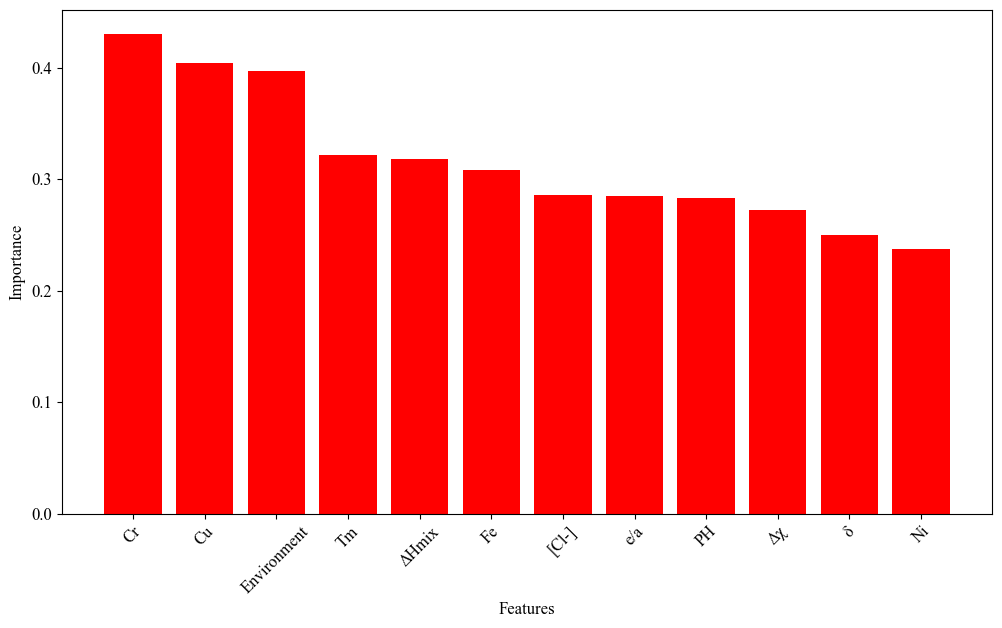

In [68]:
# 获取输入特征的名称
feature_names = dataset.columns[:-1]

# 计算特征重要性
importance = imodel.get_weights()[0]
feature_importance = np.abs(importance).mean(axis=1)

# 按重要性从大到小排序
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_feature_importance = feature_importance[sorted_idx]

# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(12, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# 画出柱状图
ax = plt.subplot(111)
ax.bar(sorted_feature_names, sorted_feature_importance, color='red')

# 设置x轴标签旋转角度，避免重叠
plt.xticks(rotation=45)

# 设置柱状图之间留有一定的空间
plt.subplots_adjust(bottom=0.25)

# 设置x轴、y轴标签、标题
plt.xlabel('Features')
plt.ylabel('Importance')

# 显示图像
plt.show()

In [69]:
imodel.save('D:\IPython\Corrosion-ML\saved_model\深度学习\初训练模型\DL_6')

INFO:tensorflow:Assets written to: D:\IPython\Corrosion-ML\saved_model\深度学习\初训练模型\DL_6\assets


# 贝叶斯优化

In [70]:
import optuna
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 定义目标函数
def target_function(trial):
    # 定义超参数搜索空间
    n_layers = trial.suggest_int('n_layers', 2, 4)
    n_neurons = [trial.suggest_int(f'n_neurons_layer{i}', 40, 100, step=10) for i in range(n_layers)]
    l2_rate = trial.suggest_categorical('l2_rate', [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1])
    activation = trial.suggest_categorical('activation', ['relu', 'elu'])
    dropout_rate = trial.suggest_discrete_uniform('dropout_rate', 0, 0.2, 0.05)
    learning_rate = trial.suggest_categorical('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])

    # 构建模型
    input_shape = (len(X.columns),)
    BOmodel = Sequential()
    BOmodel.add(Dense(n_neurons[0], input_shape=input_shape, activation=activation, kernel_regularizer=keras.regularizers.l2(l2_rate)))
    for i in range(1, n_layers):
        BOmodel.add(Dense(n_neurons[i], activation=activation, kernel_regularizer=keras.regularizers.l2(l2_rate)))
        BOmodel.add(Dropout(dropout_rate))
    BOmodel.add(Dense(1))
    optimizer = Adam(lr=learning_rate)
    BOmodel.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=1000)
    BOhistory = BOmodel.fit(X_train, y_train, epochs=10000, validation_split=0.2, verbose=0, callbacks=[early_stopping], batch_size=5)

    # 返回测试集上的mse
    mse_test = BOmodel.evaluate(X_test, y_test, verbose=0)[2]
    return mse_test

# 运行贝叶斯优化搜索
study = optuna.create_study(direction='minimize')
study.optimize(target_function, n_trials=50)

# 输出最佳超参数
best_params = study.best_params
print('Best params:', best_params)

[I 2024-01-03 16:50:52,105] A new study created in memory with name: no-name-7ae730e8-d060-4d2e-9358-77decaa38431
D:\Python\temp\ipykernel_4740\3153691244.py:17: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  dropout_rate = trial.suggest_discrete_uniform('dropout_rate', 0, 0.2, 0.05)
D:\Python\anaconda\envs\tf2x\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\Python\anaconda\envs\tf2x\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To 

[I 2024-01-03 18:50:32,149] Trial 22 finished with value: 0.4525710940361023 and parameters: {'n_layers': 4, 'n_neurons_layer0': 60, 'n_neurons_layer1': 60, 'n_neurons_layer2': 60, 'n_neurons_layer3': 80, 'l2_rate': 0.0001, 'activation': 'relu', 'dropout_rate': 0.05, 'learning_rate': 0.001}. Best is trial 3 with value: 0.3405771851539612.
[I 2024-01-03 18:52:55,177] Trial 23 finished with value: 0.47416600584983826 and parameters: {'n_layers': 4, 'n_neurons_layer0': 50, 'n_neurons_layer1': 60, 'n_neurons_layer2': 40, 'n_neurons_layer3': 60, 'l2_rate': 0.0001, 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.001}. Best is trial 3 with value: 0.3405771851539612.
[I 2024-01-03 18:55:42,495] Trial 24 finished with value: 0.46210694313049316 and parameters: {'n_layers': 4, 'n_neurons_layer0': 40, 'n_neurons_layer1': 80, 'n_neurons_layer2': 70, 'n_neurons_layer3': 100, 'l2_rate': 0.0001, 'activation': 'relu', 'dropout_rate': 0.15000000000000002, 'learning_rate': 0.001}. Best is 

[I 2024-01-03 20:38:22,712] Trial 47 finished with value: 0.5722931027412415 and parameters: {'n_layers': 3, 'n_neurons_layer0': 70, 'n_neurons_layer1': 80, 'n_neurons_layer2': 100, 'l2_rate': 0.001, 'activation': 'relu', 'dropout_rate': 0.15000000000000002, 'learning_rate': 0.001}. Best is trial 31 with value: 0.30418333411216736.
[I 2024-01-03 20:50:37,988] Trial 48 finished with value: 0.4140761196613312 and parameters: {'n_layers': 2, 'n_neurons_layer0': 60, 'n_neurons_layer1': 100, 'l2_rate': 0.005, 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 1e-05}. Best is trial 31 with value: 0.30418333411216736.
[I 2024-01-03 20:52:17,652] Trial 49 finished with value: 0.7415674924850464 and parameters: {'n_layers': 4, 'n_neurons_layer0': 50, 'n_neurons_layer1': 40, 'n_neurons_layer2': 70, 'n_neurons_layer3': 90, 'l2_rate': 0.0001, 'activation': 'elu', 'dropout_rate': 0.05, 'learning_rate': 0.01}. Best is trial 31 with value: 0.30418333411216736.


Best params: {'n_layers': 2, 'n_neurons_layer0': 80, 'n_neurons_layer1': 90, 'l2_rate': 0.001, 'activation': 'relu', 'dropout_rate': 0.2, 'learning_rate': 0.001}


In [71]:
# 训练最佳模型
input_shape = (len(X.columns),)
BOmodel = Sequential()
BOmodel.add(Dense(best_params['n_neurons_layer0'], input_shape=input_shape, activation=best_params['activation'], kernel_regularizer=keras.regularizers.l2(best_params['l2_rate'])))
for i in range(1, best_params['n_layers']):
    BOmodel.add(Dense(best_params[f'n_neurons_layer{i}'], activation=best_params['activation'], kernel_regularizer=keras.regularizers.l2(best_params['l2_rate'])))
    BOmodel.add(Dropout(best_params['dropout_rate']))
BOmodel.add(Dense(1))
optimizer = Adam(lr=best_params['learning_rate'])
BOmodel.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
early_stopping = EarlyStopping(monitor='val_loss', patience=1000)
BOhistory = BOmodel.fit(X_train, y_train, epochs=10000, validation_split=0.2, verbose=2, callbacks=[early_stopping], batch_size=5)

Epoch 1/10000
39/39 - 1s - loss: 16.0124 - mae: 3.4850 - mse: 15.9056 - val_loss: 4.7030 - val_mae: 1.7974 - val_mse: 4.5939 - 1s/epoch - 27ms/step
Epoch 2/10000
39/39 - 0s - loss: 4.1673 - mae: 1.5093 - mse: 4.0574 - val_loss: 2.2702 - val_mae: 1.1986 - val_mse: 2.1598 - 153ms/epoch - 4ms/step
Epoch 3/10000
39/39 - 0s - loss: 2.8884 - mae: 1.2589 - mse: 2.7783 - val_loss: 1.8487 - val_mae: 1.0844 - val_mse: 1.7388 - 116ms/epoch - 3ms/step
Epoch 4/10000
39/39 - 0s - loss: 2.1485 - mae: 1.0812 - mse: 2.0386 - val_loss: 1.8294 - val_mae: 1.0864 - val_mse: 1.7201 - 77ms/epoch - 2ms/step
Epoch 5/10000
39/39 - 0s - loss: 1.8299 - mae: 1.0403 - mse: 1.7205 - val_loss: 1.5222 - val_mae: 0.9652 - val_mse: 1.4128 - 69ms/epoch - 2ms/step
Epoch 6/10000
39/39 - 0s - loss: 1.6617 - mae: 0.9756 - mse: 1.5525 - val_loss: 1.3908 - val_mae: 0.9094 - val_mse: 1.2817 - 74ms/epoch - 2ms/step
Epoch 7/10000
39/39 - 0s - loss: 1.3501 - mae: 0.8874 - mse: 1.2411 - val_loss: 1.3205 - val_mae: 0.8991 - val_mse:

Epoch 57/10000
39/39 - 0s - loss: 0.5015 - mae: 0.5145 - mse: 0.4042 - val_loss: 0.5667 - val_mae: 0.5474 - val_mse: 0.4696 - 76ms/epoch - 2ms/step
Epoch 58/10000
39/39 - 0s - loss: 0.5668 - mae: 0.5461 - mse: 0.4696 - val_loss: 0.5584 - val_mae: 0.5457 - val_mse: 0.4613 - 76ms/epoch - 2ms/step
Epoch 59/10000
39/39 - 0s - loss: 0.4583 - mae: 0.4595 - mse: 0.3613 - val_loss: 0.5136 - val_mae: 0.4888 - val_mse: 0.4168 - 93ms/epoch - 2ms/step
Epoch 60/10000
39/39 - 0s - loss: 0.4376 - mae: 0.4530 - mse: 0.3412 - val_loss: 0.5303 - val_mae: 0.5191 - val_mse: 0.4341 - 77ms/epoch - 2ms/step
Epoch 61/10000
39/39 - 0s - loss: 0.4753 - mae: 0.4923 - mse: 0.3791 - val_loss: 0.4854 - val_mae: 0.4885 - val_mse: 0.3893 - 81ms/epoch - 2ms/step
Epoch 62/10000
39/39 - 0s - loss: 0.4844 - mae: 0.4826 - mse: 0.3884 - val_loss: 0.4609 - val_mae: 0.4429 - val_mse: 0.3651 - 85ms/epoch - 2ms/step
Epoch 63/10000
39/39 - 0s - loss: 0.4804 - mae: 0.4884 - mse: 0.3847 - val_loss: 0.4719 - val_mae: 0.4756 - val_

Epoch 113/10000
39/39 - 0s - loss: 0.4790 - mae: 0.4957 - mse: 0.3975 - val_loss: 0.5908 - val_mae: 0.5659 - val_mse: 0.5091 - 78ms/epoch - 2ms/step
Epoch 114/10000
39/39 - 0s - loss: 0.4463 - mae: 0.4653 - mse: 0.3648 - val_loss: 0.5056 - val_mae: 0.5176 - val_mse: 0.4243 - 100ms/epoch - 3ms/step
Epoch 115/10000
39/39 - 0s - loss: 0.4689 - mae: 0.4860 - mse: 0.3877 - val_loss: 0.4543 - val_mae: 0.4747 - val_mse: 0.3732 - 101ms/epoch - 3ms/step
Epoch 116/10000
39/39 - 0s - loss: 0.4406 - mae: 0.4858 - mse: 0.3596 - val_loss: 0.4930 - val_mae: 0.4985 - val_mse: 0.4120 - 87ms/epoch - 2ms/step
Epoch 117/10000
39/39 - 0s - loss: 0.4309 - mae: 0.4716 - mse: 0.3503 - val_loss: 0.4795 - val_mae: 0.4916 - val_mse: 0.3991 - 93ms/epoch - 2ms/step
Epoch 118/10000
39/39 - 0s - loss: 0.4367 - mae: 0.4542 - mse: 0.3565 - val_loss: 0.4644 - val_mae: 0.4668 - val_mse: 0.3845 - 102ms/epoch - 3ms/step
Epoch 119/10000
39/39 - 0s - loss: 0.3971 - mae: 0.4406 - mse: 0.3171 - val_loss: 0.4420 - val_mae: 0.4

Epoch 168/10000
39/39 - 0s - loss: 0.3922 - mae: 0.4401 - mse: 0.3233 - val_loss: 0.4208 - val_mae: 0.4597 - val_mse: 0.3522 - 78ms/epoch - 2ms/step
Epoch 169/10000
39/39 - 0s - loss: 0.3761 - mae: 0.4290 - mse: 0.3075 - val_loss: 0.4494 - val_mae: 0.4681 - val_mse: 0.3808 - 79ms/epoch - 2ms/step
Epoch 170/10000
39/39 - 0s - loss: 0.4005 - mae: 0.4436 - mse: 0.3321 - val_loss: 0.4620 - val_mae: 0.4708 - val_mse: 0.3937 - 75ms/epoch - 2ms/step
Epoch 171/10000
39/39 - 0s - loss: 0.4467 - mae: 0.4793 - mse: 0.3786 - val_loss: 0.4697 - val_mae: 0.4871 - val_mse: 0.4016 - 80ms/epoch - 2ms/step
Epoch 172/10000
39/39 - 0s - loss: 0.3890 - mae: 0.4446 - mse: 0.3211 - val_loss: 0.4341 - val_mae: 0.4653 - val_mse: 0.3664 - 92ms/epoch - 2ms/step
Epoch 173/10000
39/39 - 0s - loss: 0.3931 - mae: 0.4469 - mse: 0.3255 - val_loss: 0.4294 - val_mae: 0.4709 - val_mse: 0.3620 - 79ms/epoch - 2ms/step
Epoch 174/10000
39/39 - 0s - loss: 0.3035 - mae: 0.3851 - mse: 0.2360 - val_loss: 0.4039 - val_mae: 0.4330

Epoch 223/10000
39/39 - 0s - loss: 0.3943 - mae: 0.4487 - mse: 0.3353 - val_loss: 0.4512 - val_mae: 0.4538 - val_mse: 0.3924 - 78ms/epoch - 2ms/step
Epoch 224/10000
39/39 - 0s - loss: 0.3570 - mae: 0.4140 - mse: 0.2983 - val_loss: 0.4201 - val_mae: 0.4367 - val_mse: 0.3613 - 89ms/epoch - 2ms/step
Epoch 225/10000
39/39 - 0s - loss: 0.3284 - mae: 0.4042 - mse: 0.2697 - val_loss: 0.4853 - val_mae: 0.4996 - val_mse: 0.4266 - 68ms/epoch - 2ms/step
Epoch 226/10000
39/39 - 0s - loss: 0.3895 - mae: 0.4561 - mse: 0.3310 - val_loss: 0.4177 - val_mae: 0.4602 - val_mse: 0.3591 - 71ms/epoch - 2ms/step
Epoch 227/10000
39/39 - 0s - loss: 0.3346 - mae: 0.4151 - mse: 0.2760 - val_loss: 0.4608 - val_mae: 0.4934 - val_mse: 0.4021 - 92ms/epoch - 2ms/step
Epoch 228/10000
39/39 - 0s - loss: 0.3811 - mae: 0.4436 - mse: 0.3226 - val_loss: 0.4010 - val_mae: 0.4415 - val_mse: 0.3426 - 77ms/epoch - 2ms/step
Epoch 229/10000
39/39 - 0s - loss: 0.3576 - mae: 0.4277 - mse: 0.2992 - val_loss: 0.4598 - val_mae: 0.5020

Epoch 278/10000
39/39 - 0s - loss: 0.3301 - mae: 0.4027 - mse: 0.2778 - val_loss: 0.4359 - val_mae: 0.4642 - val_mse: 0.3836 - 107ms/epoch - 3ms/step
Epoch 279/10000
39/39 - 0s - loss: 0.2858 - mae: 0.3700 - mse: 0.2334 - val_loss: 0.4326 - val_mae: 0.4626 - val_mse: 0.3804 - 105ms/epoch - 3ms/step
Epoch 280/10000
39/39 - 0s - loss: 0.2765 - mae: 0.3568 - mse: 0.2243 - val_loss: 0.4157 - val_mae: 0.4520 - val_mse: 0.3634 - 102ms/epoch - 3ms/step
Epoch 281/10000
39/39 - 0s - loss: 0.3431 - mae: 0.4242 - mse: 0.2910 - val_loss: 0.4227 - val_mae: 0.4693 - val_mse: 0.3706 - 86ms/epoch - 2ms/step
Epoch 282/10000
39/39 - 0s - loss: 0.3144 - mae: 0.3983 - mse: 0.2624 - val_loss: 0.4443 - val_mae: 0.4707 - val_mse: 0.3924 - 76ms/epoch - 2ms/step
Epoch 283/10000
39/39 - 0s - loss: 0.3285 - mae: 0.4108 - mse: 0.2765 - val_loss: 0.4044 - val_mae: 0.4412 - val_mse: 0.3524 - 81ms/epoch - 2ms/step
Epoch 284/10000
39/39 - 0s - loss: 0.3003 - mae: 0.3955 - mse: 0.2484 - val_loss: 0.4100 - val_mae: 0.4

Epoch 333/10000
39/39 - 0s - loss: 0.2776 - mae: 0.3841 - mse: 0.2304 - val_loss: 0.4039 - val_mae: 0.4413 - val_mse: 0.3567 - 68ms/epoch - 2ms/step
Epoch 334/10000
39/39 - 0s - loss: 0.3131 - mae: 0.4076 - mse: 0.2659 - val_loss: 0.4395 - val_mae: 0.4738 - val_mse: 0.3924 - 69ms/epoch - 2ms/step
Epoch 335/10000
39/39 - 0s - loss: 0.3166 - mae: 0.3802 - mse: 0.2695 - val_loss: 0.4218 - val_mae: 0.4602 - val_mse: 0.3746 - 71ms/epoch - 2ms/step
Epoch 336/10000
39/39 - 0s - loss: 0.2551 - mae: 0.3529 - mse: 0.2082 - val_loss: 0.4156 - val_mae: 0.4644 - val_mse: 0.3687 - 73ms/epoch - 2ms/step
Epoch 337/10000
39/39 - 0s - loss: 0.2348 - mae: 0.3265 - mse: 0.1878 - val_loss: 0.3874 - val_mae: 0.4386 - val_mse: 0.3405 - 71ms/epoch - 2ms/step
Epoch 338/10000
39/39 - 0s - loss: 0.3139 - mae: 0.4118 - mse: 0.2668 - val_loss: 0.3812 - val_mae: 0.4179 - val_mse: 0.3342 - 73ms/epoch - 2ms/step
Epoch 339/10000
39/39 - 0s - loss: 0.2875 - mae: 0.3745 - mse: 0.2405 - val_loss: 0.4162 - val_mae: 0.4685

Epoch 388/10000
39/39 - 0s - loss: 0.2749 - mae: 0.3540 - mse: 0.2312 - val_loss: 0.4317 - val_mae: 0.4621 - val_mse: 0.3881 - 69ms/epoch - 2ms/step
Epoch 389/10000
39/39 - 0s - loss: 0.2663 - mae: 0.3498 - mse: 0.2227 - val_loss: 0.3689 - val_mae: 0.4138 - val_mse: 0.3254 - 69ms/epoch - 2ms/step
Epoch 390/10000
39/39 - 0s - loss: 0.2822 - mae: 0.3816 - mse: 0.2387 - val_loss: 0.4039 - val_mae: 0.4365 - val_mse: 0.3602 - 70ms/epoch - 2ms/step
Epoch 391/10000
39/39 - 0s - loss: 0.2703 - mae: 0.3678 - mse: 0.2267 - val_loss: 0.3916 - val_mae: 0.4285 - val_mse: 0.3480 - 70ms/epoch - 2ms/step
Epoch 392/10000
39/39 - 0s - loss: 0.2231 - mae: 0.3130 - mse: 0.1795 - val_loss: 0.4204 - val_mae: 0.4419 - val_mse: 0.3768 - 69ms/epoch - 2ms/step
Epoch 393/10000
39/39 - 0s - loss: 0.3090 - mae: 0.3989 - mse: 0.2654 - val_loss: 0.4436 - val_mae: 0.4836 - val_mse: 0.4000 - 70ms/epoch - 2ms/step
Epoch 394/10000
39/39 - 0s - loss: 0.2999 - mae: 0.3921 - mse: 0.2564 - val_loss: 0.3901 - val_mae: 0.4280

Epoch 443/10000
39/39 - 0s - loss: 0.2242 - mae: 0.3168 - mse: 0.1827 - val_loss: 0.3675 - val_mae: 0.4332 - val_mse: 0.3258 - 71ms/epoch - 2ms/step
Epoch 444/10000
39/39 - 0s - loss: 0.2460 - mae: 0.3594 - mse: 0.2044 - val_loss: 0.3710 - val_mae: 0.4314 - val_mse: 0.3296 - 72ms/epoch - 2ms/step
Epoch 445/10000
39/39 - 0s - loss: 0.2545 - mae: 0.3607 - mse: 0.2131 - val_loss: 0.3968 - val_mae: 0.4440 - val_mse: 0.3556 - 70ms/epoch - 2ms/step
Epoch 446/10000
39/39 - 0s - loss: 0.2850 - mae: 0.3733 - mse: 0.2437 - val_loss: 0.3825 - val_mae: 0.4411 - val_mse: 0.3414 - 69ms/epoch - 2ms/step
Epoch 447/10000
39/39 - 0s - loss: 0.2453 - mae: 0.3532 - mse: 0.2043 - val_loss: 0.3755 - val_mae: 0.4301 - val_mse: 0.3343 - 75ms/epoch - 2ms/step
Epoch 448/10000
39/39 - 0s - loss: 0.2139 - mae: 0.3257 - mse: 0.1728 - val_loss: 0.3770 - val_mae: 0.4288 - val_mse: 0.3359 - 72ms/epoch - 2ms/step
Epoch 449/10000
39/39 - 0s - loss: 0.2791 - mae: 0.3810 - mse: 0.2378 - val_loss: 0.3914 - val_mae: 0.4465

Epoch 498/10000
39/39 - 0s - loss: 0.2408 - mae: 0.3511 - mse: 0.2015 - val_loss: 0.3977 - val_mae: 0.4265 - val_mse: 0.3582 - 67ms/epoch - 2ms/step
Epoch 499/10000
39/39 - 0s - loss: 0.2589 - mae: 0.3603 - mse: 0.2194 - val_loss: 0.3673 - val_mae: 0.4196 - val_mse: 0.3278 - 70ms/epoch - 2ms/step
Epoch 500/10000
39/39 - 0s - loss: 0.2375 - mae: 0.3423 - mse: 0.1981 - val_loss: 0.3999 - val_mae: 0.4535 - val_mse: 0.3605 - 73ms/epoch - 2ms/step
Epoch 501/10000
39/39 - 0s - loss: 0.2398 - mae: 0.3455 - mse: 0.2003 - val_loss: 0.3938 - val_mae: 0.4429 - val_mse: 0.3541 - 81ms/epoch - 2ms/step
Epoch 502/10000
39/39 - 0s - loss: 0.2432 - mae: 0.3407 - mse: 0.2037 - val_loss: 0.4134 - val_mae: 0.4610 - val_mse: 0.3740 - 73ms/epoch - 2ms/step
Epoch 503/10000
39/39 - 0s - loss: 0.2139 - mae: 0.3257 - mse: 0.1744 - val_loss: 0.4163 - val_mae: 0.4547 - val_mse: 0.3768 - 75ms/epoch - 2ms/step
Epoch 504/10000
39/39 - 0s - loss: 0.2490 - mae: 0.3299 - mse: 0.2097 - val_loss: 0.3885 - val_mae: 0.4387

Epoch 553/10000
39/39 - 0s - loss: 0.2436 - mae: 0.3459 - mse: 0.2059 - val_loss: 0.3754 - val_mae: 0.4224 - val_mse: 0.3377 - 73ms/epoch - 2ms/step
Epoch 554/10000
39/39 - 0s - loss: 0.2286 - mae: 0.3295 - mse: 0.1907 - val_loss: 0.3661 - val_mae: 0.4081 - val_mse: 0.3282 - 74ms/epoch - 2ms/step
Epoch 555/10000
39/39 - 0s - loss: 0.2587 - mae: 0.3537 - mse: 0.2209 - val_loss: 0.4294 - val_mae: 0.4701 - val_mse: 0.3918 - 71ms/epoch - 2ms/step
Epoch 556/10000
39/39 - 0s - loss: 0.2186 - mae: 0.3165 - mse: 0.1809 - val_loss: 0.3598 - val_mae: 0.4083 - val_mse: 0.3220 - 72ms/epoch - 2ms/step
Epoch 557/10000
39/39 - 0s - loss: 0.1882 - mae: 0.2918 - mse: 0.1505 - val_loss: 0.3902 - val_mae: 0.4398 - val_mse: 0.3525 - 69ms/epoch - 2ms/step
Epoch 558/10000
39/39 - 0s - loss: 0.2190 - mae: 0.3185 - mse: 0.1813 - val_loss: 0.3553 - val_mae: 0.4078 - val_mse: 0.3177 - 67ms/epoch - 2ms/step
Epoch 559/10000
39/39 - 0s - loss: 0.2213 - mae: 0.3287 - mse: 0.1838 - val_loss: 0.3614 - val_mae: 0.4178

Epoch 608/10000
39/39 - 0s - loss: 0.2388 - mae: 0.3352 - mse: 0.2018 - val_loss: 0.3890 - val_mae: 0.4462 - val_mse: 0.3520 - 70ms/epoch - 2ms/step
Epoch 609/10000
39/39 - 0s - loss: 0.2086 - mae: 0.3032 - mse: 0.1717 - val_loss: 0.3772 - val_mae: 0.4176 - val_mse: 0.3403 - 67ms/epoch - 2ms/step
Epoch 610/10000
39/39 - 0s - loss: 0.2300 - mae: 0.3524 - mse: 0.1931 - val_loss: 0.3869 - val_mae: 0.4286 - val_mse: 0.3500 - 75ms/epoch - 2ms/step
Epoch 611/10000
39/39 - 0s - loss: 0.2128 - mae: 0.3177 - mse: 0.1758 - val_loss: 0.3807 - val_mae: 0.4276 - val_mse: 0.3440 - 72ms/epoch - 2ms/step
Epoch 612/10000
39/39 - 0s - loss: 0.1943 - mae: 0.2936 - mse: 0.1575 - val_loss: 0.3940 - val_mae: 0.4344 - val_mse: 0.3571 - 69ms/epoch - 2ms/step
Epoch 613/10000
39/39 - 0s - loss: 0.2220 - mae: 0.3152 - mse: 0.1850 - val_loss: 0.3727 - val_mae: 0.4237 - val_mse: 0.3359 - 69ms/epoch - 2ms/step
Epoch 614/10000
39/39 - 0s - loss: 0.2280 - mae: 0.3347 - mse: 0.1912 - val_loss: 0.4082 - val_mae: 0.4641

Epoch 663/10000
39/39 - 0s - loss: 0.2243 - mae: 0.3398 - mse: 0.1884 - val_loss: 0.3906 - val_mae: 0.4414 - val_mse: 0.3546 - 71ms/epoch - 2ms/step
Epoch 664/10000
39/39 - 0s - loss: 0.2235 - mae: 0.3125 - mse: 0.1875 - val_loss: 0.3569 - val_mae: 0.3990 - val_mse: 0.3209 - 72ms/epoch - 2ms/step
Epoch 665/10000
39/39 - 0s - loss: 0.2169 - mae: 0.3186 - mse: 0.1809 - val_loss: 0.3423 - val_mae: 0.4017 - val_mse: 0.3064 - 70ms/epoch - 2ms/step
Epoch 666/10000
39/39 - 0s - loss: 0.2139 - mae: 0.3032 - mse: 0.1780 - val_loss: 0.3778 - val_mae: 0.4250 - val_mse: 0.3417 - 70ms/epoch - 2ms/step
Epoch 667/10000
39/39 - 0s - loss: 0.2177 - mae: 0.3175 - mse: 0.1816 - val_loss: 0.3736 - val_mae: 0.4237 - val_mse: 0.3376 - 67ms/epoch - 2ms/step
Epoch 668/10000
39/39 - 0s - loss: 0.2045 - mae: 0.3067 - mse: 0.1685 - val_loss: 0.3534 - val_mae: 0.4213 - val_mse: 0.3173 - 70ms/epoch - 2ms/step
Epoch 669/10000
39/39 - 0s - loss: 0.2337 - mae: 0.3358 - mse: 0.1977 - val_loss: 0.3912 - val_mae: 0.4601

Epoch 718/10000
39/39 - 0s - loss: 0.2380 - mae: 0.3297 - mse: 0.2023 - val_loss: 0.4101 - val_mae: 0.4638 - val_mse: 0.3743 - 77ms/epoch - 2ms/step
Epoch 719/10000
39/39 - 0s - loss: 0.2116 - mae: 0.3117 - mse: 0.1762 - val_loss: 0.3595 - val_mae: 0.4240 - val_mse: 0.3240 - 71ms/epoch - 2ms/step
Epoch 720/10000
39/39 - 0s - loss: 0.1857 - mae: 0.2944 - mse: 0.1501 - val_loss: 0.3865 - val_mae: 0.4283 - val_mse: 0.3507 - 79ms/epoch - 2ms/step
Epoch 721/10000
39/39 - 0s - loss: 0.1710 - mae: 0.2853 - mse: 0.1352 - val_loss: 0.4049 - val_mae: 0.4469 - val_mse: 0.3691 - 74ms/epoch - 2ms/step
Epoch 722/10000
39/39 - 0s - loss: 0.2280 - mae: 0.3198 - mse: 0.1923 - val_loss: 0.3767 - val_mae: 0.4263 - val_mse: 0.3411 - 74ms/epoch - 2ms/step
Epoch 723/10000
39/39 - 0s - loss: 0.2091 - mae: 0.3203 - mse: 0.1736 - val_loss: 0.4027 - val_mae: 0.4472 - val_mse: 0.3673 - 90ms/epoch - 2ms/step
Epoch 724/10000
39/39 - 0s - loss: 0.1957 - mae: 0.3025 - mse: 0.1603 - val_loss: 0.4186 - val_mae: 0.4681

Epoch 773/10000
39/39 - 0s - loss: 0.1751 - mae: 0.2752 - mse: 0.1399 - val_loss: 0.3660 - val_mae: 0.4224 - val_mse: 0.3309 - 72ms/epoch - 2ms/step
Epoch 774/10000
39/39 - 0s - loss: 0.2279 - mae: 0.3266 - mse: 0.1927 - val_loss: 0.3925 - val_mae: 0.4370 - val_mse: 0.3573 - 75ms/epoch - 2ms/step
Epoch 775/10000
39/39 - 0s - loss: 0.2281 - mae: 0.3265 - mse: 0.1930 - val_loss: 0.4010 - val_mae: 0.4520 - val_mse: 0.3658 - 73ms/epoch - 2ms/step
Epoch 776/10000
39/39 - 0s - loss: 0.1986 - mae: 0.3073 - mse: 0.1633 - val_loss: 0.3716 - val_mae: 0.4107 - val_mse: 0.3364 - 73ms/epoch - 2ms/step
Epoch 777/10000
39/39 - 0s - loss: 0.2016 - mae: 0.3056 - mse: 0.1666 - val_loss: 0.3815 - val_mae: 0.4084 - val_mse: 0.3465 - 75ms/epoch - 2ms/step
Epoch 778/10000
39/39 - 0s - loss: 0.1900 - mae: 0.3007 - mse: 0.1550 - val_loss: 0.3608 - val_mae: 0.4038 - val_mse: 0.3258 - 77ms/epoch - 2ms/step
Epoch 779/10000
39/39 - 0s - loss: 0.2095 - mae: 0.2931 - mse: 0.1745 - val_loss: 0.3986 - val_mae: 0.4470

Epoch 828/10000
39/39 - 0s - loss: 0.1937 - mae: 0.2949 - mse: 0.1593 - val_loss: 0.3677 - val_mae: 0.4174 - val_mse: 0.3333 - 72ms/epoch - 2ms/step
Epoch 829/10000
39/39 - 0s - loss: 0.1798 - mae: 0.2755 - mse: 0.1453 - val_loss: 0.3651 - val_mae: 0.4210 - val_mse: 0.3306 - 76ms/epoch - 2ms/step
Epoch 830/10000
39/39 - 0s - loss: 0.1984 - mae: 0.2984 - mse: 0.1640 - val_loss: 0.4155 - val_mae: 0.4468 - val_mse: 0.3812 - 74ms/epoch - 2ms/step
Epoch 831/10000
39/39 - 0s - loss: 0.2119 - mae: 0.3242 - mse: 0.1777 - val_loss: 0.3905 - val_mae: 0.4323 - val_mse: 0.3563 - 73ms/epoch - 2ms/step
Epoch 832/10000
39/39 - 0s - loss: 0.1919 - mae: 0.2863 - mse: 0.1577 - val_loss: 0.4010 - val_mae: 0.4631 - val_mse: 0.3667 - 71ms/epoch - 2ms/step
Epoch 833/10000
39/39 - 0s - loss: 0.2102 - mae: 0.3101 - mse: 0.1761 - val_loss: 0.3611 - val_mae: 0.4228 - val_mse: 0.3271 - 75ms/epoch - 2ms/step
Epoch 834/10000
39/39 - 0s - loss: 0.2162 - mae: 0.3141 - mse: 0.1821 - val_loss: 0.3897 - val_mae: 0.4417

Epoch 883/10000
39/39 - 0s - loss: 0.1848 - mae: 0.2926 - mse: 0.1509 - val_loss: 0.4085 - val_mae: 0.4516 - val_mse: 0.3748 - 73ms/epoch - 2ms/step
Epoch 884/10000
39/39 - 0s - loss: 0.1884 - mae: 0.2875 - mse: 0.1547 - val_loss: 0.3942 - val_mae: 0.4520 - val_mse: 0.3606 - 77ms/epoch - 2ms/step
Epoch 885/10000
39/39 - 0s - loss: 0.1839 - mae: 0.2889 - mse: 0.1503 - val_loss: 0.4126 - val_mae: 0.4809 - val_mse: 0.3790 - 77ms/epoch - 2ms/step
Epoch 886/10000
39/39 - 0s - loss: 0.2117 - mae: 0.3134 - mse: 0.1780 - val_loss: 0.3911 - val_mae: 0.4465 - val_mse: 0.3574 - 74ms/epoch - 2ms/step
Epoch 887/10000
39/39 - 0s - loss: 0.1987 - mae: 0.2791 - mse: 0.1651 - val_loss: 0.3662 - val_mae: 0.4192 - val_mse: 0.3327 - 73ms/epoch - 2ms/step
Epoch 888/10000
39/39 - 0s - loss: 0.1787 - mae: 0.2811 - mse: 0.1451 - val_loss: 0.3925 - val_mae: 0.4519 - val_mse: 0.3587 - 79ms/epoch - 2ms/step
Epoch 889/10000
39/39 - 0s - loss: 0.1847 - mae: 0.2886 - mse: 0.1508 - val_loss: 0.3704 - val_mae: 0.4154

Epoch 938/10000
39/39 - 0s - loss: 0.1886 - mae: 0.2868 - mse: 0.1556 - val_loss: 0.3672 - val_mae: 0.4098 - val_mse: 0.3343 - 73ms/epoch - 2ms/step
Epoch 939/10000
39/39 - 0s - loss: 0.1811 - mae: 0.2831 - mse: 0.1483 - val_loss: 0.3672 - val_mae: 0.4287 - val_mse: 0.3344 - 79ms/epoch - 2ms/step
Epoch 940/10000
39/39 - 0s - loss: 0.1692 - mae: 0.2684 - mse: 0.1363 - val_loss: 0.3969 - val_mae: 0.4304 - val_mse: 0.3639 - 74ms/epoch - 2ms/step
Epoch 941/10000
39/39 - 0s - loss: 0.1780 - mae: 0.2785 - mse: 0.1450 - val_loss: 0.3872 - val_mae: 0.4258 - val_mse: 0.3542 - 75ms/epoch - 2ms/step
Epoch 942/10000
39/39 - 0s - loss: 0.1844 - mae: 0.2882 - mse: 0.1514 - val_loss: 0.3923 - val_mae: 0.4262 - val_mse: 0.3595 - 73ms/epoch - 2ms/step
Epoch 943/10000
39/39 - 0s - loss: 0.1735 - mae: 0.2884 - mse: 0.1407 - val_loss: 0.4180 - val_mae: 0.4602 - val_mse: 0.3851 - 75ms/epoch - 2ms/step
Epoch 944/10000
39/39 - 0s - loss: 0.1809 - mae: 0.2865 - mse: 0.1480 - val_loss: 0.3831 - val_mae: 0.4388

Epoch 993/10000
39/39 - 0s - loss: 0.1639 - mae: 0.2635 - mse: 0.1311 - val_loss: 0.3863 - val_mae: 0.4478 - val_mse: 0.3535 - 75ms/epoch - 2ms/step
Epoch 994/10000
39/39 - 0s - loss: 0.1644 - mae: 0.2584 - mse: 0.1317 - val_loss: 0.3891 - val_mae: 0.4305 - val_mse: 0.3565 - 72ms/epoch - 2ms/step
Epoch 995/10000
39/39 - 0s - loss: 0.1613 - mae: 0.2598 - mse: 0.1287 - val_loss: 0.3883 - val_mae: 0.4273 - val_mse: 0.3557 - 75ms/epoch - 2ms/step
Epoch 996/10000
39/39 - 0s - loss: 0.1661 - mae: 0.2617 - mse: 0.1334 - val_loss: 0.3864 - val_mae: 0.4287 - val_mse: 0.3537 - 70ms/epoch - 2ms/step
Epoch 997/10000
39/39 - 0s - loss: 0.1663 - mae: 0.2652 - mse: 0.1337 - val_loss: 0.3870 - val_mae: 0.4444 - val_mse: 0.3545 - 72ms/epoch - 2ms/step
Epoch 998/10000
39/39 - 0s - loss: 0.1707 - mae: 0.2721 - mse: 0.1381 - val_loss: 0.3809 - val_mae: 0.4320 - val_mse: 0.3484 - 77ms/epoch - 2ms/step
Epoch 999/10000
39/39 - 0s - loss: 0.1773 - mae: 0.2606 - mse: 0.1449 - val_loss: 0.3814 - val_mae: 0.4412

Epoch 1048/10000
39/39 - 0s - loss: 0.1677 - mae: 0.2697 - mse: 0.1356 - val_loss: 0.3663 - val_mae: 0.4233 - val_mse: 0.3343 - 88ms/epoch - 2ms/step
Epoch 1049/10000
39/39 - 0s - loss: 0.1961 - mae: 0.2927 - mse: 0.1642 - val_loss: 0.3920 - val_mae: 0.4537 - val_mse: 0.3600 - 97ms/epoch - 2ms/step
Epoch 1050/10000
39/39 - 0s - loss: 0.1619 - mae: 0.2648 - mse: 0.1299 - val_loss: 0.3993 - val_mae: 0.4509 - val_mse: 0.3674 - 81ms/epoch - 2ms/step
Epoch 1051/10000
39/39 - 0s - loss: 0.1623 - mae: 0.2584 - mse: 0.1304 - val_loss: 0.3920 - val_mae: 0.4385 - val_mse: 0.3600 - 70ms/epoch - 2ms/step
Epoch 1052/10000
39/39 - 0s - loss: 0.1730 - mae: 0.2735 - mse: 0.1410 - val_loss: 0.3866 - val_mae: 0.4206 - val_mse: 0.3546 - 75ms/epoch - 2ms/step
Epoch 1053/10000
39/39 - 0s - loss: 0.1842 - mae: 0.2782 - mse: 0.1522 - val_loss: 0.3888 - val_mae: 0.4383 - val_mse: 0.3570 - 71ms/epoch - 2ms/step
Epoch 1054/10000
39/39 - 0s - loss: 0.1664 - mae: 0.2692 - mse: 0.1346 - val_loss: 0.4015 - val_mae:

Epoch 1103/10000
39/39 - 0s - loss: 0.1613 - mae: 0.2701 - mse: 0.1302 - val_loss: 0.3933 - val_mae: 0.4511 - val_mse: 0.3622 - 79ms/epoch - 2ms/step
Epoch 1104/10000
39/39 - 0s - loss: 0.1649 - mae: 0.2626 - mse: 0.1339 - val_loss: 0.3748 - val_mae: 0.4076 - val_mse: 0.3439 - 78ms/epoch - 2ms/step
Epoch 1105/10000
39/39 - 0s - loss: 0.1643 - mae: 0.2671 - mse: 0.1334 - val_loss: 0.4524 - val_mae: 0.4883 - val_mse: 0.4213 - 72ms/epoch - 2ms/step
Epoch 1106/10000
39/39 - 0s - loss: 0.1863 - mae: 0.2808 - mse: 0.1552 - val_loss: 0.3746 - val_mae: 0.4151 - val_mse: 0.3436 - 72ms/epoch - 2ms/step
Epoch 1107/10000
39/39 - 0s - loss: 0.1467 - mae: 0.2355 - mse: 0.1158 - val_loss: 0.3794 - val_mae: 0.4369 - val_mse: 0.3486 - 75ms/epoch - 2ms/step
Epoch 1108/10000
39/39 - 0s - loss: 0.1743 - mae: 0.2800 - mse: 0.1434 - val_loss: 0.4149 - val_mae: 0.4697 - val_mse: 0.3838 - 76ms/epoch - 2ms/step
Epoch 1109/10000
39/39 - 0s - loss: 0.1564 - mae: 0.2625 - mse: 0.1252 - val_loss: 0.3683 - val_mae:

Epoch 1158/10000
39/39 - 0s - loss: 0.1554 - mae: 0.2568 - mse: 0.1250 - val_loss: 0.3795 - val_mae: 0.4447 - val_mse: 0.3490 - 71ms/epoch - 2ms/step
Epoch 1159/10000
39/39 - 0s - loss: 0.1452 - mae: 0.2405 - mse: 0.1146 - val_loss: 0.3611 - val_mae: 0.4174 - val_mse: 0.3306 - 75ms/epoch - 2ms/step
Epoch 1160/10000
39/39 - 0s - loss: 0.1688 - mae: 0.2735 - mse: 0.1385 - val_loss: 0.3730 - val_mae: 0.4277 - val_mse: 0.3426 - 73ms/epoch - 2ms/step
Epoch 1161/10000
39/39 - 0s - loss: 0.1751 - mae: 0.2660 - mse: 0.1446 - val_loss: 0.3782 - val_mae: 0.4368 - val_mse: 0.3477 - 80ms/epoch - 2ms/step
Epoch 1162/10000
39/39 - 0s - loss: 0.1689 - mae: 0.2728 - mse: 0.1385 - val_loss: 0.3812 - val_mae: 0.4595 - val_mse: 0.3508 - 72ms/epoch - 2ms/step
Epoch 1163/10000
39/39 - 0s - loss: 0.1536 - mae: 0.2476 - mse: 0.1231 - val_loss: 0.3888 - val_mae: 0.4379 - val_mse: 0.3583 - 75ms/epoch - 2ms/step
Epoch 1164/10000
39/39 - 0s - loss: 0.1670 - mae: 0.2705 - mse: 0.1364 - val_loss: 0.3604 - val_mae:

Epoch 1213/10000
39/39 - 0s - loss: 0.1542 - mae: 0.2484 - mse: 0.1242 - val_loss: 0.3850 - val_mae: 0.4299 - val_mse: 0.3550 - 72ms/epoch - 2ms/step
Epoch 1214/10000
39/39 - 0s - loss: 0.1792 - mae: 0.2697 - mse: 0.1493 - val_loss: 0.3774 - val_mae: 0.4273 - val_mse: 0.3474 - 73ms/epoch - 2ms/step
Epoch 1215/10000
39/39 - 0s - loss: 0.1550 - mae: 0.2512 - mse: 0.1250 - val_loss: 0.3922 - val_mae: 0.4383 - val_mse: 0.3623 - 75ms/epoch - 2ms/step
Epoch 1216/10000
39/39 - 0s - loss: 0.1457 - mae: 0.2566 - mse: 0.1158 - val_loss: 0.3914 - val_mae: 0.4400 - val_mse: 0.3613 - 73ms/epoch - 2ms/step
Epoch 1217/10000
39/39 - 0s - loss: 0.1481 - mae: 0.2491 - mse: 0.1181 - val_loss: 0.3925 - val_mae: 0.4470 - val_mse: 0.3627 - 71ms/epoch - 2ms/step
Epoch 1218/10000
39/39 - 0s - loss: 0.1409 - mae: 0.2397 - mse: 0.1111 - val_loss: 0.4061 - val_mae: 0.4483 - val_mse: 0.3762 - 71ms/epoch - 2ms/step
Epoch 1219/10000
39/39 - 0s - loss: 0.1472 - mae: 0.2386 - mse: 0.1173 - val_loss: 0.3985 - val_mae:

Epoch 1268/10000
39/39 - 0s - loss: 0.1679 - mae: 0.2656 - mse: 0.1387 - val_loss: 0.3896 - val_mae: 0.4476 - val_mse: 0.3604 - 76ms/epoch - 2ms/step
Epoch 1269/10000
39/39 - 0s - loss: 0.1580 - mae: 0.2588 - mse: 0.1286 - val_loss: 0.3972 - val_mae: 0.4390 - val_mse: 0.3679 - 73ms/epoch - 2ms/step
Epoch 1270/10000
39/39 - 0s - loss: 0.1656 - mae: 0.2579 - mse: 0.1363 - val_loss: 0.3990 - val_mae: 0.4522 - val_mse: 0.3698 - 79ms/epoch - 2ms/step
Epoch 1271/10000
39/39 - 0s - loss: 0.1740 - mae: 0.2759 - mse: 0.1447 - val_loss: 0.3854 - val_mae: 0.4351 - val_mse: 0.3562 - 71ms/epoch - 2ms/step
Epoch 1272/10000
39/39 - 0s - loss: 0.1603 - mae: 0.2470 - mse: 0.1310 - val_loss: 0.3844 - val_mae: 0.4401 - val_mse: 0.3552 - 72ms/epoch - 2ms/step
Epoch 1273/10000
39/39 - 0s - loss: 0.1554 - mae: 0.2502 - mse: 0.1261 - val_loss: 0.3849 - val_mae: 0.4272 - val_mse: 0.3557 - 73ms/epoch - 2ms/step
Epoch 1274/10000
39/39 - 0s - loss: 0.1578 - mae: 0.2461 - mse: 0.1288 - val_loss: 0.3703 - val_mae:

Epoch 1323/10000
39/39 - 0s - loss: 0.1382 - mae: 0.2371 - mse: 0.1095 - val_loss: 0.3999 - val_mae: 0.4434 - val_mse: 0.3712 - 74ms/epoch - 2ms/step
Epoch 1324/10000
39/39 - 0s - loss: 0.1618 - mae: 0.2580 - mse: 0.1331 - val_loss: 0.3958 - val_mae: 0.4379 - val_mse: 0.3671 - 73ms/epoch - 2ms/step
Epoch 1325/10000
39/39 - 0s - loss: 0.1556 - mae: 0.2531 - mse: 0.1268 - val_loss: 0.4028 - val_mae: 0.4608 - val_mse: 0.3740 - 73ms/epoch - 2ms/step
Epoch 1326/10000
39/39 - 0s - loss: 0.1793 - mae: 0.2695 - mse: 0.1504 - val_loss: 0.3949 - val_mae: 0.4339 - val_mse: 0.3661 - 75ms/epoch - 2ms/step
Epoch 1327/10000
39/39 - 0s - loss: 0.1652 - mae: 0.2549 - mse: 0.1365 - val_loss: 0.3785 - val_mae: 0.4320 - val_mse: 0.3498 - 71ms/epoch - 2ms/step
Epoch 1328/10000
39/39 - 0s - loss: 0.1569 - mae: 0.2550 - mse: 0.1282 - val_loss: 0.3960 - val_mae: 0.4451 - val_mse: 0.3672 - 73ms/epoch - 2ms/step
Epoch 1329/10000
39/39 - 0s - loss: 0.1628 - mae: 0.2469 - mse: 0.1339 - val_loss: 0.3951 - val_mae:

Epoch 1378/10000
39/39 - 0s - loss: 0.1592 - mae: 0.2631 - mse: 0.1309 - val_loss: 0.4209 - val_mae: 0.4727 - val_mse: 0.3925 - 71ms/epoch - 2ms/step
Epoch 1379/10000
39/39 - 0s - loss: 0.1645 - mae: 0.2609 - mse: 0.1361 - val_loss: 0.4021 - val_mae: 0.4469 - val_mse: 0.3736 - 73ms/epoch - 2ms/step
Epoch 1380/10000
39/39 - 0s - loss: 0.1677 - mae: 0.2552 - mse: 0.1395 - val_loss: 0.3841 - val_mae: 0.4283 - val_mse: 0.3559 - 74ms/epoch - 2ms/step
Epoch 1381/10000
39/39 - 0s - loss: 0.1600 - mae: 0.2550 - mse: 0.1318 - val_loss: 0.4136 - val_mae: 0.4563 - val_mse: 0.3855 - 73ms/epoch - 2ms/step
Epoch 1382/10000
39/39 - 0s - loss: 0.1590 - mae: 0.2552 - mse: 0.1308 - val_loss: 0.3568 - val_mae: 0.4049 - val_mse: 0.3287 - 74ms/epoch - 2ms/step
Epoch 1383/10000
39/39 - 0s - loss: 0.1413 - mae: 0.2374 - mse: 0.1133 - val_loss: 0.3801 - val_mae: 0.4269 - val_mse: 0.3520 - 72ms/epoch - 2ms/step
Epoch 1384/10000
39/39 - 0s - loss: 0.1375 - mae: 0.2292 - mse: 0.1095 - val_loss: 0.3924 - val_mae:

Epoch 1433/10000
39/39 - 0s - loss: 0.1591 - mae: 0.2447 - mse: 0.1319 - val_loss: 0.3887 - val_mae: 0.4383 - val_mse: 0.3614 - 71ms/epoch - 2ms/step
Epoch 1434/10000
39/39 - 0s - loss: 0.1407 - mae: 0.2195 - mse: 0.1134 - val_loss: 0.3951 - val_mae: 0.4667 - val_mse: 0.3678 - 74ms/epoch - 2ms/step
Epoch 1435/10000
39/39 - 0s - loss: 0.1702 - mae: 0.2654 - mse: 0.1430 - val_loss: 0.4247 - val_mae: 0.4749 - val_mse: 0.3975 - 70ms/epoch - 2ms/step
Epoch 1436/10000
39/39 - 0s - loss: 0.1560 - mae: 0.2473 - mse: 0.1287 - val_loss: 0.3799 - val_mae: 0.4297 - val_mse: 0.3526 - 78ms/epoch - 2ms/step
Epoch 1437/10000
39/39 - 0s - loss: 0.1467 - mae: 0.2349 - mse: 0.1194 - val_loss: 0.3703 - val_mae: 0.4209 - val_mse: 0.3430 - 71ms/epoch - 2ms/step
Epoch 1438/10000
39/39 - 0s - loss: 0.1386 - mae: 0.2350 - mse: 0.1113 - val_loss: 0.3899 - val_mae: 0.4392 - val_mse: 0.3625 - 74ms/epoch - 2ms/step
Epoch 1439/10000
39/39 - 0s - loss: 0.1567 - mae: 0.2476 - mse: 0.1294 - val_loss: 0.3761 - val_mae:

Epoch 1488/10000
39/39 - 0s - loss: 0.1546 - mae: 0.2452 - mse: 0.1275 - val_loss: 0.3897 - val_mae: 0.4403 - val_mse: 0.3626 - 77ms/epoch - 2ms/step
Epoch 1489/10000
39/39 - 0s - loss: 0.1499 - mae: 0.2422 - mse: 0.1227 - val_loss: 0.4088 - val_mae: 0.4514 - val_mse: 0.3815 - 70ms/epoch - 2ms/step
Epoch 1490/10000
39/39 - 0s - loss: 0.1537 - mae: 0.2472 - mse: 0.1265 - val_loss: 0.4068 - val_mae: 0.4583 - val_mse: 0.3798 - 73ms/epoch - 2ms/step
Epoch 1491/10000
39/39 - 0s - loss: 0.1513 - mae: 0.2449 - mse: 0.1244 - val_loss: 0.4232 - val_mae: 0.4726 - val_mse: 0.3963 - 72ms/epoch - 2ms/step
Epoch 1492/10000
39/39 - 0s - loss: 0.1434 - mae: 0.2338 - mse: 0.1164 - val_loss: 0.3776 - val_mae: 0.4382 - val_mse: 0.3507 - 75ms/epoch - 2ms/step
Epoch 1493/10000
39/39 - 0s - loss: 0.1631 - mae: 0.2561 - mse: 0.1361 - val_loss: 0.4008 - val_mae: 0.4625 - val_mse: 0.3736 - 75ms/epoch - 2ms/step
Epoch 1494/10000
39/39 - 0s - loss: 0.1235 - mae: 0.2118 - mse: 0.0964 - val_loss: 0.3909 - val_mae:

Epoch 1543/10000
39/39 - 0s - loss: 0.1574 - mae: 0.2524 - mse: 0.1312 - val_loss: 0.3634 - val_mae: 0.4157 - val_mse: 0.3372 - 77ms/epoch - 2ms/step
Epoch 1544/10000
39/39 - 0s - loss: 0.1493 - mae: 0.2377 - mse: 0.1231 - val_loss: 0.3807 - val_mae: 0.4384 - val_mse: 0.3545 - 74ms/epoch - 2ms/step
Epoch 1545/10000
39/39 - 0s - loss: 0.1409 - mae: 0.2228 - mse: 0.1147 - val_loss: 0.3823 - val_mae: 0.4328 - val_mse: 0.3559 - 74ms/epoch - 2ms/step
Epoch 1546/10000
39/39 - 0s - loss: 0.1430 - mae: 0.2349 - mse: 0.1167 - val_loss: 0.4079 - val_mae: 0.4468 - val_mse: 0.3816 - 72ms/epoch - 2ms/step
Epoch 1547/10000
39/39 - 0s - loss: 0.1504 - mae: 0.2439 - mse: 0.1242 - val_loss: 0.3739 - val_mae: 0.4161 - val_mse: 0.3477 - 73ms/epoch - 2ms/step
Epoch 1548/10000
39/39 - 0s - loss: 0.1469 - mae: 0.2422 - mse: 0.1208 - val_loss: 0.3607 - val_mae: 0.4095 - val_mse: 0.3345 - 74ms/epoch - 2ms/step
Epoch 1549/10000
39/39 - 0s - loss: 0.1395 - mae: 0.2236 - mse: 0.1133 - val_loss: 0.3731 - val_mae:

Epoch 1598/10000
39/39 - 0s - loss: 0.1423 - mae: 0.2430 - mse: 0.1160 - val_loss: 0.3987 - val_mae: 0.4334 - val_mse: 0.3724 - 76ms/epoch - 2ms/step
Epoch 1599/10000
39/39 - 0s - loss: 0.1445 - mae: 0.2333 - mse: 0.1182 - val_loss: 0.3992 - val_mae: 0.4290 - val_mse: 0.3729 - 71ms/epoch - 2ms/step
Epoch 1600/10000
39/39 - 0s - loss: 0.1362 - mae: 0.2300 - mse: 0.1100 - val_loss: 0.4004 - val_mae: 0.4516 - val_mse: 0.3743 - 73ms/epoch - 2ms/step
Epoch 1601/10000
39/39 - 0s - loss: 0.1423 - mae: 0.2341 - mse: 0.1164 - val_loss: 0.3996 - val_mae: 0.4432 - val_mse: 0.3737 - 70ms/epoch - 2ms/step
Epoch 1602/10000
39/39 - 0s - loss: 0.1557 - mae: 0.2555 - mse: 0.1297 - val_loss: 0.3906 - val_mae: 0.4351 - val_mse: 0.3646 - 74ms/epoch - 2ms/step
Epoch 1603/10000
39/39 - 0s - loss: 0.1283 - mae: 0.2243 - mse: 0.1023 - val_loss: 0.4163 - val_mae: 0.4550 - val_mse: 0.3901 - 73ms/epoch - 2ms/step
Epoch 1604/10000
39/39 - 0s - loss: 0.1465 - mae: 0.2520 - mse: 0.1204 - val_loss: 0.3984 - val_mae:

Epoch 1653/10000
39/39 - 0s - loss: 0.1566 - mae: 0.2459 - mse: 0.1309 - val_loss: 0.3620 - val_mae: 0.4091 - val_mse: 0.3364 - 73ms/epoch - 2ms/step
Epoch 1654/10000
39/39 - 0s - loss: 0.1355 - mae: 0.2338 - mse: 0.1097 - val_loss: 0.4021 - val_mae: 0.4698 - val_mse: 0.3764 - 73ms/epoch - 2ms/step
Epoch 1655/10000
39/39 - 0s - loss: 0.1408 - mae: 0.2221 - mse: 0.1151 - val_loss: 0.4083 - val_mae: 0.4524 - val_mse: 0.3826 - 72ms/epoch - 2ms/step
Epoch 1656/10000
39/39 - 0s - loss: 0.1574 - mae: 0.2601 - mse: 0.1318 - val_loss: 0.4039 - val_mae: 0.4451 - val_mse: 0.3781 - 72ms/epoch - 2ms/step
Epoch 1657/10000
39/39 - 0s - loss: 0.1802 - mae: 0.2856 - mse: 0.1544 - val_loss: 0.3641 - val_mae: 0.3943 - val_mse: 0.3382 - 77ms/epoch - 2ms/step
Epoch 1658/10000
39/39 - 0s - loss: 0.1497 - mae: 0.2547 - mse: 0.1239 - val_loss: 0.3768 - val_mae: 0.4198 - val_mse: 0.3511 - 72ms/epoch - 2ms/step
Epoch 1659/10000
39/39 - 0s - loss: 0.1288 - mae: 0.2203 - mse: 0.1031 - val_loss: 0.3806 - val_mae:

Epoch 1708/10000
39/39 - 0s - loss: 0.1331 - mae: 0.2185 - mse: 0.1077 - val_loss: 0.3575 - val_mae: 0.4043 - val_mse: 0.3321 - 71ms/epoch - 2ms/step
Epoch 1709/10000
39/39 - 0s - loss: 0.1464 - mae: 0.2430 - mse: 0.1211 - val_loss: 0.3937 - val_mae: 0.4474 - val_mse: 0.3682 - 78ms/epoch - 2ms/step
Epoch 1710/10000
39/39 - 0s - loss: 0.1406 - mae: 0.2268 - mse: 0.1151 - val_loss: 0.3974 - val_mae: 0.4378 - val_mse: 0.3719 - 73ms/epoch - 2ms/step
Epoch 1711/10000
39/39 - 0s - loss: 0.1391 - mae: 0.2344 - mse: 0.1136 - val_loss: 0.3794 - val_mae: 0.4089 - val_mse: 0.3539 - 72ms/epoch - 2ms/step
Epoch 1712/10000
39/39 - 0s - loss: 0.1440 - mae: 0.2411 - mse: 0.1187 - val_loss: 0.4015 - val_mae: 0.4499 - val_mse: 0.3762 - 75ms/epoch - 2ms/step
Epoch 1713/10000
39/39 - 0s - loss: 0.1515 - mae: 0.2392 - mse: 0.1262 - val_loss: 0.3830 - val_mae: 0.4193 - val_mse: 0.3576 - 77ms/epoch - 2ms/step
Epoch 1714/10000
39/39 - 0s - loss: 0.1420 - mae: 0.2297 - mse: 0.1167 - val_loss: 0.3900 - val_mae:

In [72]:
BOmodel.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_204 (Dense)           (None, 80)                1040      
                                                                 
 dense_205 (Dense)           (None, 90)                7290      
                                                                 
 dropout_103 (Dropout)       (None, 90)                0         
                                                                 
 dense_206 (Dense)           (None, 1)                 91        
                                                                 
Total params: 8,421
Trainable params: 8,421
Non-trainable params: 0
_________________________________________________________________


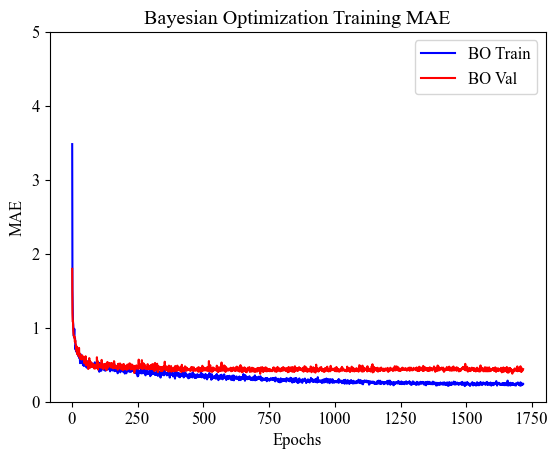

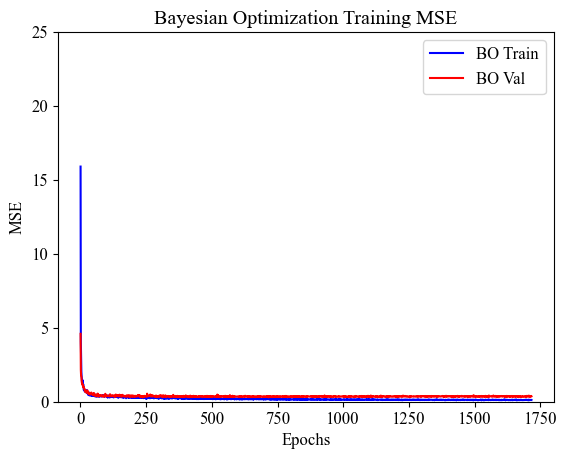

In [73]:
# 绘制MAE与Epochs的关系图
mae = BOhistory.history['mae']
val_mae = BOhistory.history['val_mae']
epochs = range(1, len(mae) + 1)

# 绘制MAE曲线
plt.plot(epochs, mae, 'b', label='BO Train')
plt.plot(epochs, val_mae, 'r', label='BO Val')
plt.title('Bayesian Optimization Training MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# 设置y轴范围
plt.ylim([0, 5])

# 显示图像
plt.show()

# 绘制MSE与Epochs的关系图
mse = BOhistory.history['mse']
val_mse = BOhistory.history['val_mse']
epochs = range(1, len(mse) + 1)

# 绘制MSE曲线
plt.plot(epochs, mse, 'b', label='BO Train')
plt.plot(epochs, val_mse, 'r', label='BO Val')
plt.title('Bayesian Optimization Training MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# 设置y轴范围
plt.ylim([0, 25])

# 显示图像
plt.show()

In [74]:
loss, mae, mse = BOmodel.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} A/cm^2".format(mae))

2/2 - 0s - loss: 0.4668 - mae: 0.5051 - mse: 0.4415 - 274ms/epoch - 137ms/step
Testing set Mean Abs Error:  0.51 A/cm^2


8/8 [==============================] - 0s 9ms/step


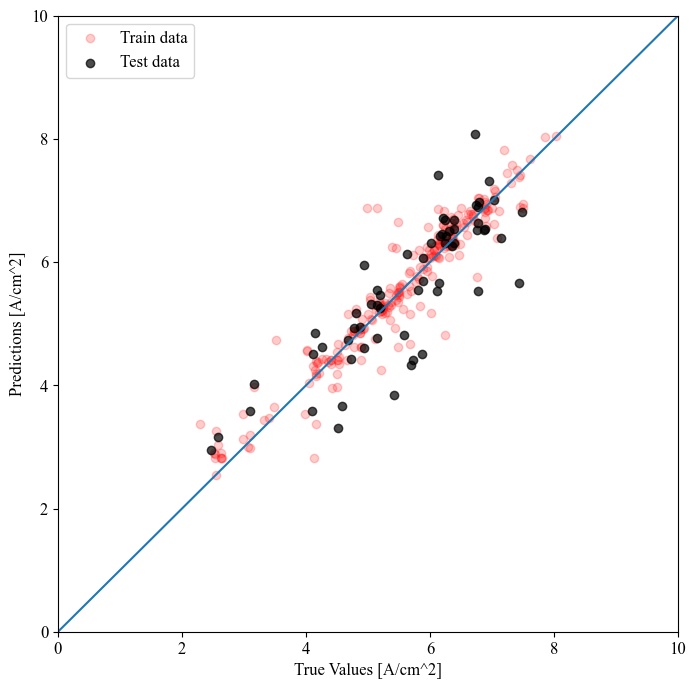

In [75]:
test_predictions = BOmodel.predict(X_test).flatten()
train_predictions = BOmodel.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'red', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='black', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [A/cm^2]')
plt.ylabel('Predictions [A/cm^2]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [76]:
print('深度学习贝叶斯优化模型评价指标展示：')

# 对测试集进行预测
y_pred_test = BOmodel.predict(X_test)

# 计算R^2分数
r2_test = r2_score(y_test, y_pred_test)
print('测试集上的R^2 Score: ', r2_test)

# 对训练集进行预测
y_pred_train = BOmodel.predict(X_train)

# 计算R^2分数
r2_train = r2_score(y_train, y_pred_train)
print('训练集上的R^2 Score: ', r2_train)

# 计算测试集上的MAE
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集上的MAE: ', mae_test)

# 计算训练集上的MAE
mae_train = mean_absolute_error(y_train, y_pred_train)
print('训练集上的MAE: ', mae_train)

# 计算测试集上的MSE
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集上的MSE: ', mse_test)

# 计算训练集上的MSE
mse_train = mean_squared_error(y_train, y_pred_train)
print('训练集上的MSE: ', mse_train)

# 计算测试集上的RMSE
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('测试集上的RMSE: ', rmse_test)

# 计算训练集上的RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('训练集上的RMSE: ', rmse_train)

深度学习贝叶斯优化模型评价指标展示：
2/2 [==============================] - 0s 2ms/step
测试集上的R^2 Score:  0.6620148859583393
8/8 [==============================] - 0s 1ms/step
训练集上的R^2 Score:  0.9013544084055651
测试集上的MAE:  0.5050655525038463
训练集上的MAE:  0.23602058266699016
测试集上的MSE:  0.44146469762425056
训练集上的MSE:  0.14147432814057753
测试集上的RMSE:  0.6644280981598013
训练集上的RMSE:  0.37613073277861453


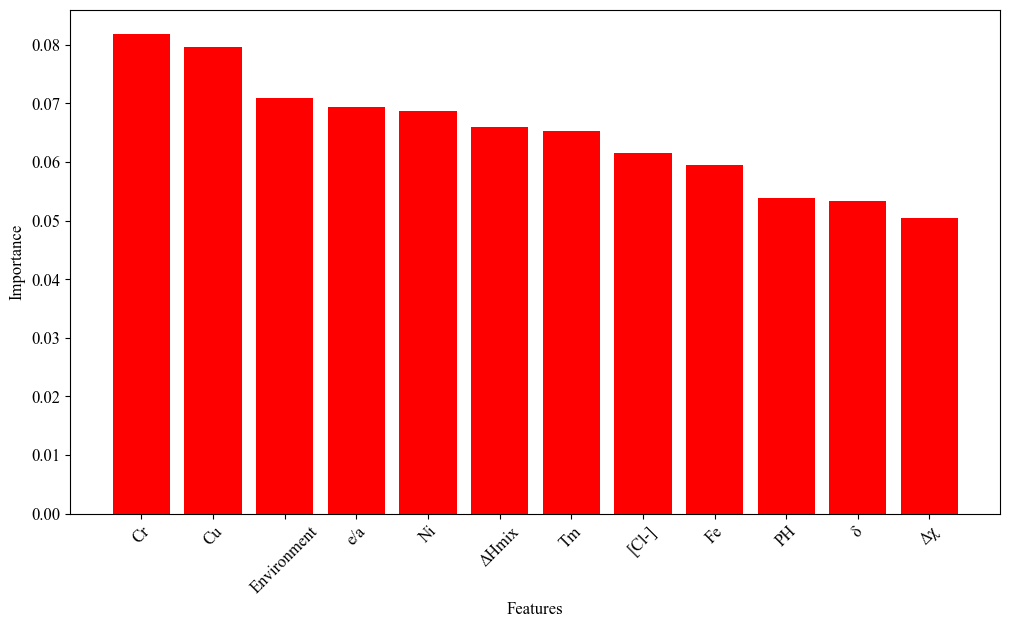

In [77]:
# 获取输入特征的名称
feature_names = dataset.columns[:-1]

# 计算特征重要性
importance = BOmodel.get_weights()[0]
feature_importance = np.abs(importance).mean(axis=1)

# 按重要性从大到小排序
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_feature_importance = feature_importance[sorted_idx]

# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(12, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# 画出柱状图
ax = plt.subplot(111)
ax.bar(sorted_feature_names, sorted_feature_importance, color='red')

# 设置x轴标签旋转角度，避免重叠
plt.xticks(rotation=45)

# 设置柱状图之间留有一定的空间
plt.subplots_adjust(bottom=0.25)

# 设置x轴、y轴标签、标题
plt.xlabel('Features')
plt.ylabel('Importance')

# 显示图像
plt.show()

In [78]:
BOmodel.save('D:\IPython\Corrosion-ML\saved_model\深度学习\贝叶斯优化模型\BODL_1')

INFO:tensorflow:Assets written to: D:\IPython\Corrosion-ML\saved_model\深度学习\贝叶斯优化模型\BODL_1\assets
